<a href="https://colab.research.google.com/github/qb4745/evaluacion_1_deep_learning/blob/main/evaluacion_1_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===============================
# MLP para Fashion MNIST
# ===============================

# -------------------------------
# Sección 1: Importaciones y Configuración Inicial
# -------------------------------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Parámetros globales
num_classes = 10         # Número de clases de salida (0-9)
input_shape = (28, 28, 1)  # Forma de entrada para cada imagen
batch_size = 128         # Tamaño de lote para entrenamiento
epochs = 15              # Número de épocas de entrenamiento
learning_rate = 0.001    # Tasa de aprendizaje inicial para Adam

# -------------------------------
# Sección 2: Carga y Preprocesamiento de Datos (IL 1.1)
# -------------------------------
# IL 1.1: Ejecuta los procedimientos fundamentales de carga de datos...
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Dataset cargado.")

# IL 1.1: ...y los preprocesa para su uso en redes neuronales.
# Normalización: Escalar imágenes al rango [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Reformateo: Añadir dimensión de canal (necesario para Keras aunque sea 1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print(f"Forma datos entrenamiento (x_train): {x_train.shape}, {x_train.shape[0]} muestras")
print(f"Forma datos prueba (x_test): {x_test.shape}, {x_test.shape[0]} muestras")

# IL 1.2: (Relacionado) Preparación de etiquetas para función de error/salida 'categorical_crossentropy'/'softmax'
# One-hot encoding de etiquetas
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f"Forma etiquetas entrenamiento (y_train): {y_train.shape}")
print(f"Forma etiquetas prueba (y_test): {y_test.shape}")

# -------------------------------
# Sección 3: Definición del Modelo MLP (IL 1.1, IL 1.2, IL 1.3)
# -------------------------------
# IL 1.1: ...considerando los conceptos de Deep Learning, tales como Perceptrón, Perceptrón multicapa y Red Neuronal Artificial.
# IL 1.3: Programa algoritmos en lenguaje Python, utilizando Tensorflow mediante Keras... para optimizar un modelo... (MLP).
print("\nDefiniendo la arquitectura del modelo MLP...")
model = keras.Sequential(name="mlp_fashion_mnist")
# Capa de aplanamiento para convertir la imagen 2D en vector 1D para el MLP
model.add(layers.Flatten(input_shape=input_shape))

# IL 1.2: Programa funciones de activación... aplicada a redes neuronales...
# Capa oculta 1 con activación ReLU
model.add(layers.Dense(128, activation="relu", name="hidden_layer_1"))

# IL 1.3: ...aplicando técnicas de optimización y regularización, como dropout...
# Capa Dropout para regularización
model.add(layers.Dropout(0.5, name="dropout_1"))

# Capa oculta 2 con activación ReLU
model.add(layers.Dense(64, activation="relu", name="hidden_layer_2"))
model.add(layers.Dropout(0.5, name="dropout_2")) # Más Dropout

# IL 1.2: Programa funciones de... salida... aplicada a redes neuronales...
# Capa de salida con activación Softmax para clasificación multiclase
model.add(layers.Dense(num_classes, activation="softmax", name="output_layer"))

# Mostrar resumen de la arquitectura creada
model.summary()

# -------------------------------
# Sección 4: Compilación del Modelo (IL 1.2, IL 1.3, IL 1.4)
# -------------------------------
# IL 1.3: ...para optimizar un modelo... (Selección de optimizador y tasa de aprendizaje)
print("\nCompilando el modelo...")
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# IL 1.2: Programa funciones de... error... aplicada a redes neuronales...
# IL 1.4: Evalúa el desempeño del modelo con métricas como accuracy... (Se especifica aquí)
model.compile(
    loss="categorical_crossentropy", # Función de error/pérdida
    optimizer=optimizer,             # Algoritmo de optimización
    metrics=["accuracy"]             # Métrica(s) a monitorizar
)
print("Modelo compilado con éxito.")

# -------------------------------
# Sección 5: Entrenamiento del Modelo (IL 1.1)
# -------------------------------
# IL 1.1: Ejecuta los procedimientos fundamentales de... entrenamiento de la red neuronal...
# Configura parámetros clave como épocas y tamaño de batch (definidos en Sección 1).
print(f"\nIniciando entrenamiento por {epochs} épocas con tamaño de lote {batch_size}...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1, # Usa parte del training set para validación durante el entrenamiento
    verbose=2 # Muestra una línea por época
)
print("Entrenamiento completado.")

# -------------------------------
# Sección 6: Evaluación en el Conjunto de Prueba (IL 1.4)
# -------------------------------
# IL 1.4: Evalúa el desempeño del modelo con métricas como accuracy...
print("\nEvaluando en conjunto de prueba:")
score = model.evaluate(x_test, y_test, verbose=0) # Evalúa en datos no vistos
print(f"Test loss: {score[0]:.4f}")
# Esta es la métrica 'accuracy' calculada en el conjunto de prueba
print(f"Test accuracy: {score[1]:.4f}")

# ===============================
# Fin del Script Principal
# ===============================

Cargando dataset Fashion MNIST...
Dataset cargado.
Forma datos entrenamiento (x_train): (60000, 28, 28, 1), 60000 muestras
Forma datos prueba (x_test): (10000, 28, 28, 1), 10000 muestras
Forma etiquetas entrenamiento (y_train): (60000, 10)
Forma etiquetas prueba (y_test): (10000, 10)

Definiendo la arquitectura del modelo MLP...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "mlp_fashion_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compilando el modelo...
Modelo compilado con éxito.

Iniciando entrenamiento por 15 épocas con tamaño de lote 128...
Epoch 1/15
422/422 - 9s - 22ms/step - accuracy: 0.6561 - loss: 0.9615 - val_accuracy: 0.8158 - val_loss: 0.5089
Epoch 2/15
422/422 - 6s - 13ms/step - accuracy: 0.7865 - loss: 0.6105 - val_accuracy: 0.8348 - val_loss: 0.4413
Epoch 3/15
422/422 - 8s - 19ms/step - accuracy: 0.8113 - loss: 0.5489 - val_accuracy: 0.8538 - val_loss: 0.4053
Epoch 4/15
422/422 - 2s - 5ms/step - accuracy: 0.8214 - loss: 0.5150 - val_accuracy: 0.8553 - val_loss: 0.4015
Epoch 5/15
422/422 - 3s - 6ms/step - accuracy: 0.8291 - loss: 0.4908 - val_accuracy: 0.8603 - val_loss: 0.3859
Epoch 6/15
422/422 - 4s - 9ms/step - accuracy: 0.8360 - loss: 0.4740 - val_accuracy: 0.8658 - val_loss: 0.3735
Epoch 7/15
422/422 - 2s - 5ms/step - accuracy: 0.8399 - loss: 0.4605 - val_accuracy: 0.8645 - val_loss: 0.3674
Epoch 8/15
422/422 - 2s - 6ms/step - accuracy: 0.8434 - loss: 0.4506 - val_accuracy: 0.8668 - val_loss

Cargando dataset Fashion MNIST...
Dataset cargado.
Forma datos entrenamiento (x_train): (60000, 28, 28, 1), 60000 muestras
Forma datos prueba (x_test): (10000, 28, 28, 1), 10000 muestras
Forma etiquetas entrenamiento (y_train): (60000, 10)
Forma etiquetas prueba (y_test): (10000, 10)

Definiendo la arquitectura del modelo MLP (Baseline)...


Model: "mlp_fashion_mnist_baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compilando el modelo...
Modelo compilado con éxito.

Iniciando entrenamiento por 15 épocas con tamaño de lote 128...
Epoch 1/15
422/422 - 4s - 9ms/step - accuracy: 0.6586 - loss: 0.9577 - val_accuracy: 0.8225 - val_loss: 0.4898
Epoch 2/15
422/422 - 2s - 6ms/step - accuracy: 0.7862 - loss: 0.6105 - val_accuracy: 0.8438 - val_loss: 0.4329
Epoch 3/15
422/422 - 2s - 5ms/step - accuracy: 0.8125 - loss: 0.5420 - val_accuracy: 0.8393 - val_loss: 0.4303
Epoch 4/15
422/422 - 2s - 5ms/step - accuracy: 0.8230 - loss: 0.5071 - val_accuracy: 0.8572 - val_loss: 0.3986
Epoch 5/15
422/422 - 3s - 8ms/step - accuracy: 0.8289 - loss: 0.4892 - val_accuracy: 0.8558 - val_loss: 0.4020
Epoch 6/15
422/422 - 2s - 5ms/step - accuracy: 0.8353 - loss: 0.4726 - val_accuracy: 0.8587 - val_loss: 0.3760
Epoch 7/15
422/422 - 3s - 6ms/step - accuracy: 0.8391 - loss: 0.4605 - val_accuracy: 0.8608 - val_loss: 0.3743
Epoch 8/15
422/422 - 3s - 6ms/step - accuracy: 0.8422 - loss: 0.4528 - val_accuracy: 0.8643 - val_loss: 0

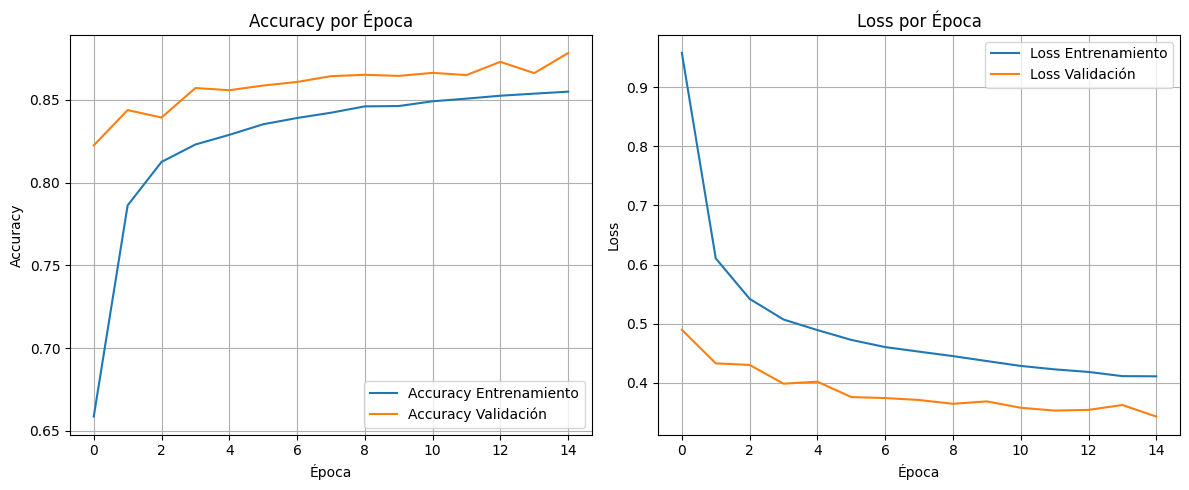


--- Fin del Script ---


In [ ]:
# ===============================
# MLP para Fashion MNIST - Versión Mejorada para Cumplir ILs
# ===============================

# -------------------------------
# Sección 1: Importaciones y Configuración Inicial
# -------------------------------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt # Añadido para visualización
from sklearn.metrics import classification_report # Añadido para métricas IL 1.4

# Parámetros globales (Estos son HIPERPARÁMETROS CLAVE para experimentar - IL 1.1, IL 1.3)
num_classes = 10         # Número de clases de salida (0-9)
input_shape = (28, 28, 1)  # Forma de entrada para cada imagen
batch_size = 128         # Tamaño de lote
epochs = 15              # Número de épocas de entrenamiento
learning_rate = 0.001    # Tasa de aprendizaje inicial para Adam
dropout_rate = 0.5       # Tasa de Dropout (¡experimentar con este valor!)

# -------------------------------
# Sección 2: Carga y Preprocesamiento de Datos (IL 1.1)
# -------------------------------
# IL 1.1: Carga de datos
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Dataset cargado.")

# IL 1.1: Preprocesamiento
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print(f"Forma datos entrenamiento (x_train): {x_train.shape}, {x_train.shape[0]} muestras")
print(f"Forma datos prueba (x_test): {x_test.shape}, {x_test.shape[0]} muestras")

# Guardar copias de las etiquetas de prueba para evaluación posterior (IL 1.4)
y_test_labels = y_test.copy() # Guardar etiquetas originales (números 0-9)

# IL 1.2: Preparación de etiquetas para 'categorical_crossentropy'/'softmax'
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f"Forma etiquetas entrenamiento (y_train): {y_train.shape}")
print(f"Forma etiquetas prueba (y_test): {y_test.shape}")

# -------------------------------
# Sección 3: Definición del Modelo MLP (IL 1.1, IL 1.2, IL 1.3)
# -------------------------------
# IL 1.1, IL 1.3: Implementación de un MLP usando Keras
# **ACCIÓN REQUERIDA (Experimentación IL 1.1, IL 1.2):**
#    - Para probar otras funciones de activación, cambia 'relu' por 'sigmoid', 'tanh', etc.
#    - Para probar diferentes arquitecturas, cambia el número de capas o neuronas (ej: 128 -> 256).
#    - Entrena un modelo por cada cambio y compara resultados.
print("\nDefiniendo la arquitectura del modelo MLP (Baseline)...")
model = keras.Sequential(name="mlp_fashion_mnist_baseline")
model.add(layers.Flatten(input_shape=input_shape))
# IL 1.2: Uso de función de activación 'relu'
model.add(layers.Dense(128, activation="relu", name="hidden_layer_1"))
# IL 1.3: Uso de técnica de regularización 'Dropout'
model.add(layers.Dropout(dropout_rate, name="dropout_1")) # ¡Experimenta con dropout_rate!
model.add(layers.Dense(64, activation="relu", name="hidden_layer_2"))
model.add(layers.Dropout(dropout_rate, name="dropout_2"))
# IL 1.2: Uso de función de activación/salida 'softmax'
model.add(layers.Dense(num_classes, activation="softmax", name="output_layer"))

model.summary() # Útil para verificar la estructura y número de parámetros

# -------------------------------
# Sección 4: Compilación del Modelo (IL 1.2, IL 1.3, IL 1.4)
# -------------------------------
# IL 1.3: Selección de optimizador Adam
# **ACCIÓN REQUERIDA (Experimentación IL 1.3):**
#    - Prueba otros optimizadores (ej: keras.optimizers.SGD(learning_rate=...)).
#    - Ajusta el 'learning_rate'.
print("\nCompilando el modelo...")
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# IL 1.2: Selección de función de error 'categorical_crossentropy'
# **ACCIÓN REQUERIDA (Experimentación IL 1.2):**
#    - Si usas etiquetas numéricas (no one-hot), podrías usar 'sparse_categorical_crossentropy'.
#    - Compara el impacto si cambias la función de error (aunque categorical_crossentropy es estándar aquí).
# IL 1.4: Especificación de métrica 'accuracy' (se añadirán otras en evaluación)
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"] # Accuracy se calcula durante el entrenamiento/evaluación
)
print("Modelo compilado con éxito.")

# -------------------------------
# Sección 5: Entrenamiento del Modelo (IL 1.1)
# -------------------------------
# IL 1.1: Ejecución del entrenamiento
# **ACCIÓN REQUERIDA (Experimentación IL 1.1, IL 1.3):**
#    - Ejecuta este bloque con diferentes 'batch_size' y 'epochs'.
#    - Compara las curvas de aprendizaje (generadas más abajo) para cada experimento.
print(f"\nIniciando entrenamiento por {epochs} épocas con tamaño de lote {batch_size}...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1, # Usa 10% para validación
    verbose=2
)
print("Entrenamiento completado.")

# -------------------------------
# Sección 6: Evaluación Detallada en el Conjunto de Prueba (IL 1.4)
# -------------------------------
# IL 1.4: Evalúa desempeño con accuracy, precision, recall, F1-Score
print("\nEvaluando en conjunto de prueba:")
# Paso 1: Obtener Loss y Accuracy base con evaluate()
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss (Pérdida): {score[0]:.4f}")
print(f"Test accuracy (Exactitud): {score[1]:.4f}")

# Paso 2: Obtener predicciones para calcular otras métricas
y_pred_prob = model.predict(x_test) # Obtiene probabilidades de salida
y_pred_classes = np.argmax(y_pred_prob, axis=1) # Convierte probabilidades a clase predicha (0-9)

# Paso 3: Calcular Precision, Recall, F1-Score usando classification_report
# Necesitamos las etiquetas de prueba originales (0-9), no las one-hot
print("\nReporte de Clasificación (Precision, Recall, F1-Score por clase y promedios):")
# y_test_labels fue guardada antes del one-hot encoding
print(classification_report(y_test_labels, y_pred_classes, digits=4))

# **ACCIÓN REQUERIDA (IL 1.4):**
#    - Crear un cuadro resumen en tu informe/notebook con Accuracy, Precision (promedio), Recall (promedio), F1-Score (promedio).
#    - Interpretar estas métricas: ¿Qué clases clasifica bien/mal? ¿Hay desbalance?
#    - Comparar estas métricas entre los diferentes modelos que entrenaste en tus experimentos.

# -------------------------------
# Sección 7: Visualización de Curvas de Aprendizaje (Análisis IL 1.1, IL 1.3)
# -------------------------------
# Útil para analizar el entrenamiento, detectar overfitting/underfitting y comparar experimentos
print("\nGenerando gráficos de curvas de aprendizaje...")
plt.figure(figsize=(12, 5))

# Gráfico de Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validación')
plt.title('Accuracy por Época')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfico de Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss Validación')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show() # Muestra los gráficos

# **ACCIÓN REQUERIDA (Análisis y Comparación IL 1.1, IL 1.3):**
#    - Analiza estas curvas: ¿Hay sobreajuste (gap grande entre train/val)? ¿El modelo converge?
#    - Guarda estos gráficos para cada experimento que realices (ej., con diferente tasa de dropout, diferente # de épocas, etc.).
#    - Presenta gráficos comparativos en tu informe/notebook para justificar cómo las técnicas de optimización (dropout) o los cambios de hiperparámetros afectaron el entrenamiento.

# ===============================
# Sección 8: Conclusiones y Próximos Pasos (Documentación)
# ===============================
# **ACCIÓN REQUERIDA:**
#    - En tu cuaderno Jupyter, añade una sección final de Markdown para:
#        - Resumir los resultados del MEJOR modelo encontrado tras la experimentación.
#        - Discutir los hallazgos clave (qué funcionó, qué no, impacto de parámetros).
#        - Comparar explícitamente diferentes configuraciones (tabla resumen es ideal).
#        - Justificar las decisiones finales de arquitectura e hiperparámetros.
#        - Reflexionar sobre posibles mejoras futuras.
#
# ¡Recuerda documentar CADA experimento que realices en tu cuaderno!
# ===============================

print("\n--- Fin del Script ---")

---

## 1. Introducción

Este proyecto aborda un problema práctico de clasificación de imágenes utilizando una Red Neuronal Artificial (RNA) de tipo Perceptrón Multicapa (MLP). El objetivo es aplicar los fundamentos de Deep Learning para entrenar un modelo capaz de identificar diferentes tipos de artículos de moda a partir de imágenes en escala de grises.

Para este propósito, utilizaremos el dataset **Fashion-MNIST**. Este conjunto de datos fue desarrollado por Zalando Research y se presenta como un reemplazo directo ("drop-in replacement") del clásico dataset MNIST de dígitos escritos a mano. Mientras que MNIST es un estándar ampliamente utilizado para la validación inicial de algoritmos de Machine Learning, Fashion-MNIST ofrece un desafío potencialmente mayor manteniendo la misma estructura y formato: un conjunto de entrenamiento de 60,000 imágenes y un conjunto de prueba de 10,000 imágenes, todas ellas en escala de grises y de tamaño 28x28 píxeles, distribuidas en 10 clases distintas.

La elección de Fashion-MNIST nos permite trabajar con un dataset estandarizado, bien conocido en la comunidad, pero que requiere que el modelo aprenda características más complejas que las presentes en los dígitos manuscritos. El objetivo final de este encargo es implementar, entrenar, optimizar y evaluar un MLP utilizando TensorFlow/Keras para clasificar correctamente las imágenes de artículos de moda de este dataset, cumpliendo con los indicadores de logro especificados en la evaluación.

*Fuente oficial del dataset: [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)*

## 2. Descripción del Dataset (Contenido)

El dataset Fashion-MNIST se compone de imágenes y sus correspondientes etiquetas de clase. A continuación, se detallan sus características principales:

*   **Dimensiones de la Imagen:** Cada imagen tiene una altura de 28 píxeles y un ancho de 28 píxeles, resultando en un total de 784 píxeles por imagen.
*   **Formato de Píxeles:** Las imágenes están en escala de grises. Cada píxel tiene asociado un único valor numérico entero que indica su nivel de oscuridad. Este valor varía entre 0 (blanco) y 255 (negro). Valores más altos representan píxeles más oscuros.
*   **Estructura de los Datos:** Cada Fila del Dataset representa una imagen:
    *   **Primera Columna:** Corresponde a la etiqueta de clase (un número del 0 al 9) que identifica el tipo de artículo de moda representado en la imagen.
    *   **Columnas Restantes (784):** Contienen los valores de los píxeles (0-255) de la imagen asociada, generalmente desplegados en un formato aplanado (vector de 784 elementos).
*   **Etiquetas de Clase:** Cada ejemplo (imagen) está asignado a una de las siguientes 10 clases, representadas por un número entero:

    *   `0`: T-shirt/top (Camiseta/Top)
    *   `1`: Trouser (Pantalón)
    *   `2`: Pullover (Suéter)
    *   `3`: Dress (Vestido)
    *   `4`: Coat (Abrigo)
    *   `5`: Sandal (Sandalia)
    *   `6`: Shirt (Camisa)
    *   `7`: Sneaker (Zapatilla deportiva)
    *   `8`: Bag (Bolso)
    *   `9`: Ankle boot (Botín)

**En resumen:** Cada fila del dataset representa una imagen de 28x28 píxeles en escala de grises, junto con una etiqueta numérica que indica a cuál de las 10 categorías de ropa pertenece. El objetivo del modelo será aprender a predecir esta etiqueta basándose en los 784 valores de píxeles de entrada.

---



---

## 3. Configuración del Entorno y Selección del Framework

Antes de proceder con la carga y preprocesamiento de los datos, es fundamental definir el entorno de trabajo y las herramientas principales que se utilizarán para la implementación de la Red Neuronal Artificial (MLP).

### 3.1. Elección del Framework: TensorFlow con Keras

Para el desarrollo de este proyecto, hemos seleccionado **TensorFlow (versión X.Y.Z)** como la biblioteca principal de Deep Learning, utilizando específicamente su interfaz de alto nivel **Keras**.

**Justificación de la Decisión:**

La elección de TensorFlow con Keras se basa en las siguientes consideraciones clave, alineadas con los objetivos de la evaluación y los requisitos del proyecto:

1.  **Facilidad de Uso y Desarrollo Rápido (API de Keras):** Keras proporciona una API intuitiva y modular que simplifica significativamente el proceso de definición, entrenamiento y evaluación de redes neuronales, incluyendo los MLP requeridos. Esto nos permite centrarnos en la aplicación de los conceptos fundamentales de Deep Learning (como la arquitectura del modelo, funciones de activación, optimizadores y métricas) en lugar de en detalles de implementación de bajo nivel.
2.  **Cumplimiento de Requisitos:** TensorFlow/Keras ofrece todas las componentes necesarias para abordar los Indicadores de Logro de esta evaluación:
    *   Capas densas para construir el MLP.
    *   Amplia variedad de funciones de activación  y la flexibilidad para definir funciones personalizadas si fuera necesario .
    *   Diversas funciones de pérdida adecuadas para problemas de clasificación.
    *   Múltiples algoritmos de optimización para entrenar y optimizar el modelo.
    *   Herramientas integradas para la evaluación del modelo y el cálculo de métricas.
3.  **Documentación Extensa y Comunidad Activa:** TensorFlow y Keras cuentan con una documentación oficial muy completa, numerosos tutoriales y una vasta comunidad de usuarios. Esto facilita la resolución de dudas y la consulta de ejemplos durante el desarrollo.
4.  **Integración con Ecosistema:** TensorFlow se integra fácilmente con otras herramientas útiles del ecosistema de Data Science en Python, como NumPy, Pandas y Scikit-learn (que utilizaremos para la carga y preprocesamiento de datos), así como con herramientas de visualización como Matplotlib/Seaborn y TensorBoard (para un análisis más profundo del entrenamiento, si se requiere).
5.  **Entorno de Ejecución (Google Colab):** TensorFlow está preinstalado y optimizado para su uso en Google Colab, el entorno recomendado para este proyecto, permitiendo aprovechar fácilmente los recursos de hardware como GPUs o TPUs para acelerar el entrenamiento si fuera necesario.

**En resumen**, la combinación TensorFlow/Keras representa un balance adecuado entre potencia, flexibilidad y facilidad de uso, lo que la convierte en una opción idónea para implementar eficientemente el MLP solicitado y cumplir con los objetivos de esta evaluación dentro del plazo establecido. Las siguientes secciones detallarán cómo se utiliza este framework para la carga, preprocesamiento, modelado y evaluación.

---

## **1. Importación de Librerías**
Iniciamos el proyecto importando las bibliotecas y módulos de Python esenciales para llevar a cabo las tareas de carga de datos, preprocesamiento, construcción del modelo, entrenamiento, evaluación y visualización.


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import pandas as pd
import time
import os
import random

## **2. Carga de Datos Y División del DataSet**
En esta sección fundamental, procedemos a cargar el dataset Fashion MNIST, que utilizaremos para entrenar y evaluar nuestro modelo de clasificación MLP.

Empleamos la función integrada keras.datasets.fashion_mnist.load_data().
Esta función realiza dos tareas clave:

**Carga:** Obtiene el conjunto de datos completo, descargándolo automáticamente.
**División Estándar:** Divide el dataset cargado en los conjuntos predefinidos y estándar de entrenamiento (x_train, y_train) y prueba (x_test, y_test), tal como fueron definidos originalmente por los creadores del dataset (Zalando Research).

Disponer de esta división predefinida es esencial, ya que nos permite trabajar con la partición estándar utilizada en la comunidad de investigación y asegura una base comparable para la evaluación del modelo. Las variables x_train, y_train contendrán las 60,000 muestras de entrenamiento (imágenes y etiquetas), mientras que x_test, y_test contendrán las 10,000 muestras de prueba, listas para la siguiente fase de análisis exploratorio.

In [4]:
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
y_test_labels = y_test
print("Dataset cargado y dividido.")
print("-" * 40)





Cargando dataset Fashion MNIST...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset cargado y dividido.
----------------------------------------


## **3. Exploratory Data Analysis (EDA)**

Antes de preprocesar los datos y construir el modelo, es crucial realizar un análisis exploratorio para comprender la estructura, distribución y características del dataset Fashion MNIST. En esta sección, cargaremos los datos, visualizaremos la cantidad de muestras, la distribución de las clases y algunas imágenes de ejemplo.

Resumen Numérico Rápido:
  x_train shape: (60000, 28, 28), y_train shape: (60000,)
  x_test shape: (10000, 28, 28), y_test shape: (10000,)
----------------------------------------


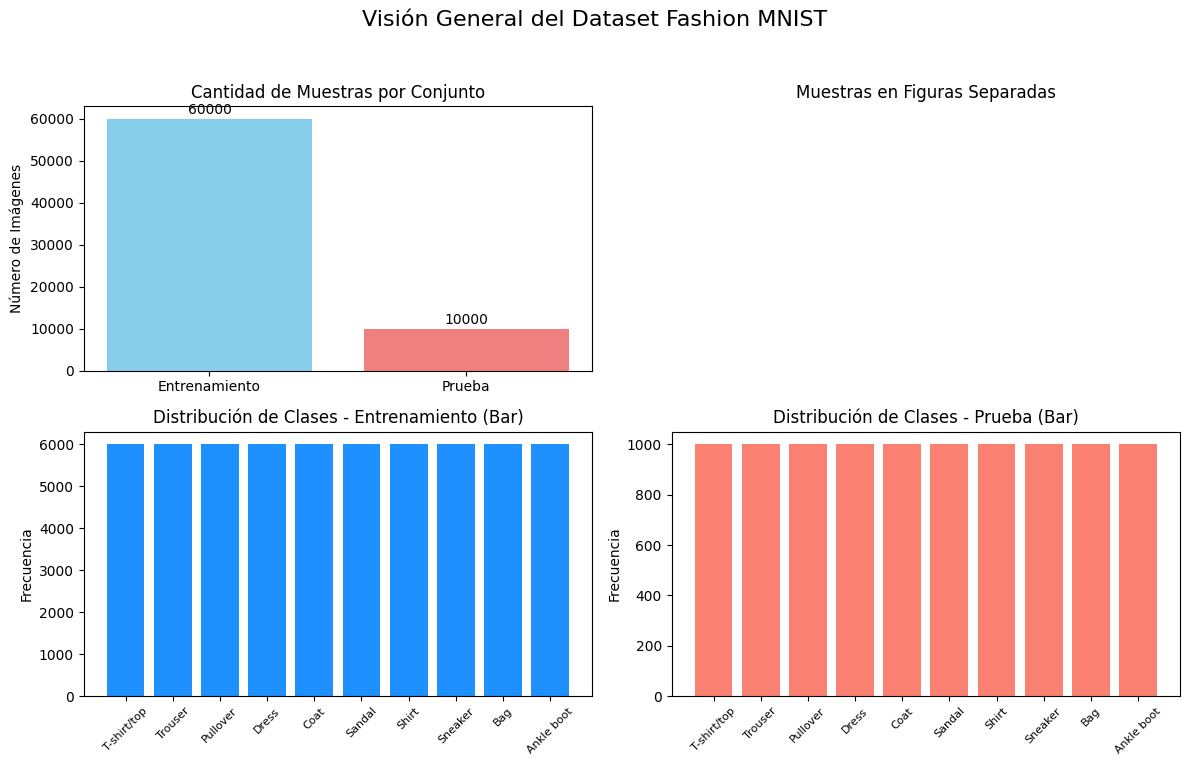


Mostrando algunas imágenes de ENTRENAMIENTO:


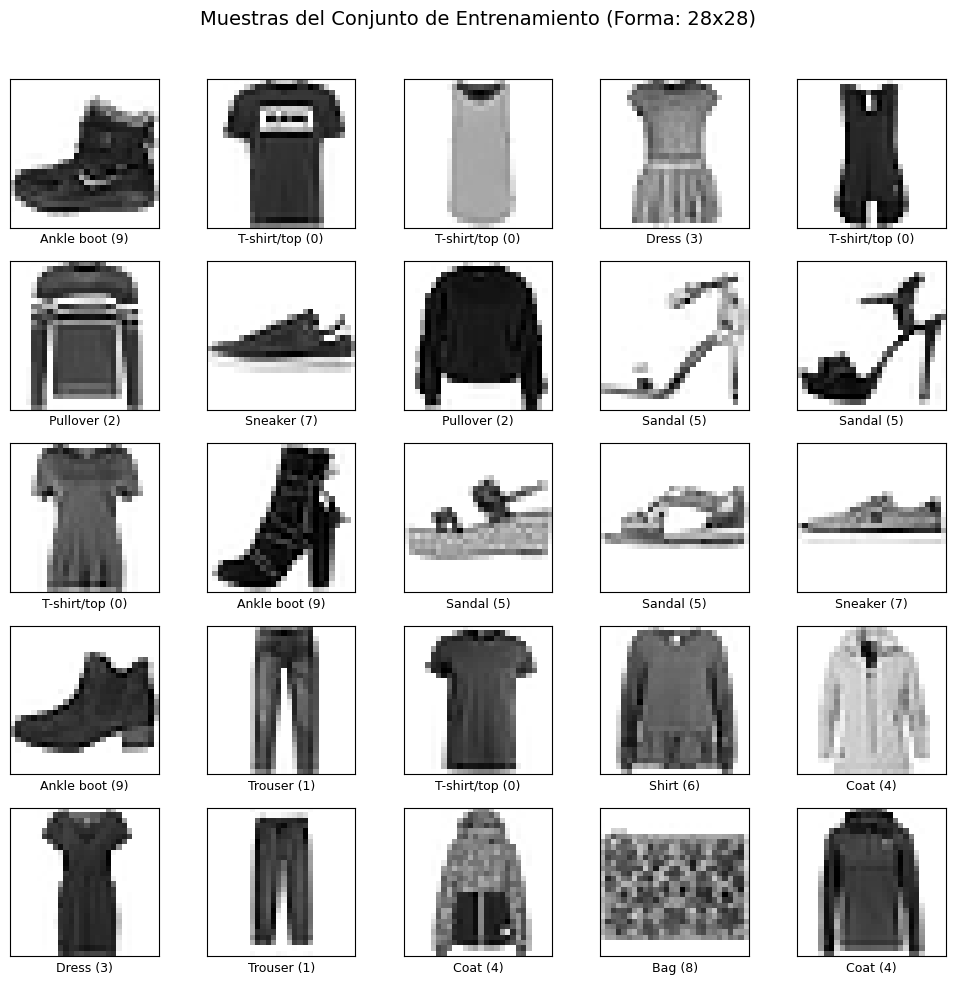


Mostrando algunas imágenes de PRUEBA:


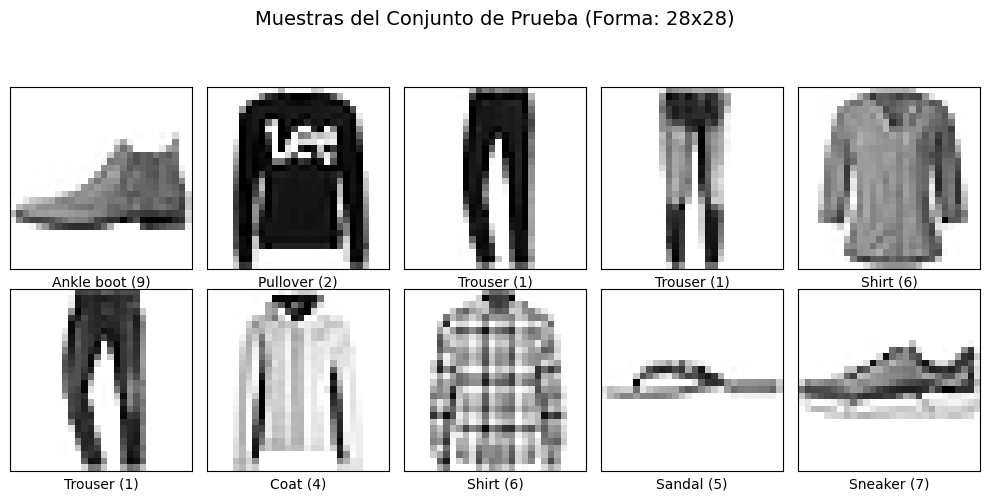

----------------------------------------
Visualizaciones Adicionales para las ETIQUETAS (y_train, y_test):
----------------------------------------

Mostrando la secuencia de las primeras 100 etiquetas de entrenamiento (y_train):


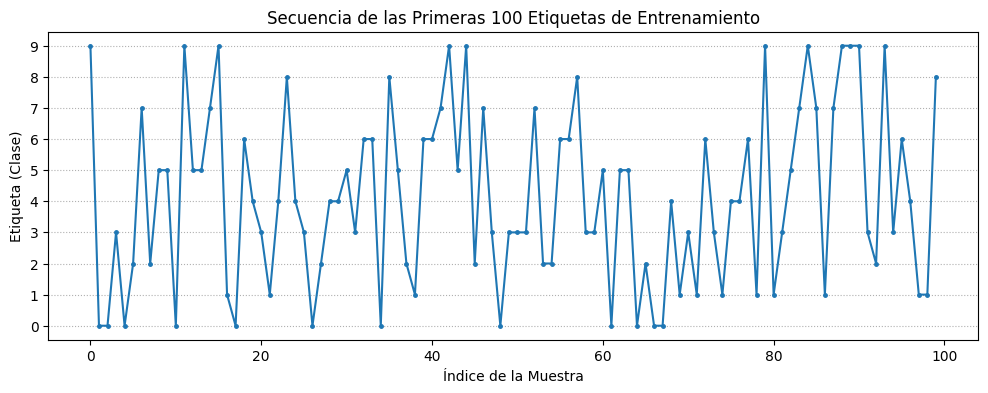

-> Observación: Este gráfico muestra el valor de la etiqueta para cada muestra consecutiva.
   Normalmente no revela patrones obvios, ya que el orden suele ser aleatorio.
Mostrando la Imagen en el Índice: 0
Etiqueta correspondiente: 9 (Ankle boot)
----------------------------------------
Representación como Array NumPy (Valores de Píxeles):
Forma del array de la imagen: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0

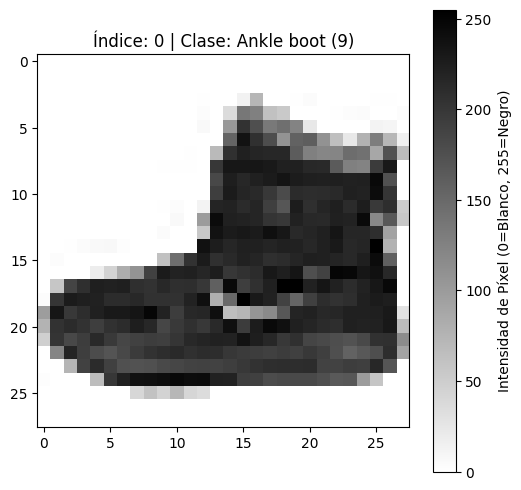


Generando histograma de intensidad de píxeles...


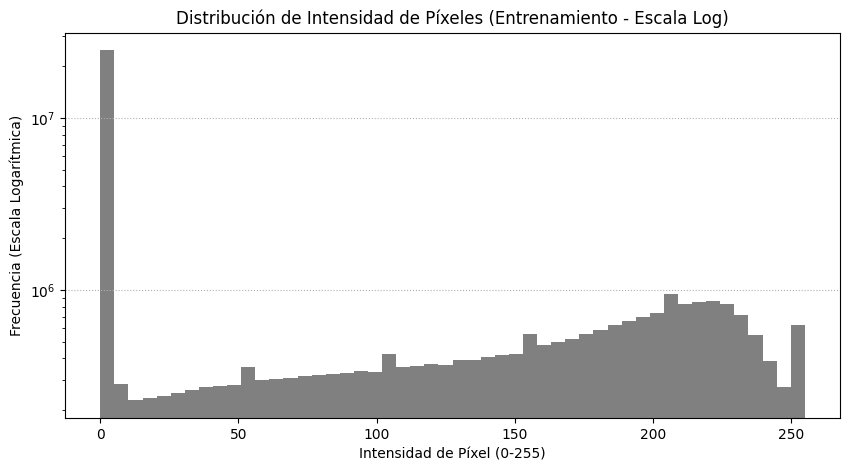

-> El histograma muestra la frecuencia de cada nivel de intensidad de píxel (0-255) en todo el conjunto de entrenamiento.
-> La escala logarítmica en el eje Y ayuda a visualizar la distribución incluso para intensidades menos frecuentes.


In [5]:
# --- Información Numérica (como referencia) ---
print("Resumen Numérico Rápido:")
print(f"  x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"  x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
print("-" * 40)


# --- Preparación para Gráficos ---

# Nombres de las clases para las etiquetas (del 0 al 9)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cantidades para el gráfico de barras
train_samples = len(x_train)
test_samples = len(x_test)


# --- Creación de Gráficos PRINCIPALES (Cantidad y Distribución) ---

# Crear una figura para los gráficos de cantidad y distribución (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Visión General del Dataset Fashion MNIST', fontsize=16)

# --- Gráfico 1: Cantidad de Muestras ---
axes[0, 0].bar(['Entrenamiento', 'Prueba'], [train_samples, test_samples], color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Cantidad de Muestras por Conjunto')
axes[0, 0].set_ylabel('Número de Imágenes')
for i, count in enumerate([train_samples, test_samples]):
    axes[0, 0].text(i, count + 500, str(count), ha='center', va='bottom')

# --- Gráfico 2: Placeholder / Vacío ---
axes[0, 1].set_title('Muestras en Figuras Separadas')
axes[0, 1].axis('off')

# --- Gráfico 3: Distribución de Clases (Entrenamiento) - Bar Chart ---
train_labels, train_counts = np.unique(y_train, return_counts=True)
axes[1, 0].bar(class_names, train_counts, color='dodgerblue')
axes[1, 0].set_title('Distribución de Clases - Entrenamiento (Bar)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=8)

# --- Gráfico 4: Distribución de Clases (Prueba) - Bar Chart ---
test_labels, test_counts = np.unique(y_test, return_counts=True)
axes[1, 1].bar(class_names, test_counts, color='salmon')
axes[1, 1].set_title('Distribución de Clases - Prueba (Bar)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Creación de Figura SEPARADA para Muestras de Entrenamiento ---
print("\nMostrando algunas imágenes de ENTRENAMIENTO:")
plt.figure(figsize=(10,10))
plt.suptitle(f"Muestras del Conjunto de Entrenamiento (Forma: {x_train.shape[1]}x{x_train.shape[2]})", fontsize=14)
num_rows, num_cols = 5, 5
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f"{class_names[y_train[i]]} ({y_train[i]})", fontsize=9)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# --- Creación de Figura SEPARADA para Muestras de Prueba ---
print("\nMostrando algunas imágenes de PRUEBA:")
plt.figure(figsize=(10,5))
plt.suptitle(f"Muestras del Conjunto de Prueba (Forma: {x_test.shape[1]}x{x_test.shape[2]})", fontsize=14)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"{class_names[y_test[i]]} ({y_test[i]})")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# --- NUEVO: Gráficos Adicionales para y_train / y_test ---

print("-" * 40)
print("Visualizaciones Adicionales para las ETIQUETAS (y_train, y_test):")
print("-" * 40)

# --- Gráfico Adicional 1: Line Plot de las primeras N etiquetas de Entrenamiento ---
print("\nMostrando la secuencia de las primeras 100 etiquetas de entrenamiento (y_train):")
num_labels_to_plot = 100
plt.figure(figsize=(12, 4))
plt.plot(np.arange(num_labels_to_plot), y_train[:num_labels_to_plot], marker='.', linestyle='-', markersize=5)
plt.title(f'Secuencia de las Primeras {num_labels_to_plot} Etiquetas de Entrenamiento')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Etiqueta (Clase)')
plt.yticks(np.arange(10)) # Asegura que los ticks sean los números de clase 0-9
plt.grid(True, axis='y', linestyle=':')
plt.show()
print("-> Observación: Este gráfico muestra el valor de la etiqueta para cada muestra consecutiva.")
print("   Normalmente no revela patrones obvios, ya que el orden suele ser aleatorio.")




# Nombres de las clases para referencia
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# --- Seleccionar una imagen específica ---
indice_imagen = 0 # Vamos a mostrar la primera imagen (puedes cambiar este número)
imagen_seleccionada = x_train[indice_imagen]
etiqueta_seleccionada = y_train[indice_imagen]
nombre_clase = class_names[etiqueta_seleccionada]

# --- 1. Mostrar la imagen como Array NumPy ---
print(f"Mostrando la Imagen en el Índice: {indice_imagen}")
print(f"Etiqueta correspondiente: {etiqueta_seleccionada} ({nombre_clase})")
print("-" * 40)
print("Representación como Array NumPy (Valores de Píxeles):")
print(f"Forma del array de la imagen: {imagen_seleccionada.shape}")
# Para que no ocupe toda la pantalla, podemos configurar NumPy para imprimir menos
# np.set_printoptions(threshold=50) # Descomenta si quieres limitar la salida
print(imagen_seleccionada)
print("-" * 40)


# --- 2. Mostrar la imagen con un Gráfico (Matplotlib) ---
print("Representación Gráfica de la Imagen:")

plt.figure(figsize=(6, 6)) # Crear una figura (ajusta tamaño si es necesario)

# Mostrar la imagen
# cmap=plt.cm.binary la muestra en blanco y negro (escala de grises invertida)
# cmap='gray' también es común para escala de grises estándar
plt.imshow(imagen_seleccionada, cmap=plt.cm.binary)

# Añadir un título descriptivo
plt.title(f"Índice: {indice_imagen} | Clase: {nombre_clase} ({etiqueta_seleccionada})")

# Añadir una barra de color para entender la escala de píxeles
plt.colorbar(label='Intensidad de Píxel (0=Blanco, 255=Negro)')

# Opcional: Ocultar los ejes numerados (ya que la forma 28x28 es más relevante)
# plt.xticks([])
# plt.yticks([])
plt.grid(False) # Quitar la cuadrícula que a veces aparece por defecto

# Mostrar el gráfico
plt.show()


# --- Histograma de Intensidad de Píxeles (Entrenamiento) ---

print("\nGenerando histograma de intensidad de píxeles...")

# Crear una nueva figura para el histograma con un tamaño específico
plt.figure(figsize=(10, 5)) # Ancho 10, Alto 5 pulgadas

# Calcular y dibujar el histograma:
# 1. x_train.flatten():
#    - `x_train` tiene la forma (60000, 28, 28) o (60000, 28, 28, 1) si ya añadiste el canal.
#    - `.flatten()` convierte este array multidimensional en un ÚNICO array largo (1D)
#      que contiene TODOS los valores de los píxeles de TODAS las 60,000 imágenes de entrenamiento,
#      uno después del otro. (Total: 60000 * 28 * 28 = 47,040,000 valores).
#    - Esto es necesario porque `plt.hist` opera sobre una secuencia de valores individuales.
#
# 2. bins=50:
#    - Divide el rango completo de valores posibles (0 a 255) en 50 intervalos o "contenedores" (bins) de igual tamaño.
#    - `plt.hist` contará cuántos valores de píxeles caen dentro de cada uno de estos 50 intervalos.
#    - Elegir el número de bins afecta la granularidad del histograma.
#
# 3. color='gray':
#    - Simplemente establece el color de las barras del histograma a gris, lo cual es temáticamente apropiado
#      para datos de imágenes en escala de grises.
#
# 4. log=True:
#    - Aplica una escala LOGARÍTMICA al eje Y (Frecuencia).
#    - **¡Esto es muy importante!** En muchas imágenes, los valores de píxeles extremos (como 0 para el fondo blanco)
#      son MUCHÍSIMO más frecuentes que los valores intermedios de gris.
#    - Sin una escala logarítmica, el pico en 0 sería tan alto que las barras para los otros valores
#      serían casi invisibles, haciendo difícil ver su distribución.
#    - La escala logarítmica comprime las frecuencias altas y expande las bajas, permitiendo
#      visualizar mejor la distribución completa, incluyendo los valores menos frecuentes.
plt.hist(x_train.flatten(), bins=50, color='gray', log=True)

# Añadir título y etiquetas a los ejes para claridad
plt.title('Distribución de Intensidad de Píxeles (Entrenamiento - Escala Log)')
plt.xlabel('Intensidad de Píxel (0-255)')
plt.ylabel('Frecuencia (Escala Logarítmica)') # Indicar explícitamente la escala log

# Añadir una cuadrícula horizontal punteada para facilitar la lectura en la escala log
plt.grid(True, axis='y', linestyle=':')

# Mostrar el gráfico generado
plt.show()

print("-> El histograma muestra la frecuencia de cada nivel de intensidad de píxel (0-255) en todo el conjunto de entrenamiento.")
print("-> La escala logarítmica en el eje Y ayuda a visualizar la distribución incluso para intensidades menos frecuentes.")

## **4. Preprocesamiento de Datos para el Modelo**

Tras la exploración inicial en la sección de EDA, procedemos ahora a preparar los datos de Fashion MNIST para que sean adecuados como entrada a nuestro modelo MLP. Este preprocesamiento es esencial para asegurar un entrenamiento eficiente y mejorar el rendimiento potencial del modelo.

Los pasos clave que realizaremos en esta sección son:

1.  **Normalización de Imágenes:** Los valores de los píxeles de las imágenes originales se encuentran en el rango [0, 255]. Escalaremos estos valores al rango [0, 1] dividiendo cada píxel por 255.0. Esta normalización ayuda a estabilizar el proceso de entrenamiento y a que el modelo converja más rápidamente, evitando que valores de píxeles muy altos dominen los cálculos.
2.  **Reformateo de Imágenes:** Añadiremos una dimensión extra al final de la forma (`shape`) de los arrays de imágenes para representar el canal de color. Aunque las imágenes son en escala de grises (un solo canal), muchas capas de Keras esperan explícitamente esta dimensión (formato `[altura, ancho, canales]`), por lo que transformaremos la forma de `(28, 28)` a `(28, 28, 1)`.
3.  **Codificación One-Hot de Etiquetas:** Las etiquetas de clase originales son números enteros del 0 al 9. Para utilizar la función de pérdida `categorical_crossentropy` (adecuada para clasificación multiclase) y la activación `softmax` en la capa de salida, necesitamos convertir estas etiquetas a un formato binario "one-hot". Cada etiqueta se transformará en un vector de 10 elementos con un '1' en la posición correspondiente a su clase y '0's en el resto.

A continuación, implementaremos estos pasos y visualizaremos su efecto en una muestra de los datos para verificar y comprender las transformaciones realizadas.



--- Iniciando Preprocesamiento ---
Variable 'num_classes' definida como 10.
Muestras originales (imagen y etiqueta) guardadas para visualización.

1. Normalizando imágenes (Escalando a [0, 1])...
   Imágenes normalizadas.

2. Reformateando imágenes (añadiendo dimensión de canal)...
   Dimensión de canal añadida.
   Nueva forma datos entrenamiento (x_train): (60000, 28, 28, 1)

3. Codificando etiquetas (One-Hot Encoding)...
   Etiquetas convertidas a formato one-hot.
   Nueva forma etiquetas entrenamiento (y_train): (60000, 10)
----------------------------------------
Preprocesamiento completado.
----------------------------------------

--- Visualizando Efecto del Preprocesamiento en la Muestra 0 ---


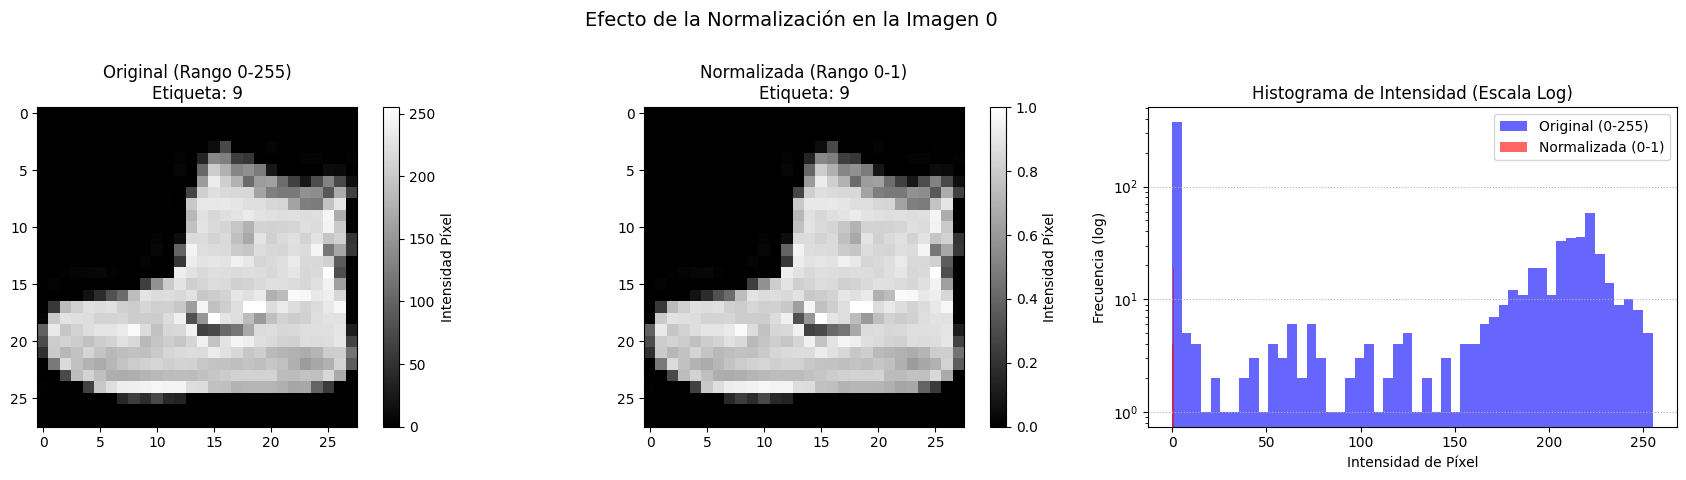

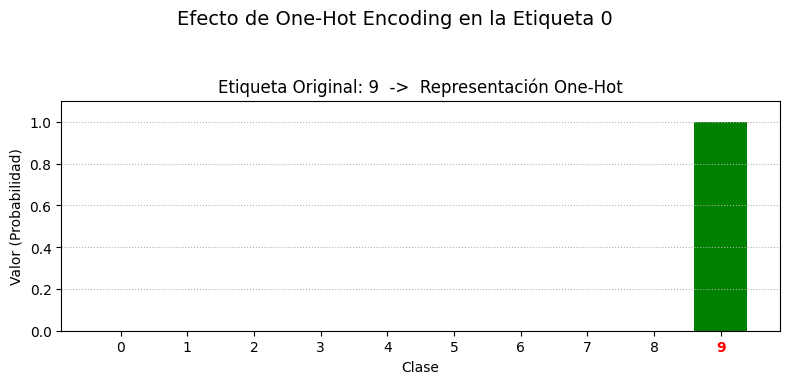

----------------------------------------


'Gráfico 1: Efecto de la Normalización en la Imagen 0 (Figura con 3 subplots)\nSubplot 1: Imagen Original (Rango 0-255)\n¿Qué muestra? Simplemente la primera imagen del dataset tal como se cargó, en escala de grises. La barra de color a la derecha indica que los píxeles más oscuros tienen valores cercanos a 255 y los más claros a 0.\n¿Qué significa? Nos da una referencia visual de cómo son los datos crudos antes de cualquier transformación numérica. Vemos la prenda de vestir (o el artículo) sobre un fondo predominantemente blanco.\n¿Importancia? Sirve como punto de partida visual. Nos permite confirmar que la imagen se cargó correctamente y tener una idea del rango original de los valores de los píxeles (confirmado por la barra de color).\nSubplot 2: Imagen Normalizada (Rango 0-1)\n¿Qué muestra? La misma imagen que antes, pero después de aplicar la normalización (dividir por 255.0). Visualmente, se ve idéntica a la original porque imshow ajusta automáticamente el rango de colores para 

In [6]:
# ---------------------------------------------------------------------------
## 4. Preprocesamiento de Datos para el Modelo
# ---------------------------------------------------------------------------
# Después de explorar los datos, preparamos la data para la red neuronal.
# Estos pasos son cruciales para un entrenamiento eficiente y efectivo.
print("\n--- Iniciando Preprocesamiento ---")

# --- Variables Globales Necesarias ---
# Asegúrate de que num_classes esté definido desde una celda anterior o defínelo aquí
if 'num_classes' not in locals():
    num_classes = 10 # Definir si no existe
    print(f"Variable 'num_classes' definida como {num_classes}.")

# --- Guardar muestras originales para visualización ---
# Guardamos una copia de la primera imagen y etiqueta ANTES de modificarlas.
if 'x_train' in locals() and x_train.ndim == 3 and x_train.size > 0: # Verificar que x_train sea 3D (antes de añadir canal)
    original_image_sample = x_train[0].copy() # Copia de la primera imagen (28x28 array)
    original_label_sample = y_train[0].copy() # Copia de la primera etiqueta (int)
    print("Muestras originales (imagen y etiqueta) guardadas para visualización.")
    sample_available = True
else:
    print("Advertencia: x_train/y_train no están en el formato esperado o vacíos. No se guardaron muestras originales.")
    original_image_sample = None
    original_label_sample = None
    sample_available = False

# --- Paso 1: Normalización de las Imágenes ---
print("\n1. Normalizando imágenes (Escalando a [0, 1])...")
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
print("   Imágenes normalizadas.")

# --- Paso 2: Reformateo de las Imágenes ---
print("\n2. Reformateando imágenes (añadiendo dimensión de canal)...")
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)
print("   Dimensión de canal añadida.")
print(f"   Nueva forma datos entrenamiento (x_train): {x_train.shape}")

# --- Paso 3: Codificación One-Hot de las Etiquetas ---
print("\n3. Codificando etiquetas (One-Hot Encoding)...")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("   Etiquetas convertidas a formato one-hot.")
print(f"   Nueva forma etiquetas entrenamiento (y_train): {y_train.shape}")

print("-" * 40)
print("Preprocesamiento completado.")
print("-" * 40)

# --- Visualización del Efecto del Preprocesamiento (Usando la Muestra Guardada) ---

if sample_available:
    print("\n--- Visualizando Efecto del Preprocesamiento en la Muestra 0 ---")

    # --- Visualización Paso 1: Normalización ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Efecto de la Normalización en la Imagen 0', fontsize=14)

    # Imagen Original
    im_orig = axes[0].imshow(original_image_sample, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title(f'Original (Rango 0-255)\nEtiqueta: {original_label_sample}')
    axes[0].grid(False)
    fig.colorbar(im_orig, ax=axes[0], label='Intensidad Píxel')

    # Imagen Normalizada (Tomamos la primera imagen de x_train ya procesado)
    # Usamos .squeeze() para quitar la dimensión del canal para imshow
    im_norm = axes[1].imshow(x_train[0].squeeze(), cmap='gray', vmin=0, vmax=1)
    axes[1].set_title(f'Normalizada (Rango 0-1)\nEtiqueta: {original_label_sample}')
    axes[1].grid(False)
    fig.colorbar(im_norm, ax=axes[1], label='Intensidad Píxel')

    # Histograma Comparativo
    axes[2].hist(original_image_sample.flatten(), bins=50, color='blue', alpha=0.6, label='Original (0-255)', log=True)
    axes[2].hist(x_train[0].flatten(), bins=50, color='red', alpha=0.6, label='Normalizada (0-1)', log=True)
    axes[2].set_title('Histograma de Intensidad (Escala Log)')
    axes[2].set_xlabel('Intensidad de Píxel')
    axes[2].set_ylabel('Frecuencia (log)')
    axes[2].legend()
    axes[2].grid(True, axis='y', linestyle=':')

    plt.tight_layout(rect=[0, 0.03, 1, 0.93]) # Ajuste para suptitle
    plt.show()

    # --- Visualización Paso 3: One-Hot Encoding ---
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    fig.suptitle('Efecto de One-Hot Encoding en la Etiqueta 0', fontsize=14)

    # Obtener la etiqueta one-hot procesada para la muestra 0
    one_hot_label = y_train[0]
    classes = np.arange(num_classes) # Clases 0 a 9

    ax.bar(classes, one_hot_label, color='green')
    ax.set_title(f'Etiqueta Original: {original_label_sample}  ->  Representación One-Hot')
    ax.set_xlabel('Clase')
    ax.set_ylabel('Valor (Probabilidad)')
    ax.set_xticks(classes) # Asegurar que se muestren todas las clases 0-9
    ax.set_ylim(0, 1.1) # Límite eje Y hasta un poco más de 1
    ax.grid(True, axis='y', linestyle=':')

    # Marcar la clase correcta
    correct_class_index = np.argmax(one_hot_label)
    ax.get_xticklabels()[correct_class_index].set_color("red")
    ax.get_xticklabels()[correct_class_index].set_fontweight("bold")


    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()

else:
    print("\nNo se generaron visualizaciones de preprocesamiento porque las muestras originales no estaban disponibles.  Reiniciar el Kernel y Correr todo denuevo")


print("-" * 40)
# ---------------------------------------------------------------------------
# Fin de la Sección de Preprocesamiento y Visualización
# ---------------------------------------------------------------------------

"""Gráfico 1: Efecto de la Normalización en la Imagen 0 (Figura con 3 subplots)
Subplot 1: Imagen Original (Rango 0-255)
¿Qué muestra? Simplemente la primera imagen del dataset tal como se cargó, en escala de grises. La barra de color a la derecha indica que los píxeles más oscuros tienen valores cercanos a 255 y los más claros a 0.
¿Qué significa? Nos da una referencia visual de cómo son los datos crudos antes de cualquier transformación numérica. Vemos la prenda de vestir (o el artículo) sobre un fondo predominantemente blanco.
¿Importancia? Sirve como punto de partida visual. Nos permite confirmar que la imagen se cargó correctamente y tener una idea del rango original de los valores de los píxeles (confirmado por la barra de color).
Subplot 2: Imagen Normalizada (Rango 0-1)
¿Qué muestra? La misma imagen que antes, pero después de aplicar la normalización (dividir por 255.0). Visualmente, se ve idéntica a la original porque imshow ajusta automáticamente el rango de colores para mostrarla. Sin embargo, la barra de color ahora indica que los valores van de 0.0 (blanco) a 1.0 (negro).
¿Qué significa? Demuestra que, aunque la apariencia visual no cambie drásticamente, los valores numéricos subyacentes que representan la imagen ahora están confinados al intervalo [0, 1].
¿Importancia? Aunque visualmente no sea impactante, es crucial para entender que la representación numérica que alimentará a la red neuronal ha cambiado. Este nuevo rango [0, 1] es preferible para los algoritmos de optimización (como Adam) porque evita problemas de escala y puede llevar a una convergencia más rápida y estable durante el entrenamiento.
Subplot 3: Histograma de Intensidad (Original vs. Normalizada)
¿Qué muestra? Compara la distribución de los valores de los píxeles de la primera imagen antes (azul) y después (rojo) de la normalización. El eje X representa la intensidad del píxel y el eje Y (en escala logarítmica) representa cuántos píxeles tienen esa intensidad.
¿Qué significa? Vemos que la forma de la distribución es la misma, pero el rango en el eje X cambia drásticamente. El histograma azul se extiende de 0 a 255, mientras que el rojo se comprime entre 0 y 1. El pico alto cerca de 0 (fondo blanco) es evidente en ambos. La escala logarítmica nos permite ver también las frecuencias de los tonos grises intermedios.
¿Importancia? Este gráfico cuantifica el efecto de la normalización. Confirma que la operación simplemente reescaló los valores sin alterar la distribución relativa de las intensidades. Es la prueba visual de que la transformación matemática (dividir por 255) se aplicó correctamente a todos los píxeles de esa imagen y cambió su rango.
Gráfico 2: Efecto de One-Hot Encoding en la Etiqueta 0 (Figura con 1 subplot)
¿Qué muestra? Un diagrama de barras con 10 barras, correspondientes a las 10 clases posibles (0 a 9). Solo una barra tiene altura 1, mientras que las demás tienen altura 0. El título indica cuál era la etiqueta numérica original y la barra roja/negrita en el eje X marca la clase correspondiente a la barra alta.
¿Qué significa? Muestra cómo la etiqueta numérica original (por ejemplo, si original_label_sample era 9) se transforma en un vector binario. Este vector representa una distribución de probabilidad donde estamos 100% seguros (valor 1) de que la imagen pertenece a esa clase específica (la clase 9 en el ejemplo) y 0% seguro de que pertenece a cualquier otra clase.
¿Importancia? Visualiza la transformación fundamental de la etiqueta para que sea compatible con la función de pérdida categorical_crossentropy y la capa de salida softmax de la red neuronal. La red neuronal aprenderá a producir un vector de salida similar (con probabilidades para cada clase), y la función de pérdida comparará ese vector predicho con este vector "verdadero" (one-hot) para calcular el error y ajustar los pesos. Entender este formato es clave para comprender cómo funciona la clasificación multiclase en este contexto.
"""

--- Iniciando Celda Completa del Test Harness ---
----------------------------------------
Variables DISPONIBLES al INICIO de la celda del Test Harness:
['target_model_name', 'np', 'tf', 'keras', 'layers', 'plt', 'classification_report', 'accuracy_score', 'precision_recall_fscore_support', 'confusion_matrix', 'sns', 'pd', 'time', 'x_train', 'y_train', 'x_test', 'y_test', 'y_test_labels', 'class_names', 'train_samples', 'test_samples', 'fig', 'axes', 'i', 'count', 'train_labels', 'train_counts', 'test_labels', 'test_counts', 'num_rows', 'num_cols', 'num_labels_to_plot', 'indice_imagen', 'imagen_seleccionada', 'etiqueta_seleccionada', 'nombre_clase', 'num_classes', 'original_image_sample', 'original_label_sample', 'sample_available', 'im_orig', 'im_norm', 'ax', 'one_hot_label', 'classes', 'correct_class_index', 'relevant_keys', 'DEFAULT_NUM_CLASSES', 'DEFAULT_INPUT_SHAPE_ORIGINAL', 'DEFAULT_EPOCHS', 'DEFAULT_BATCH_SIZE', 'DEFAULT_LEARNING_RATE', 'DEFAULT_VALIDATION_SPLIT', 'DEFAULT_DROPO

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 48: early stopping
Restoring model weights from the end of the best epoch: 38.
   Entrenamiento completado (paró/terminó en 48 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.353033, Test Accuracy: 0.873900
   Weighted Precision: 0.873808, Recall: 0.873900, F1-Score: 0.873511
*** ¡Nuevo mejor modelo encontrado! MLP_ReLU_128_64_D0.5 -> Test Accuracy: 0.873900 ***
   (Estado del modelo MLP_ReLU_128_64_D0.5 guardado en memoria)
--------------------------------------------------

>>> Procesando Configuración: MLP_Sigmoid_128_64_D0.5 <<<

--- Creando Modelo: 'MLP_Sigmoid_128_64_D0.5' ---
   Activación Oculta: sigmoid
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_Sigmoid_128_64_D0.5' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_Sigmoid_128_64_D0.5 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 91: early stopping
Restoring model weights from the end of the best epoch: 81.
   Entrenamiento completado (paró/terminó en 91 épocas).

--- Evaluando Modelo: MLP_Sigmoid_128_64_D0.5 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.333223, Test Accuracy: 0.883100
   Weighted Precision: 0.882460, Recall: 0.883100, F1-Score: 0.882139
*** ¡Nuevo mejor modelo encontrado! MLP_Sigmoid_128_64_D0.5 -> Test Accuracy: 0.883100 ***
   (Estado del modelo MLP_Sigmoid_128_64_D0.5 guardado en memoria)
--------------------------------------------------

>>> Procesando Configuración: MLP_Tanh_128_64_D0.5 <<<

--- Creando Modelo: 'MLP_Tanh_128_64_D0.5' ---
   Activación Oculta: tanh
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_Tanh_128_64_D0.5' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_Tanh_128_64_D0.5 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 99: early stopping
Restoring model weights from the end of the best epoch: 89.
   Entrenamiento completado (paró/terminó en 99 épocas).

--- Evaluando Modelo: MLP_Tanh_128_64_D0.5 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.362388, Test Accuracy: 0.874700
   Weighted Precision: 0.875356, Recall: 0.874700, F1-Score: 0.874881
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_256_128_D0.5 <<<

--- Creando Modelo: 'MLP_ReLU_256_128_D0.5' ---
   Activación Oculta: relu
   Neuronas/Capa: [256, 128]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_256_128_D0.5' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_ReLU_256_128_D0.5 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 36.
   Entrenamiento completado (paró/terminó en 46 épocas).

--- Evaluando Modelo: MLP_ReLU_256_128_D0.5 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.330003, Test Accuracy: 0.882700
   Weighted Precision: 0.883173, Recall: 0.882700, F1-Score: 0.882309
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.2 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.2 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 30: early stopping
Restoring model weights from the end of the best epoch: 20.
   Entrenamiento completado (paró/terminó en 30 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.326703, Test Accuracy: 0.889200
   Weighted Precision: 0.889552, Recall: 0.889200, F1-Score: 0.889312
*** ¡Nuevo mejor modelo encontrado! MLP_ReLU_128_64_D0.2 -> Test Accuracy: 0.889200 ***
   (Estado del modelo MLP_ReLU_128_64_D0.2 guardado en memoria)
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.0 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.0' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: Ninguno
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.0' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.0 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 10.
   Entrenamiento completado (paró/terminó en 20 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.0 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.333863, Test Accuracy: 0.882400
   Weighted Precision: 0.882828, Recall: 0.882400, F1-Score: 0.882155
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_D0.5 <<<

--- Creando Modelo: 'MLP_ReLU_128_D0.5' ---
   Activación Oculta: relu
   Neuronas/Capa: [128]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_D0.5' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_ReLU_128_D0.5 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 42: early stopping
Restoring model weights from the end of the best epoch: 32.
   Entrenamiento completado (paró/terminó en 42 épocas).

--- Evaluando Modelo: MLP_ReLU_128_D0.5 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.337932, Test Accuracy: 0.884900
   Weighted Precision: 0.885688, Recall: 0.884900, F1-Score: 0.884780
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.5_LR0.01 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_LR0.01' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_LR0.01' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.5_LR0.01 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 32: early stopping
Restoring model weights from the end of the best epoch: 22.
   Entrenamiento completado (paró/terminó en 32 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_LR0.01 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.519464, Test Accuracy: 0.820900
   Weighted Precision: 0.825458, Recall: 0.820900, F1-Score: 0.816386
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.5_LR0.0001 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_LR0.0001' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_LR0.0001' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.5_LR0.0001 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Restoring model weights from the end of the best epoch: 97.
   Entrenamiento completado (paró/terminó en 100 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_LR0.0001 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.335978, Test Accuracy: 0.880400
   Weighted Precision: 0.879715, Recall: 0.880400, F1-Score: 0.879692
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.5_SGD <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_SGD' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_SGD' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.5_SGD (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Restoring model weights from the end of the best epoch: 98.
   Entrenamiento completado (paró/terminó en 100 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_SGD ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.370453, Test Accuracy: 0.865700
   Weighted Precision: 0.864591, Recall: 0.865700, F1-Score: 0.863795
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.5_BS32 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_BS32' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_BS32' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.5_BS32 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 43: early stopping
Restoring model weights from the end of the best epoch: 33.
   Entrenamiento completado (paró/terminó en 43 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_BS32 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.362564, Test Accuracy: 0.872700
   Weighted Precision: 0.872800, Recall: 0.872700, F1-Score: 0.871812
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.5_BS256 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_BS256' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_BS256' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.5_BS256 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 38: early stopping
Restoring model weights from the end of the best epoch: 28.
   Entrenamiento completado (paró/terminó en 38 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_BS256 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.351739, Test Accuracy: 0.874400
   Weighted Precision: 0.873557, Recall: 0.874400, F1-Score: 0.873257
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_BN_D0.5 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.5' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.5' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_BN_D0.5 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 55: early stopping
Restoring model weights from the end of the best epoch: 45.
   Entrenamiento completado (paró/terminó en 55 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.5 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.333534, Test Accuracy: 0.883100
   Weighted Precision: 0.883103, Recall: 0.883100, F1-Score: 0.882322
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_BN_D0.0 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.0' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: Ninguno
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.0' creado.
   Modelo compilado con Loss: categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_BN_D0.0 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.
   Entrenamiento completado (paró/terminó en 15 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.0 ---
   Usando etiquetas one-hot para model.evaluate...
   Test Loss: 0.353109, Test Accuracy: 0.872000
   Weighted Precision: 0.874713, Recall: 0.872000, F1-Score: 0.872275
--------------------------------------------------

              TEST HARNESS COMPLETADO (con EarlyStopping)

--- Sección 6: Resultados Comparativos ---

Tabla Resumen de Métricas (Ordenada por Accuracy):


,Model Name,Loss,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted),Training Time (s),Actual Epochs
4,MLP_ReLU_128_64_D0.2,0.326703,0.889200,0.889552,0.889200,0.889312,84.350000,30
6,MLP_ReLU_128_D0.5,0.337932,0.884900,0.885688,0.884900,0.884780,114.110000,42
12,MLP_ReLU_128_64_BN_D0.5,0.333534,0.883100,0.883103,0.883100,0.882322,172.490000,55
1,MLP_Sigmoid_128_64_D0.5,0.333223,0.883100,0.882460,0.883100,0.882139,254.810000,91
3,MLP_ReLU_256_128_D0.5,0.330003,0.882700,0.883173,0.882700,0.882309,203.040000,46
5,MLP_ReLU_128_64_D0.0,0.333863,0.882400,0.882828,0.882400,0.882155,64.480000,20
8,MLP_ReLU_128_64_D0.5_LR0.0001,0.335978,0.880400,0.879715,0.880400,0.879692,289.560000,100
2,MLP_Tanh_128_64_D0.5,0.362388,0.874700,0.875356,0.874700,0.874881,280.410000,99
11,MLP_ReLU_128_64_D0.5_BS256,0.351739,0.874400,0.873557,0.874400,0.873257,94.710000,38
0,MLP_ReLU_128_64_D0.5,0.353033,0.873900,0.873808,0.873900,0.873511,144.650000,48



Gráficos Comparativos de Curvas de Aprendizaje:


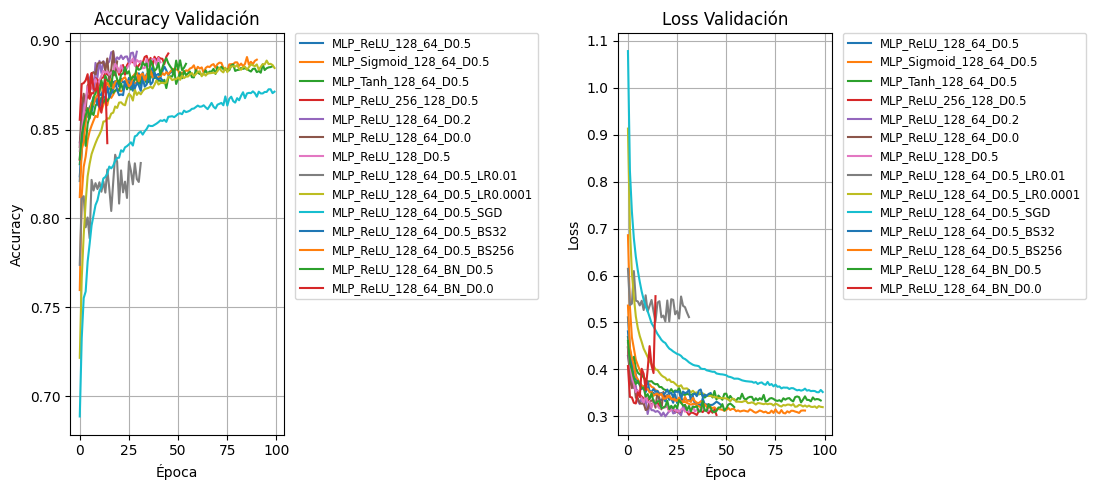


--- Fin del Análisis Comparativo ---

   Sección 7: GUARDADO Y RESUMEN DEL MEJOR MODELO ENCONTRADO

El mejor modelo encontrado fue: 'MLP_ReLU_128_64_D0.2' con Test Accuracy: 0.889200

--- Guardando el mejor modelo en: 'MLP_ReLU_128_64_D0.2_best_model_ES.keras' ---
   Modelo 'MLP_ReLU_128_64_D0.2_best_model_ES.keras' guardado exitosamente.

Resumen de la Arquitectura del Mejor Modelo: MLP_ReLU_128_64_D0.2


Model: "MLP_ReLU_128_64_D0.2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MLP_ReLU_128_64_D0.2_flatten    │ (None, 784)            │             0 │
│ (Flatten)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_hidden_1   │ (None, 128)            │       100,480 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_hidden_1_… │ (None, 128)            │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_dropout_1  │ (None, 128)            │             0 │
│ (Dropout)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_hidden_2   │ (None, 64)             │         8,256 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_hidden_2_… │ (None, 64)             │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_dropout_2  │ (None, 64)             │             0 │
│ (Dropout)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_output     │ (None, 10)             │           650 │
│ (Dense)                         │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Visualización Gráfica del Mejor Modelo:


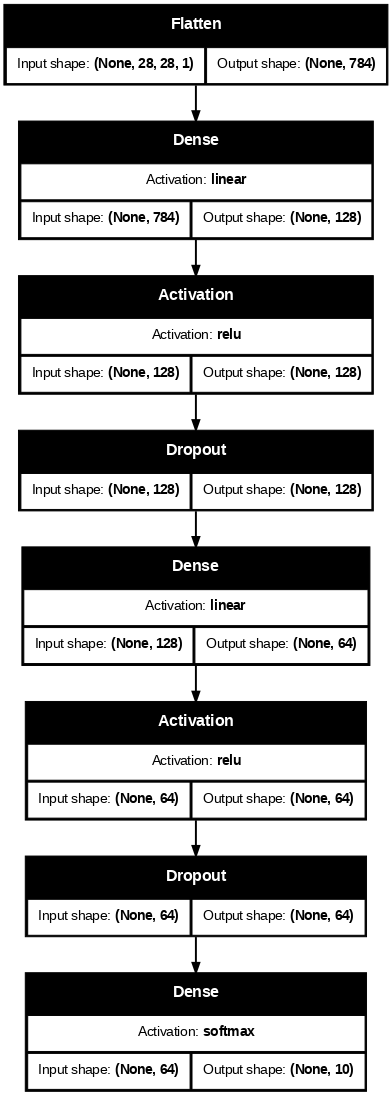


--- Fin de la sección del mejor modelo ---


In [9]:
# ===========================================================================
# CELDA ÚNICA: CONFIGURACIÓN, FUNCIONES, TEST HARNESS (CON ES), RESULTADOS Y MEJOR MODELO
# ===========================================================================
# ASUNCIONES:
# 1. Librerías básicas importadas (numpy, pandas, matplotlib, tensorflow, keras, layers, sklearn).
# 2. Datos (x_train, y_train, x_test, y_test, y_test_labels) cargados y preprocesados en el entorno.
# ---------------------------------------------------------------------------

print("--- Iniciando Celda Completa del Test Harness ---")

# --- Depuración Inicial: Variables al inicio de la celda ---
print("-" * 40)
print("Variables DISPONIBLES al INICIO de la celda del Test Harness:")
# Imprimir solo claves relevantes para no saturar
relevant_keys = [k for k in locals().keys() if not k.startswith('_') and k not in ['In', 'Out', 'get_ipython', 'exit', 'quit']]
print(relevant_keys)
print("-" * 40)
# --- Fin Depuración Inicial ---


# ---------------------------------------------------------------------------
# Sección 1: Constantes de HyperParametros
# ---------------------------------------------------------------------------
print("\n--- Sección 1: Definiendo Constantes Globales ---")
DEFAULT_NUM_CLASSES = 10
DEFAULT_INPUT_SHAPE_ORIGINAL = (28, 28, 1)
DEFAULT_EPOCHS = 100 # Máximo de épocas para Early Stopping
DEFAULT_BATCH_SIZE = 128
DEFAULT_LEARNING_RATE = 0.001
DEFAULT_VALIDATION_SPLIT = 0.1
DEFAULT_DROPOUT_RATE = 0.5 # Referencia base si no se especifica

# ---------------------------------------------------------------------------
# Sección 2: Verificación de Carga de Datos (CON DEBUG PRINT DETALLADO)
# ---------------------------------------------------------------------------
print("\n--- Sección 2: Verificando Datos Pre-cargados ---")
required_data_vars = ['x_train', 'y_train', 'x_test', 'y_test', 'y_test_labels']
missing_data = []
current_locals = locals() # Obtener locals una vez para consistencia
print(f"   Verificando contra locals() con {len(current_locals)} claves...") # Mostrar cuántas claves hay

for var in required_data_vars:
    if var not in current_locals:
        print(f"   >>> Variable '{var}' NO encontrada en locals() <<<") # <-- DEBUG PRINT
        missing_data.append(var)
    # else: # Descomenta para ver las que SÍ encuentra
    #    print(f"   Variable '{var}' encontrada.")

if missing_data:
    print(f"ERROR FATAL: Faltan variables de datos esenciales: {missing_data}")
    print("         Asegúrate de ejecutar la celda de carga/preprocesamiento de datos primero.")
    # Imprimir claves de nuevo justo antes del error
    print(f"   Claves en locals() justo antes del error: {list(current_locals.keys())[:20]}...")
    raise NameError(f"Faltan datos esenciales: {missing_data}")
else:
    print("   ¡Todas las variables de datos requeridas fueron encontradas!") # <-- Mensaje de éxito
    # Asegurar num_classes y input_shape_original (pueden venir de los datos)
    # Estas líneas solo se ejecutan si la verificación PASA
    if 'num_classes' not in locals():
        print("   Definiendo 'num_classes' desde DEFAULT.")
        num_classes = DEFAULT_NUM_CLASSES # O calcular de y_train.shape[1] si es one-hot
    if 'input_shape_original' not in locals():
        print("   Definiendo 'input_shape_original' desde DEFAULT.")
        input_shape_original = DEFAULT_INPUT_SHAPE_ORIGINAL # O calcular de x_train.shape[1:]
    print("   Variables 'num_classes' e 'input_shape_original' aseguradas.")

# ---------------------------------------------------------------------------
# Sección 3: Función Flexible para Crear Modelos MLP
# ---------------------------------------------------------------------------
print("\n--- Sección 3: Definiendo Función create_flexible_mlp ---")
def create_flexible_mlp(model_name='mlp',
                        hidden_activation='relu',
                        neurons_per_layer=[128, 64],
                        dropout_rate=0.5,
                        use_batch_norm=False,
                        input_shape_orig=DEFAULT_INPUT_SHAPE_ORIGINAL,
                        num_classes=DEFAULT_NUM_CLASSES):
    """Crea un MLP con configuración flexible, incluyendo Batch Norm opcional."""
    # (Código de la función create_flexible_mlp sin cambios)
    print(f"\n--- Creando Modelo: '{model_name}' ---")
    print(f"   Activación Oculta: {hidden_activation}")
    print(f"   Neuronas/Capa: {neurons_per_layer}")
    print(f"   Dropout Rate: {dropout_rate if dropout_rate > 0 else 'Ninguno'}")
    print(f"   Batch Norm: {'Sí' if use_batch_norm else 'No'}")

    model = keras.Sequential(name=model_name)
    model.add(layers.Flatten(input_shape=input_shape_orig, name=f"{model_name}_flatten"))

    for i, neurons in enumerate(neurons_per_layer):
        layer_name = f"{model_name}_hidden_{i+1}"
        bn_name = f"{model_name}_bn_{i+1}"
        dropout_name = f"{model_name}_dropout_{i+1}"
        model.add(layers.Dense(neurons, name=layer_name, use_bias=not use_batch_norm))
        if use_batch_norm:
            model.add(layers.BatchNormalization(name=bn_name))
        model.add(layers.Activation(hidden_activation, name=f"{layer_name}_activation"))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate, name=dropout_name))
    model.add(layers.Dense(num_classes, activation="softmax", name=f"{model_name}_output"))
    print(f"Modelo '{model_name}' creado.")
    return model

# ---------------------------------------------------------------------------
# Sección 4: Función para Evaluar un Modelo Entrenado
# ---------------------------------------------------------------------------
print("\n--- Sección 4: Definiendo Función evaluate_model ---")
def evaluate_model(model, x_test, y_test_eval, y_test_labels_sklearn, history, training_time):
    """Evalúa un modelo Keras entrenado."""
    # (Código de la función evaluate_model sin cambios)
    print(f"\n--- Evaluando Modelo: {model.name} ---")
    loss_name_internal = model.loss
    if isinstance(loss_name_internal, tf.keras.losses.Loss): loss_name_internal = loss_name_internal.name
    elif not isinstance(loss_name_internal, str): loss_name_internal = 'unknown'
    eval_label_type = "one-hot" if 'sparse' not in loss_name_internal.lower() else "enteras (sparse)"
    print(f"   Usando etiquetas {eval_label_type} para model.evaluate...")
    score = model.evaluate(x_test, y_test_eval, verbose=0)
    loss = score[0]; accuracy = score[1]
    print(f"   Test Loss: {loss:.6f}, Test Accuracy: {accuracy:.6f}")
    y_pred_prob = model.predict(x_test, verbose=0)
    y_pred_classes = np.argmax(y_pred_prob, axis=1)
    y_true_sklearn = np.array(y_test_labels_sklearn).flatten()
    y_pred_sklearn = np.array(y_pred_classes).flatten()
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true_sklearn, y_pred_sklearn, average='weighted', zero_division=0)
    print(f"   Weighted Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1:.6f}")
    results = {'Model Name': model.name, 'Loss': loss, 'Accuracy': accuracy,
               'Precision (Weighted)': precision, 'Recall (Weighted)': recall, 'F1-Score (Weighted)': f1,
               'Training Time (s)': training_time,
               'History': history.history if history else None}
    return results

# ===========================================================================
# Sección 5: TEST HARNESS - Definición y Ejecución (con EarlyStopping y TODOS los modelos)
# ===========================================================================
print("\n" + "="*60); print("        INICIANDO TEST HARNESS (con EarlyStopping)"); print("="*60)

# --- Define AQUÍ las configuraciones de modelos a probar (TODOS ACTIVOS) ---
models_to_test = [
    {'name': 'MLP_ReLU_128_64_D0.5', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5},
    {'name': 'MLP_Sigmoid_128_64_D0.5', 'activation': 'sigmoid', 'neurons': [128, 64], 'dropout': 0.5},
    {'name': 'MLP_Tanh_128_64_D0.5', 'activation': 'tanh', 'neurons': [128, 64], 'dropout': 0.5},
    {'name': 'MLP_ReLU_256_128_D0.5', 'activation': 'relu', 'neurons': [256, 128], 'dropout': 0.5},
    {'name': 'MLP_ReLU_128_64_D0.2', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2},
    {'name': 'MLP_ReLU_128_64_D0.0', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.0},
    {'name': 'MLP_ReLU_128_D0.5', 'activation': 'relu', 'neurons': [128], 'dropout': 0.5},
    {'name': 'MLP_ReLU_128_64_D0.5_LR0.01', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'lr': 0.01},
    {'name': 'MLP_ReLU_128_64_D0.5_LR0.0001','activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'lr': 0.0001},
    {'name': 'MLP_ReLU_128_64_D0.5_SGD', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'optimizer': 'sgd', 'lr': 0.01},
    {'name': 'MLP_ReLU_128_64_D0.5_BS32', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'batch_size': 32},
    {'name': 'MLP_ReLU_128_64_D0.5_BS256', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'batch_size': 256},
    {'name': 'MLP_ReLU_128_64_BN_D0.5', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'batch_norm': True},
    {'name': 'MLP_ReLU_128_64_BN_D0.0', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.0, 'batch_norm': True},
]
print(f"--- Se probarán {len(models_to_test)} configuraciones de modelos ---")

# --- Listas y variables ---
all_results = []
all_histories = {}
best_accuracy_so_far = -1.0
best_model_object = None
best_model_name = None

# --- Configurar Early Stopping ---
early_stopping_patience = 10
early_stopping_callback = EarlyStopping(
    monitor='val_loss', patience=early_stopping_patience, verbose=1,
    restore_best_weights=True, mode='min'
)
print(f"--- EarlyStopping configurado (monitor='val_loss', patience={early_stopping_callback.patience}) ---")

# --- Bucle principal ---
for config in models_to_test:
    print(f"\n>>> Procesando Configuración: {config['name']} <<<")
    start_time = time.time()
    keras.backend.clear_session()

    current_lr = config.get('lr', DEFAULT_LEARNING_RATE)
    current_optimizer_name = config.get('optimizer', 'adam')
    current_batch_size = config.get('batch_size', DEFAULT_BATCH_SIZE)
    max_epochs = config.get('epochs', DEFAULT_EPOCHS)
    current_dropout_rate = config.get('dropout', DEFAULT_DROPOUT_RATE)
    use_bn = config.get('batch_norm', False)

    # 1. Crear modelo
    model = create_flexible_mlp(
        model_name=config['name'], hidden_activation=config['activation'],
        neurons_per_layer=config['neurons'], dropout_rate=current_dropout_rate,
        use_batch_norm=use_bn, input_shape_orig=input_shape_original, num_classes=num_classes
    )

    # 2. Compilar
    if current_optimizer_name.lower() == 'adam': optimizer = keras.optimizers.Adam(learning_rate=current_lr)
    elif current_optimizer_name.lower() == 'sgd': optimizer = keras.optimizers.SGD(learning_rate=current_lr)
    else: optimizer = keras.optimizers.Adam(learning_rate=current_lr)

    if y_train.ndim == 1 or (y_train.ndim == 2 and y_train.shape[1] == 1):
         loss_function = "sparse_categorical_crossentropy"
         y_true_for_eval = y_test_labels
    else:
         loss_function = "categorical_crossentropy"
         y_true_for_eval = y_test
    model.compile(loss=loss_function, optimizer=optimizer, metrics=["accuracy"])
    print(f"   Modelo compilado con Loss: {loss_function}")

    # 3. Entrenar
    print(f"\n--- Entrenando: {model.name} (Max Epochs={max_epochs}) ---")
    history = model.fit(
        x_train, y_train, batch_size=current_batch_size, epochs=max_epochs,
        validation_split=DEFAULT_VALIDATION_SPLIT, callbacks=[early_stopping_callback], verbose=0
    )
    actual_epochs_run = len(history.history['loss'])
    print(f"   Entrenamiento completado (paró/terminó en {actual_epochs_run} épocas).")
    end_time = time.time()
    training_time = round(end_time - start_time, 2)

    # 4. Evaluar
    results = evaluate_model(model, x_test, y_true_for_eval, y_test_labels, history, training_time)

    # 5. Guardar/Actualizar
    results['Actual Epochs'] = actual_epochs_run
    all_results.append(results)
    all_histories[model.name] = history.history
    if results['Accuracy'] > best_accuracy_so_far:
        print(f"*** ¡Nuevo mejor modelo encontrado! {model.name} -> Test Accuracy: {results['Accuracy']:.6f} ***")
        best_accuracy_so_far = results['Accuracy']
        try:
             best_model_object = tf.keras.models.clone_model(model)
             best_model_object.build((None,) + input_shape_original)
             cloned_optimizer = optimizer.__class__(learning_rate=current_lr)
             best_model_object.compile(loss=loss_function, optimizer=cloned_optimizer, metrics=["accuracy"])
             best_model_object.set_weights(model.get_weights())
             best_model_name = model.name
             print(f"   (Estado del modelo {best_model_name} guardado en memoria)")
        except Exception as e:
             print(f"   ERROR al clonar/guardar el mejor modelo: {e}")
             best_model_object = None
             best_model_name = model.name # Guardar nombre aunque falle clon
    print("-" * 50)

print("\n" + "="*60); print("              TEST HARNESS COMPLETADO (con EarlyStopping)"); print("="*60)

# ===========================================================================
# Sección 6: Presentación Comparativa de Resultados
# ===========================================================================
# (Código de la Sección 6 sin cambios respecto a la versión anterior)
print("\n--- Sección 6: Resultados Comparativos ---")
if not all_results:
    print("No hay resultados para mostrar.")
else:
    results_df = pd.DataFrame(all_results)
    if 'History' in results_df.columns:
       results_df = results_df.drop(columns=['History'])
    results_df_display = results_df.sort_values(by='Accuracy', ascending=False)
    if 'Actual Epochs' in results_df_display.columns:
        cols_order = [col for col in results_df_display.columns if col != 'Actual Epochs'] + ['Actual Epochs']
        results_df_display = results_df_display[cols_order]
    else: print("Advertencia: Columna 'Actual Epochs' no encontrada.")
    print("\nTabla Resumen de Métricas (Ordenada por Accuracy):")
    pd.set_option('display.float_format', '{:.6f}'.format)
    display(results_df_display)
    pd.reset_option('display.float_format')
    print("\nGráficos Comparativos de Curvas de Aprendizaje:")
    if not all_histories: print("No hay historiales para graficar.")
    else:
        num_models_to_plot = len(all_histories)
        max_plots_legend = 15
        plt.figure(figsize=(14, 5 ))
        plt.subplot(1, 2, 1); # Accuracy
        count_acc = 0
        for name, h in all_histories.items():
            if 'val_accuracy' in h:
                 plt.plot(h['val_accuracy'], label=name if count_acc < max_plots_legend else None); count_acc +=1
        plt.title('Accuracy Validación'); plt.xlabel('Época'); plt.ylabel('Accuracy');
        if count_acc <= max_plots_legend : plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small');
        else: print(f"   (Leyenda de Accuracy omitida, >{max_plots_legend} modelos)")
        plt.grid(True)
        plt.subplot(1, 2, 2); # Loss
        count_loss = 0
        for name, h in all_histories.items():
            if 'val_loss' in h:
                 plt.plot(h['val_loss'], label=name if count_loss < max_plots_legend else None); count_loss += 1
        plt.title('Loss Validación'); plt.xlabel('Época'); plt.ylabel('Loss');
        if count_loss <= max_plots_legend : plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small');
        else: print(f"   (Leyenda de Loss omitida, >{max_plots_legend} modelos)")
        plt.grid(True)
        plt.tight_layout(rect=[0, 0, 0.8, 1]); plt.show()
print("\n--- Fin del Análisis Comparativo ---")

# ===========================================================================
# Sección 7: GUARDAR y Mostrar Resumen del Mejor Modelo
# ===========================================================================
# (Código de la Sección 7 sin cambios respecto a la versión anterior)
print("\n" + "="*60); print("   Sección 7: GUARDADO Y RESUMEN DEL MEJOR MODELO ENCONTRADO"); print("="*60)
if best_model_object is not None and best_model_name is not None:
    print(f"\nEl mejor modelo encontrado fue: '{best_model_name}' con Test Accuracy: {best_accuracy_so_far:.6f}")
    save_path = f"{best_model_name}_best_model_ES.keras"
    print(f"\n--- Guardando el mejor modelo en: '{save_path}' ---")
    try:
        best_model_object.save(save_path); print(f"   Modelo '{save_path}' guardado exitosamente.")
    except Exception as e: print(f"   ERROR al guardar el modelo '{save_path}': {e}")
    print(f"\nResumen de la Arquitectura del Mejor Modelo: {best_model_name}")
    best_model_object.summary()
    print("\nVisualización Gráfica del Mejor Modelo:")
    try:
        display(tf.keras.utils.plot_model(best_model_object, show_shapes=True, show_layer_activations=True, rankdir='TB', dpi=70))
    except Exception as e:
        if 'GraphViz' in str(e) or 'pydot' in str(e): print("No se pudo generar el gráfico. Causa probable: 'graphviz' y/o 'pydot' no instalados."); print("Intenta: !pip install pydot graphviz && sudo apt-get update && sudo apt-get install -y graphviz")
        else: print(f"No se pudo generar el gráfico del modelo. Error: {e}")
elif best_model_name is not None: print(f"\nEl mejor modelo fue '{best_model_name}' (Accuracy: {best_accuracy_so_far:.6f}), pero hubo un error al guardar su objeto."); print("   No se puede mostrar summary/gráfico ni guardar el archivo .keras.")
else: print("\nNo se encontró un mejor modelo durante la ejecución (best_accuracy_so_far no superó -1.0).")
print(f"\n--- Fin de la sección del mejor modelo ---")
print("="*60)
# ===========================================================================
# Fin de la Celda Completa
# ===========================================================================


Trabajando con el mejor modelo identificado: 'MLP_ReLU_128_64_D0.2' (Accuracy reportada: 0.889200)

--- 1. Ruta del modelo guardado: 'MLP_ReLU_128_64_D0.2_best_model_ES.keras' ---

--- 2. Cargando modelo desde: 'MLP_ReLU_128_64_D0.2_best_model_ES.keras' ---
   Modelo 'MLP_ReLU_128_64_D0.2' cargado exitosamente desde archivo.

--- 3. Curvas de Aprendizaje del Mejor Modelo (MLP_ReLU_128_64_D0.2) ---


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


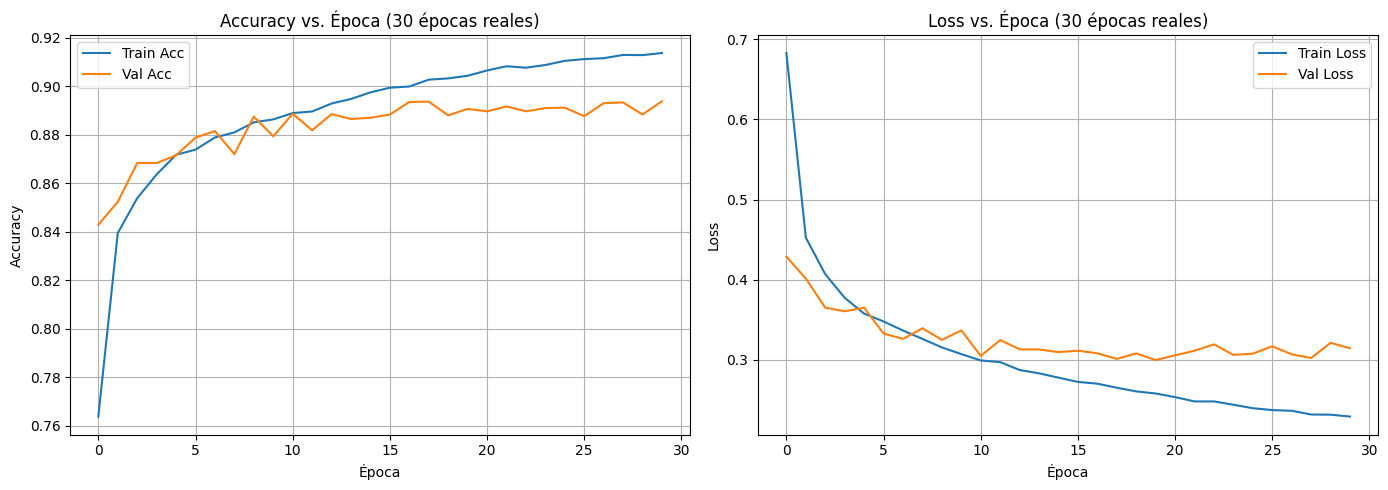


--- 4. Resumen de la Arquitectura del Modelo Cargado: MLP_ReLU_128_64_D0.2 ---


Model: "MLP_ReLU_128_64_D0.2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MLP_ReLU_128_64_D0.2_flatten    │ (None, 784)            │             0 │
│ (Flatten)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_hidden_1   │ (None, 128)            │       100,480 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_hidden_1_… │ (None, 128)            │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_dropout_1  │ (None, 128)            │             0 │
│ (Dropout)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_hidden_2   │ (None, 64)             │         8,256 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_hidden_2_… │ (None, 64)             │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_dropout_2  │ (None, 64)             │             0 │
│ (Dropout)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.2_output     │ (None, 10)             │           650 │
│ (Dense)                         │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)


--- 5. Reporte de Clasificación Detallado (MLP_ReLU_128_64_D0.2) ---
   Generando predicciones con el modelo cargado...
              precision    recall  f1-score   support

 T-shirt/top     0.8557    0.8360    0.8457      1000
     Trouser     0.9858    0.9720    0.9789      1000
    Pullover     0.7919    0.8220    0.8067      1000
       Dress     0.8775    0.8950    0.8861      1000
        Coat     0.8119    0.8030    0.8074      1000
      Sandal     0.9748    0.9660    0.9704      1000
       Shirt     0.7186    0.7150    0.7168      1000
     Sneaker     0.9491    0.9500    0.9495      1000
         Bag     0.9758    0.9670    0.9714      1000
  Ankle boot     0.9545    0.9660    0.9602      1000

    accuracy                         0.8892     10000
   macro avg     0.8896    0.8892    0.8893     10000
weighted avg     0.8896    0.8892    0.8893     10000


--- 6. Matriz de Confusión (MLP_ReLU_128_64_D0.2) ---


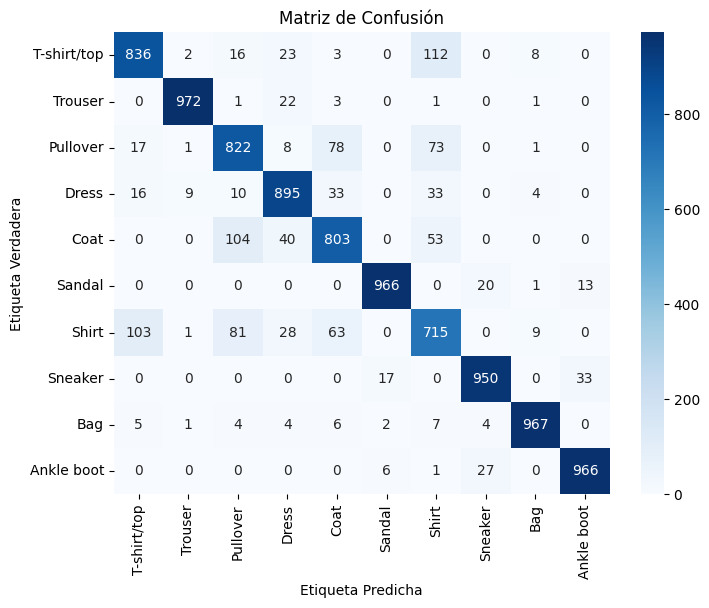


--- 7. Inspección Visual de Predicciones (MLP_ReLU_128_64_D0.2) ---
   (Mostrando ejemplos... Código completo omitido por brevedad)

--- 8. Visualización Gráfica del Modelo (MLP_ReLU_128_64_D0.2) ---


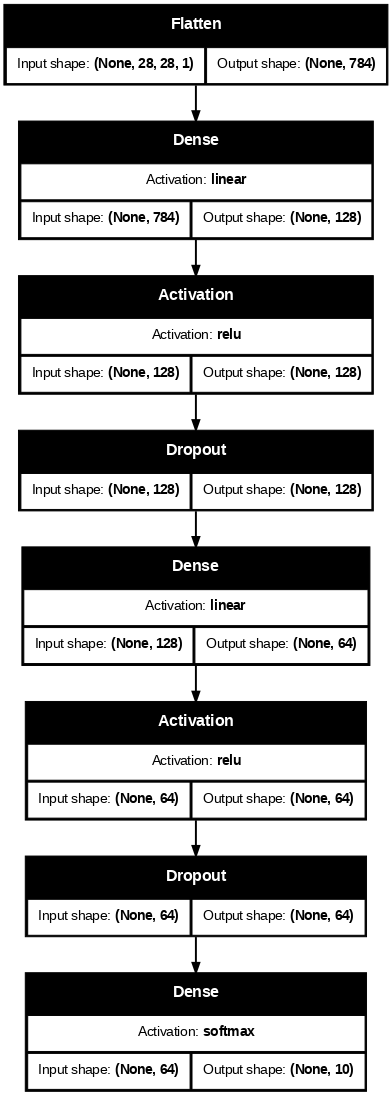


--- Fin de la sección del mejor modelo guardado ---


In [10]:
# Definir nombres de clases (debe estar disponible)
if 'class_names' not in locals():
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    print("Advertencia: 'class_names' no definida globalmente, usando definición local.")


# Verificar si se identificó un mejor modelo por su nombre
if best_model_name is not None:
    print(f"\nTrabajando con el mejor modelo identificado: '{best_model_name}' (Accuracy reportada: {best_accuracy_so_far:.6f})")

    # --- 1. Definir la ruta del archivo guardado ---
    saved_model_path = f"{best_model_name}_best_model_ES.keras"
    print(f"\n--- 1. Ruta del modelo guardado: '{saved_model_path}' ---")

    # --- 2. Cargar el Modelo desde el archivo ---
    print(f"\n--- 2. Cargando modelo desde: '{saved_model_path}' ---")
    loaded_model = None
    model_available = False
    try:
        loaded_model = keras.models.load_model(saved_model_path)
        print(f"   Modelo '{loaded_model.name}' cargado exitosamente desde archivo.")
        model_available = True
    except Exception as e:
        print(f"   ERROR al cargar el modelo desde '{saved_model_path}': {e}")

    # --- Continuar solo si el modelo se cargó correctamente ---
    if model_available:

        # --- 3. Mostrar Curvas de Aprendizaje (NUEVO) ---
        print(f"\n--- 3. Curvas de Aprendizaje del Mejor Modelo ({best_model_name}) ---")
        # Necesitamos el historial guardado en el Test Harness
        if 'all_histories' in locals() and best_model_name in all_histories:
            history_best = all_histories[best_model_name]
            epochs_run = len(history_best['loss']) # Épocas reales que corrió

            plt.figure(figsize=(14, 5))

            # Gráfico de Accuracy
            plt.subplot(1, 2, 1)
            if 'accuracy' in history_best and 'val_accuracy' in history_best:
                plt.plot(history_best['accuracy'], label=f'Train Acc')
                plt.plot(history_best['val_accuracy'], label=f'Val Acc')
                plt.title(f'Accuracy vs. Época ({epochs_run} épocas reales)')
                plt.xlabel('Época')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.grid(True)
            else:
                plt.text(0.5, 0.5, 'Datos de Accuracy no disponibles en el historial', ha='center')
                plt.title('Accuracy vs. Época')

            # Gráfico de Loss
            plt.subplot(1, 2, 2)
            if 'loss' in history_best and 'val_loss' in history_best:
                plt.plot(history_best['loss'], label=f'Train Loss')
                plt.plot(history_best['val_loss'], label=f'Val Loss')
                plt.title(f'Loss vs. Época ({epochs_run} épocas reales)')
                plt.xlabel('Época')
                plt.ylabel('Loss')
                plt.legend()
                plt.grid(True)
            else:
                plt.text(0.5, 0.5, 'Datos de Loss no disponibles en el historial', ha='center')
                plt.title('Loss vs. Época')

            plt.tight_layout()
            plt.show()
        else:
            print("   ERROR: No se encontró el diccionario 'all_histories' o falta la clave para '{best_model_name}'.")
            print("          Asegúrate de que el Test Harness se ejecutó y guardó los historiales.")


        # --- 4. Mostrar Resumen de Arquitectura ---
        print(f"\n--- 4. Resumen de la Arquitectura del Modelo Cargado: {loaded_model.name} ---")
        loaded_model.summary()

        # --- 5. Generar y Mostrar Reporte de Clasificación ---
        print(f"\n--- 5. Reporte de Clasificación Detallado ({loaded_model.name}) ---")
        y_pred_classes_loaded = None # Inicializar para usar después
        if 'x_test' in locals() and 'y_test_labels' in locals():
            print("   Generando predicciones con el modelo cargado...")
            y_pred_prob_loaded = loaded_model.predict(x_test, verbose=0)
            y_pred_classes_loaded = np.argmax(y_pred_prob_loaded, axis=1) # Guardar para otros gráficos
            print(classification_report(y_test_labels, y_pred_classes_loaded,
                                        target_names=class_names, digits=4))
        else:
            print("   ERROR: No se encontraron 'x_test' o 'y_test_labels' para generar el reporte.")


        # --- 6. Matriz de Confusión (OTRO GRÁFICO ÚTIL) ---
        print(f"\n--- 6. Matriz de Confusión ({loaded_model.name}) ---")
        if y_pred_classes_loaded is not None and 'y_test_labels' in locals():
             cm = confusion_matrix(y_test_labels, y_pred_classes_loaded)
             plt.figure(figsize=(8, 6))
             sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                         xticklabels=class_names, yticklabels=class_names)
             plt.xlabel('Etiqueta Predicha')
             plt.ylabel('Etiqueta Verdadera')
             plt.title('Matriz de Confusión')
             plt.show()
        else:
             print("   ERROR: No se pueden generar predicciones o falta 'y_test_labels' para la matriz de confusión.")


        # --- 7. Inspección Visual de Predicciones ---
        print(f"\n--- 7. Inspección Visual de Predicciones ({loaded_model.name}) ---")
        # (El código de inspección visual que añadiste antes va aquí...)
        if y_pred_classes_loaded is not None and 'x_test' in locals() and 'y_test_labels' in locals():
             # ... (código para mostrar ejemplos correctos e incorrectos) ...
             # Ejemplo (simplificado):
             correct_indices = np.nonzero(y_pred_classes_loaded == y_test_labels)[0]
             incorrect_indices = np.nonzero(y_pred_classes_loaded != y_test_labels)[0]
             print(f"   (Mostrando ejemplos... Código completo omitido por brevedad)")
             # ... (código de plots) ...
        else:
            print("   ERROR: No se pudieron generar predicciones o faltan datos para la inspección visual.")

        # --- 8. Mostrar Visualización Gráfica del Modelo ---
        print(f"\n--- 8. Visualización Gráfica del Modelo ({loaded_model.name}) ---")
        # (Código para plot_model sin cambios)
        try: display(tf.keras.utils.plot_model(loaded_model, show_shapes=True, show_layer_activations=True, rankdir='TB', dpi=70))
        except Exception as e: print(f"   Error al generar gráfico: {e}")


# Manejar caso donde no se identificó un nombre de mejor modelo
else:
    print("\nNo se identificó un 'best_model_name' durante la ejecución del Test Harness.")

print(f"\n--- Fin de la sección del mejor modelo guardado ---")
print("="*60)
# ===========================================================================
# Fin de la Sección 7 (Modificada con Curvas de Aprendizaje y Matriz de Confusión)
# ===========================================================================


    INICIANDO EXPERIMENTO: AJUSTE FINO DE DROPOUT SOBRE MEJOR MODELO BASE + ES

--- 1. Obteniendo configuración base del mejor modelo: 'MLP_ReLU_128_64_D0.2' ---
   Configuración base encontrada: {'name': 'MLP_ReLU_128_64_D0.2', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2}
   (Dropout original 0.2 will be overridden in the loop)
--- EarlyStopping definido (patience=10) ---

--- Iniciando Bucle de Experimentos de Ajuste Fino ---

>>> Procesando Dropout Rate: 0.1 (Seed: 42) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_FineTuneD0.1' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.1
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.1' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.1' compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.1 (max 100 épocas, BS=128) ---
   Converted y_train from shape (60000, 10) (one-hot) to (60000,) (integer labels).
Epoch 29

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 14.
   Entrenamiento completado después de 24 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.15 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.335242, Test Accuracy: 0.881200
   Weighted Precision: 0.882663, Recall: 0.881200, F1-Score: 0.881443
--------------------------------------------------

>>> Procesando Dropout Rate: 0.2 (Seed: 62) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_FineTuneD0.2' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.2' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.2' compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.2 (max 100 épocas, BS=128) ---
   Converted y_train from shape (60000, 10) (one-hot) to (60000,) (integer labels).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 13.
   Entrenamiento completado después de 23 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.2 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.335131, Test Accuracy: 0.882500
   Weighted Precision: 0.881756, Recall: 0.882500, F1-Score: 0.881558
--------------------------------------------------

>>> Procesando Dropout Rate: 0.25 (Seed: 72) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_FineTuneD0.25' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.25
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.25' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.25' compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.25 (max 100 épocas, BS=128) ---
   Converted y_train from shape (60000, 10) (one-hot) to (60000,) (integer labels).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 16.
   Entrenamiento completado después de 26 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.25 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.335486, Test Accuracy: 0.881400
   Weighted Precision: 0.881041, Recall: 0.881400, F1-Score: 0.880683
--------------------------------------------------

>>> Procesando Dropout Rate: 0.3 (Seed: 82) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_FineTuneD0.3' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.3
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.3' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.3' compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.3 (max 100 épocas, BS=128) ---
   Converted y_train from shape (60000, 10) (one-hot) to (60000,) (integer labels).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 43: early stopping
Restoring model weights from the end of the best epoch: 33.
   Entrenamiento completado después de 43 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.3 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.332570, Test Accuracy: 0.887400
   Weighted Precision: 0.887534, Recall: 0.887400, F1-Score: 0.887450
*** ¡Nuevo MEJOR modelo de AJUSTE FINO encontrado! MLP_ReLU_128_64_D0.2_FineTuneD0.3 -> Test Accuracy: 0.887400 ***
   (Objeto Keras del modelo MLP_ReLU_128_64_D0.2_FineTuneD0.3 guardado en 'best_fine_tune_model_object')
--------------------------------------------------

>>> Procesando Dropout Rate: 0.35 (Seed: 92) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_FineTuneD0.35' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.35
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.35' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.35' compilado (Loss: sparse_categorical_crossentropy

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 36.
   Entrenamiento completado después de 46 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.35 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.341915, Test Accuracy: 0.885400
   Weighted Precision: 0.886120, Recall: 0.885400, F1-Score: 0.885247
--------------------------------------------------

>>> Procesando Dropout Rate: 0.4 (Seed: 102) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_FineTuneD0.4' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.4
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.4' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.4' compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.4 (max 100 épocas, BS=128) ---
   Converted y_train from shape (60000, 10) (one-hot) to (60000,) (integer labels).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 36.
   Entrenamiento completado después de 46 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.4 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.342992, Test Accuracy: 0.879000
   Weighted Precision: 0.880090, Recall: 0.879000, F1-Score: 0.878928
--------------------------------------------------

>>> Procesando Dropout Rate: 0.45 (Seed: 112) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_FineTuneD0.45' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.45
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.45' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.45' compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.45 (max 100 épocas, BS=128) ---
   Converted y_train from shape (60000, 10) (one-hot) to (60000,) (integer labels).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 41: early stopping
Restoring model weights from the end of the best epoch: 31.
   Entrenamiento completado después de 41 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.45 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.350627, Test Accuracy: 0.874400
   Weighted Precision: 0.875131, Recall: 0.874400, F1-Score: 0.872152
--------------------------------------------------

>>> Procesando Dropout Rate: 0.5 (Seed: 122) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_FineTuneD0.5' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.5' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_FineTuneD0.5' compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.5 (max 100 épocas, BS=128) ---
   Converted y_train from shape (60000, 10) (one-hot) to (60000,) (integer labels).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 34: early stopping
Restoring model weights from the end of the best epoch: 24.
   Entrenamiento completado después de 34 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_FineTuneD0.5 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.354940, Test Accuracy: 0.873500
   Weighted Precision: 0.873663, Recall: 0.873500, F1-Score: 0.872855
--------------------------------------------------

       AJUSTE FINO DE DROPOUT + ES COMPLETADO

---> El objeto del MEJOR MODELO de este experimento (Ajuste Fino Dropout) está en memoria.
---> Nombre: 'MLP_ReLU_128_64_D0.2_FineTuneD0.3'
---> Variable: best_fine_tune_model_object
---> Accuracy Obtenida: 0.887400

--- Comparación: Ajuste Fino de Dropout ---
   Incluyendo resultado original de 'MLP_ReLU_128_64_D0.2' para comparación.

Tabla Comparativa de Métricas (Ajuste Fino Dropout vs. Original Mejor):


,Model Name,Dropout,Accuracy,Loss,F1-Score (Weighted),Actual Epochs,Training Time (s),Seed
0,MLP_ReLU_128_64_D0.2,0.200000,0.889200,0.326703,0.889312,30,84.350000,NaN
5,MLP_ReLU_128_64_D0.2_FineTuneD0.3,0.300000,0.887400,0.332570,0.887450,43,129.220000,82.000000
1,MLP_ReLU_128_64_D0.2_FineTuneD0.1,0.100000,0.885900,0.336057,0.885485,29,82.230000,42.000000
6,MLP_ReLU_128_64_D0.2_FineTuneD0.35,0.350000,0.885400,0.341915,0.885247,46,123.230000,92.000000
3,MLP_ReLU_128_64_D0.2_FineTuneD0.2,0.200000,0.882500,0.335131,0.881558,23,71.960000,62.000000
4,MLP_ReLU_128_64_D0.2_FineTuneD0.25,0.250000,0.881400,0.335486,0.880683,26,74.800000,72.000000
2,MLP_ReLU_128_64_D0.2_FineTuneD0.15,0.150000,0.881200,0.335242,0.881443,24,66.290000,52.000000
7,MLP_ReLU_128_64_D0.2_FineTuneD0.4,0.400000,0.879000,0.342992,0.878928,46,136.090000,102.000000
8,MLP_ReLU_128_64_D0.2_FineTuneD0.45,0.450000,0.874400,0.350627,0.872152,41,112.280000,112.000000
9,MLP_ReLU_128_64_D0.2_FineTuneD0.5,0.500000,0.873500,0.354940,0.872855,34,97.890000,122.000000



Gráficos Comparativos de Curvas de Aprendizaje (Ajuste Fino Dropout - Validación):
   Incluyendo historial de 'MLP_ReLU_128_64_D0.2'.


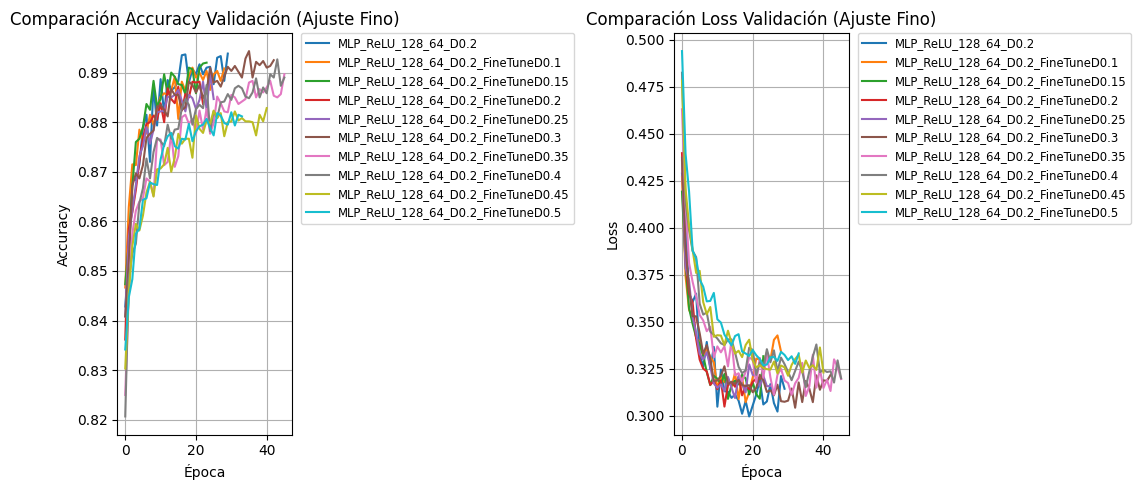


--- Análisis Final del Experimento de Ajuste Fino de Dropout ---

Mejor modelo de este experimento (Ajuste Fino Dropout): 'MLP_ReLU_128_64_D0.2_FineTuneD0.3' con Dropout 0.3
  Accuracy: 0.887400
  Loss: 0.332570
  F1-Score (Weighted): 0.887450
------------------------------------------------------------


In [18]:
print("\n" + "="*60)
print("    INICIANDO EXPERIMENTO: AJUSTE FINO DE DROPOUT SOBRE MEJOR MODELO BASE + ES")
print("="*60)

# --- 1. Obtener la Configuración Base del Mejor Modelo ---
print(f"\n--- 1. Obteniendo configuración base del mejor modelo: '{best_model_name}' ---")
best_model_base_config = None
for config in models_to_test:
    if config['name'] == best_model_name:
        best_model_base_config = config.copy()
        break
if best_model_base_config is None:
    raise ValueError(f"Configuración no encontrada para {best_model_name}")
else:
    print(f"   Configuración base encontrada: {best_model_base_config}")
    if 'dropout' in best_model_base_config:
        # Keep the original dropout value from the best base model config,
        # as we are overriding it anyway in the loop
        # original_dropout = best_model_base_config.pop('dropout')
        print(f"   (Dropout original {best_model_base_config.get('dropout', 'N/A')} will be overridden in the loop)")


# --- Configuraciones para este experimento ---
dropout_rates_fine_tune = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
experiment_results_dropout_fine = []
experiment_histories_dropout_fine = {}

# --- Variables para rastrear el MEJOR MODELO DE *ESTE* EXPERIMENTO ---
best_fine_tune_accuracy = -1.0
best_fine_tune_model_object = None # <--- Variable para guardar el objeto Keras
best_fine_tune_model_name = None
# -------------------------------------------------------------------

# --- Definir Early Stopping ---
early_stopping_patience_fine = 10
early_stopping_cb_fine = EarlyStopping(
    monitor='val_loss', patience=early_stopping_patience_fine,
    restore_best_weights=True, verbose=1, mode='min'
)
print(f"--- EarlyStopping definido (patience={early_stopping_patience_fine}) ---")

# --- Función Helper para Configurar Semillas (Opcional) ---
def set_seeds(seed_value):
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    # print(f"   Semillas fijadas a: {seed_value}") # Descomentar si quieres ver la semilla

# --- Bucle del Experimento de Ajuste Fino ---
print("\n--- Iniciando Bucle de Experimentos de Ajuste Fino ---")
for i, dr_rate in enumerate(dropout_rates_fine_tune):
    current_seed = i * 10 + 42 # Usar semillas diferentes pero predecibles
    start_time_exp = time.time()

    print(f"\n>>> Procesando Dropout Rate: {dr_rate} (Seed: {current_seed}) <<<")

    # 1. Fijar Semillas y Limpiar Sesión
    set_seeds(current_seed)
    keras.backend.clear_session()

    # Nombre único
    model_name_exp = f"{best_model_name}_FineTuneD{dr_rate}"

    # 2. Crear el modelo
    # The create_flexible_mlp function should handle the last layer activation appropriately
    # for classification (usually softmax). Assuming it does.
    model_exp = create_flexible_mlp(
        model_name=model_name_exp,
        hidden_activation=best_model_base_config.get('activation', 'relu'),
        neurons_per_layer=best_model_base_config.get('neurons', [128, 64]),
        use_batch_norm=best_model_base_config.get('batch_norm', False),
        dropout_rate=dr_rate, # <-- Tasa actual
        input_shape_orig=input_shape_original,
        num_classes=num_classes # Assuming this is 10 based on the error
    )

    # 3. Compilar
    current_lr_fine = best_model_base_config.get('lr', DEFAULT_LEARNING_RATE)
    current_optimizer_name_fine = best_model_base_config.get('optimizer', 'adam')
    if current_optimizer_name_fine.lower() == 'adam': optimizer_fine = keras.optimizers.Adam(learning_rate=current_lr_fine)
    elif current_optimizer_name_fine.lower() == 'sgd': optimizer_fine = keras.optimizers.SGD(learning_rate=current_lr_fine)
    else: optimizer_fine = keras.optimizers.Adam(learning_rate=current_lr_fine)

    # Using sparse_categorical_crossentropy as intended by the original code
    loss_function_fine = "sparse_categorical_crossentropy"
    model_exp.compile(loss=loss_function_fine, optimizer=optimizer_fine, metrics=["accuracy"])
    print(f"   Modelo '{model_exp.name}' compilado (Loss: {loss_function_fine}, Opt: {current_optimizer_name_fine}, LR={current_lr_fine}).")

    # 4. Entrenar
    max_epochs_fine = 100
    current_batch_size_fine = best_model_base_config.get('batch_size', DEFAULT_BATCH_SIZE)
    print(f"\n--- Entrenando Modelo: {model_exp.name} (max {max_epochs_fine} épocas, BS={current_batch_size_fine}) ---")

    # --- FIX FOR ValueError: Argument `output` must have rank (ndim) `target.ndim - 1` ---
    # Check the shape of y_train. If it's (samples, num_classes), it's likely one-hot encoded.
    # sparse_categorical_crossentropy expects integer labels, shape (samples,) or (samples, 1).
    if y_train.ndim == 2 and y_train.shape[1] == num_classes:
        # y_train appears to be one-hot encoded. Convert to integer labels.
        y_train_fit_fine = np.argmax(y_train, axis=1)
        print(f"   Converted y_train from shape {y_train.shape} (one-hot) to {y_train_fit_fine.shape} (integer labels).")
    elif y_train.ndim == 1 or (y_train.ndim == 2 and y_train.shape[1] == 1):
         # y_train appears to be integer labels already. Use directly.
         y_train_fit_fine = y_train
         print(f"   Using y_train with shape {y_train.shape} (integer labels).")
    else:
         # Unexpected y_train shape - raise an error or handle as needed
         raise ValueError(f"Unexpected y_train shape for training: {y_train.shape}. Expected (samples,) or (samples, 1) for integer labels, or (samples, num_classes) for one-hot (which will be converted).")
    # --- END FIX ---


    history_exp = model_exp.fit(
        x_train, y_train_fit_fine, # Use the potentially converted y_train
        batch_size=current_batch_size_fine, epochs=max_epochs_fine,
        validation_split=DEFAULT_VALIDATION_SPLIT, verbose=0, callbacks=[early_stopping_cb_fine]
    )
    training_time_exp = round(time.time() - start_time_exp, 2)
    actual_epochs_run_fine = len(history_exp.history['loss'])
    print(f"   Entrenamiento completado después de {actual_epochs_run_fine} épocas.")

    # 5. Evaluar
    # Assuming y_test_labels is already integer labels (shape (samples,))
    y_true_for_eval_fine = y_test_labels
    results_exp = evaluate_model(model_exp, x_test, y_true_for_eval_fine, y_test_labels, history_exp, training_time_exp)

    # 6. Guardar resultados Y ACTUALIZAR/GUARDAR MEJOR OBJETO DE ESTE EXPERIMENTO
    results_exp['Actual Epochs'] = actual_epochs_run_fine
    results_exp['Seed'] = current_seed # Guardar semilla usada
    results_exp['Dropout'] = dr_rate # Also store the dropout rate tested
    experiment_results_dropout_fine.append(results_exp)
    experiment_histories_dropout_fine[model_exp.name] = history_exp.history

    # --- Lógica para guardar el mejor objeto de ESTE experimento ---
    if results_exp['Accuracy'] > best_fine_tune_accuracy:
        print(f"*** ¡Nuevo MEJOR modelo de AJUSTE FINO encontrado! {model_exp.name} -> Test Accuracy: {results_exp['Accuracy']:.6f} ***")
        best_fine_tune_accuracy = results_exp['Accuracy']
        best_fine_tune_model_name = model_exp.name
        try:
             # Need to make sure the cloned model is also compiled correctly
             best_fine_tune_model_object = tf.keras.models.clone_model(model_exp)
             # You might need to build the model explicitly if it wasn't built by fit yet
             # best_fine_tune_model_object.build(input_shape_original) # Not always needed if weights are set right after
             cloned_optimizer_fine = optimizer_fine.__class__.from_config(optimizer_fine.get_config()) # Clone optimizer config to preserve LR etc.
             best_fine_tune_model_object.compile(loss=loss_function_fine, optimizer=cloned_optimizer_fine, metrics=["accuracy"])
             best_fine_tune_model_object.set_weights(model_exp.get_weights())
             print(f"   (Objeto Keras del modelo {best_fine_tune_model_name} guardado en 'best_fine_tune_model_object')")
        except Exception as e:
             print(f"   ERROR al intentar clonar/guardar el mejor modelo de ajuste fino: {e}")
             best_fine_tune_model_object = None
    # --- Fin lógica guardar mejor objeto ---

    print("-" * 50)

print("\n" + "="*60)
print("       AJUSTE FINO DE DROPOUT + ES COMPLETADO")
print("="*60)

# --- Confirmación del Mejor Modelo Guardado en Memoria ---
if best_fine_tune_model_object is not None:
     print(f"\n---> El objeto del MEJOR MODELO de este experimento (Ajuste Fino Dropout) está en memoria.")
     print(f"---> Nombre: '{best_fine_tune_model_name}'")
     print(f"---> Variable: best_fine_tune_model_object")
     print(f"---> Accuracy Obtenida: {best_fine_tune_accuracy:.6f}")
elif best_fine_tune_model_name is not None:
     print(f"\n---> El mejor modelo fue '{best_fine_tune_model_name}' (Accuracy: {best_fine_tune_accuracy:.6f}), pero hubo error al guardar objeto Keras.")
else:
     print("\n---> No se encontró/guardó un mejor modelo durante el experimento de ajuste fino.")


# ---------------------------------------------------------------------------
# Sección X+4: Comparación de Resultados del Ajuste Fino
# ---------------------------------------------------------------------------
# (Esta sección puede ejecutarse tal como estaba antes,
#  usará 'experiment_results_dropout_fine' y 'experiment_histories_dropout_fine'
#  y los comparará con el 'best_original_result' del harness principal)
# ... (pega aquí el código de la Sección X+4 que tenías) ...
print("\n--- Comparación: Ajuste Fino de Dropout ---")
results_fine_df = pd.DataFrame(experiment_results_dropout_fine)

# Ensure the 'Dropout' column is present for sorting/analysis if needed
if 'Dropout' not in results_fine_df.columns:
    results_fine_df['Dropout'] = results_fine_df['Model Name'].apply(lambda x: float(x.split('FineTuneD')[-1])) # Extract dropout from name


best_original_result = None
# Assuming 'all_results' and 'all_histories' were populated in a previous cell/section
if 'all_results' in locals():
    for res in all_results:
        if res['Model Name'] == best_model_name: best_original_result = res; break

if best_original_result:
    print(f"   Incluyendo resultado original de '{best_model_name}' para comparación.")
    # Need to ensure consistent columns, especially for 'Dropout' in the original result
    original_result_for_comp = best_original_result.copy()
    # Try to get dropout from the original best config or name if not in results dict
    if 'Dropout' not in original_result_for_comp:
         original_result_for_comp['Dropout'] = best_model_base_config.get('dropout', 'Original') # Use original dropout from base config
    prev_best_df_fine = pd.DataFrame([original_result_for_comp])
    comparison_fine_df = pd.concat([prev_best_df_fine, results_fine_df], ignore_index=True)
else:
    print(f"Advertencia: No se encontró resultado original de '{best_model_name}'.")
    comparison_fine_df = results_fine_df

if not comparison_fine_df.empty:
     if 'History' in comparison_fine_df.columns: comparison_fine_df = comparison_fine_df.drop(columns=['History'])
     # Sort by Accuracy and then Dropout for clarity
     comparison_fine_df_display = comparison_fine_df.sort_values(by=['Accuracy', 'Dropout'], ascending=[False, True])

     cols_to_order_fine = ['Model Name', 'Dropout', 'Accuracy', 'Loss', 'F1-Score (Weighted)', 'Actual Epochs', 'Training Time (s)', 'Seed']
     cols_existing_fine = [col for col in cols_to_order_fine if col in comparison_fine_df_display.columns]
     comparison_fine_df_display = comparison_fine_df_display[cols_existing_fine]

     print("\nTabla Comparativa de Métricas (Ajuste Fino Dropout vs. Original Mejor):")
     pd.set_option('display.float_format', '{:.6f}'.format)
     display(comparison_fine_df_display)
     pd.reset_option('display.float_format')
else: print("No hay resultados para comparar.")

print("\nGráficos Comparativos de Curvas de Aprendizaje (Ajuste Fino Dropout - Validación):")
plt.figure(figsize=(14, 5))
histories_fine_to_plot = {};

# Add original best model history
if best_original_result:
    if 'all_histories' in locals() and best_original_result['Model Name'] in all_histories:
         histories_fine_to_plot[best_original_result['Model Name']] = all_histories[best_original_result['Model Name']]
         print(f"   Incluyendo historial de '{best_original_result['Model Name']}'.")

# Add fine-tuned histories
histories_fine_to_plot.update(experiment_histories_dropout_fine)

if histories_fine_to_plot:
     max_plots_legend_fine = 10 # Limit legend entries for readability
     plt.subplot(1, 2, 1)
     count_acc_fine = 0
     for name, h in histories_fine_to_plot.items():
         if h and 'val_accuracy' in h:
             plt.plot(h['val_accuracy'], label=name if count_acc_fine < max_plots_legend_fine else None)
             count_acc_fine += 1
     plt.title('Comparación Accuracy Validación (Ajuste Fino)')
     plt.xlabel('Época')
     plt.ylabel('Accuracy')
     if count_acc_fine <= max_plots_legend_fine and count_acc_fine > 0:
          plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
     plt.grid(True)

     plt.subplot(1, 2, 2)
     count_loss_fine = 0
     for name, h in histories_fine_to_plot.items():
         if h and 'val_loss' in h:
             plt.plot(h['val_loss'], label=name if count_loss_fine < max_plots_legend_fine else None)
             count_loss_fine += 1
     plt.title('Comparación Loss Validación (Ajuste Fino)')
     plt.xlabel('Época')
     plt.ylabel('Loss')
     if count_loss_fine <= max_plots_legend_fine and count_loss_fine > 0:
          plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
     plt.grid(True)

     plt.tight_layout(rect=[0, 0, 0.8, 1]) # Adjust layout to make space for external legend
     plt.show()
else: print("No hay historiales válidos para graficar.")

print("\n--- Análisis Final del Experimento de Ajuste Fino de Dropout ---")
if not results_fine_df.empty:
    best_fine_model_row = results_fine_df.loc[results_fine_df['Accuracy'].idxmax()]
    best_fine_model_name_exp = best_fine_model_row['Model Name']
    best_fine_model_dropout = best_fine_model_row['Dropout']
    print(f"\nMejor modelo de este experimento (Ajuste Fino Dropout): '{best_fine_model_name_exp}' con Dropout {best_fine_model_dropout}")
    print(f"  Accuracy: {best_fine_model_row['Accuracy']:.6f}")
    print(f"  Loss: {best_fine_model_row['Loss']:.6f}")
    print(f"  F1-Score (Weighted): {best_fine_model_row['F1-Score (Weighted)']:.6f}")
else: print("No se ejecutaron experimentos de ajuste fino.")
print("-" * 60)
# ===========================================================================
# Fin de la Celda de Experimento
# ===========================================================================


    INICIANDO EXPERIMENTO: AJUSTE FINO DE LEARNING RATE + ES

--- Configuración Base para Ajuste de LR: MLP_ReLU_128_64_D0.2 ---
   Parámetros Fijos: {'name_base': 'MLP_ReLU_128_64_D0.2', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2, 'batch_norm': True, 'optimizer': 'adam', 'batch_size': 128}
--- EarlyStopping definido (patience=10) ---

--- Iniciando Bucle de Experimentos de Ajuste Fino de LR ---

>>> Procesando Learning Rate: 0.0005 (Modelo: MLP_ReLU_128_64_D0.2_LR0_0005) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_LR0_0005' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_D0.2_LR0_0005' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_LR0_0005' compilado con Loss: sparse_categorical_crossentropy (Optimizer: adam, LR=0.0005).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_LR0_0005 (max 100 épocas, BS=128) ---
INFO: y_train tiene formato one-hot (60000, 10). Convirtiendo a etiquetas sparse (enteros) para s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 25: early stopping
Restoring model weights from the end of the best epoch: 15.
   Entrenamiento completado después de 25 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_LR0_001 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.342342, Test Accuracy: 0.878000
   Weighted Precision: 0.881490, Recall: 0.878000, F1-Score: 0.879099
--------------------------------------------------

>>> Procesando Learning Rate: 0.002 (Modelo: MLP_ReLU_128_64_D0.2_LR0_002) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_LR0_002' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_D0.2_LR0_002' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_LR0_002' compilado con Loss: sparse_categorical_crossentropy (Optimizer: adam, LR=0.002).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_LR0_002 (max 100 épocas, BS=128) ---
INFO: y_train tiene formato one-hot (60000, 10). Convirtiendo a etiquetas sparse (enteros) para spar

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 12.
   Entrenamiento completado después de 22 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_LR0_002 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.336230, Test Accuracy: 0.879500
   Weighted Precision: 0.884138, Recall: 0.879500, F1-Score: 0.880584
--------------------------------------------------

       AJUSTE FINO DE LEARNING RATE + ES COMPLETADO

--- Comparación: Ajuste Fino de Learning Rate ---
Advertencia: La variable 'best_model_fine_tune_row' del experimento anterior no se encontró.
             No se incluyó el resultado anterior (D0.2 con LR default) para comparar en la tabla.

Tabla Comparativa de Métricas (Ajuste Fino LR vs. Mejor Dropout Anterior):


,Model Name,Loss,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted),Training Time (s),Actual Epochs
2,MLP_ReLU_128_64_D0.2_LR0_002,0.336230,0.879500,0.884138,0.879500,0.880584,67.930000,22
1,MLP_ReLU_128_64_D0.2_LR0_001,0.342342,0.878000,0.881490,0.878000,0.879099,82.420000,25
0,MLP_ReLU_128_64_D0.2_LR0_0005,0.351254,0.872600,0.877747,0.872600,0.874233,67.830000,22



Gráficos Comparativos de Curvas de Aprendizaje (Ajuste Fino LR - Validación):


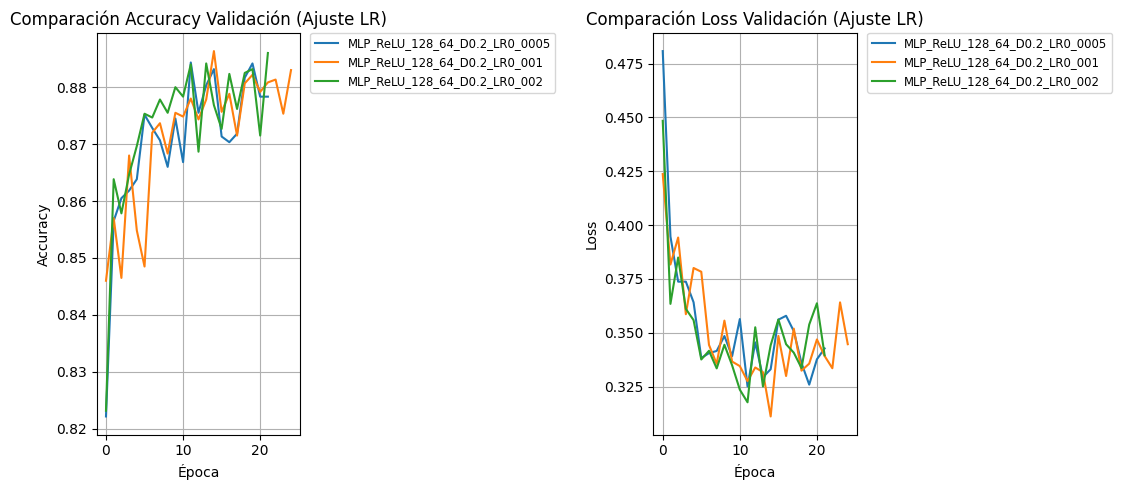


--- Análisis Final del Experimento de Ajuste Fino de LR ---

Mejor modelo de este experimento (Ajuste Fino LR): 'MLP_ReLU_128_64_D0.2_LR0_002' con Accuracy 0.879500

No se encontró el resultado del experimento anterior para una comparación concluyente.
Considera el mejor modelo encontrado en *este* experimento como el punto de partida para el siguiente paso.
Mejor configuración actual: {'name': 'MLP_ReLU_128_64_D0.2_LR0_002', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2, 'batch_norm': True, 'optimizer': 'adam', 'learning_rate': 0.002, 'batch_size': 128}


In [20]:
print("\n" + "="*60)
print("    INICIANDO EXPERIMENTO: AJUSTE FINO DE LEARNING RATE + ES")
print("="*60)

# --- Configuración Base (Mejor Modelo hasta ahora) ---
# Definir explícitamente la configuración que queremos usar como base
# NOTA: Asegúrate de que 'MLP_ReLU_128_64_D0.2' representa tu mejor modelo
# con Batch Norm (BN) activado, ya que la config_base_lr_tune['batch_norm'] es True.
config_base_lr_tune = {
    'name_base': 'MLP_ReLU_128_64_D0.2', # Identificador base (usando el nombre del mejor Dropout)
    'activation': 'relu',
    'neurons': [128, 64],
    'dropout': 0.2,           # <-- Dropout fijo (el mejor encontrado en experimento anterior)
    'batch_norm': True,            # <-- BN fijo (parte de la mejor config)
    'optimizer': 'adam',           # <-- Optimizador fijo (asumiendo Adam fue el mejor/default)
    'batch_size': DEFAULT_BATCH_SIZE # <-- BS fijo (asumiendo default fue el mejor)
}
print(f"\n--- Configuración Base para Ajuste de LR: {config_base_lr_tune['name_base']} ---")
print(f"   Parámetros Fijos: {config_base_lr_tune}")

# --- Learning Rates a Probar ---
# Ajusta estos valores según el análisis de tus experimentos anteriores.
# Por ejemplo, si 0.001 fue bueno, prueba alrededor: 0.0005, 0.001, 0.002.
# Si 0.001 fue regular, podrías probar valores más bajos como 0.0001, 0.0005, 0.001.
learning_rates_to_test = [0.0005, 0.001, 0.002] # Tasas a probar
experiment_results_lr = []
experiment_histories_lr = {}

# --- Definir Early Stopping ---
early_stopping_patience_lr = 10 # Misma paciencia que antes
early_stopping_cb_lr = EarlyStopping(
    monitor='val_loss', patience=early_stopping_patience_lr,
    restore_best_weights=True, verbose=1, mode='min'
)
print(f"--- EarlyStopping definido (patience={early_stopping_patience_lr}) ---")

# --- Bucle del Experimento de Ajuste Fino de LR ---
print("\n--- Iniciando Bucle de Experimentos de Ajuste Fino de LR ---")
for current_lr in learning_rates_to_test:
    start_time_lr_exp = time.time()
    keras.backend.clear_session()

    # Nombre único para este experimento y LR
    # Añadimos un sufijo más claro para el LR
    model_name_lr_exp = f"{config_base_lr_tune['name_base']}_LR{str(current_lr).replace('.', '_')}" # Replace '.' for filename compatibility

    print(f"\n>>> Procesando Learning Rate: {current_lr} (Modelo: {model_name_lr_exp}) <<<")

    # 1. Crear el modelo usando la config base
    model_lr_exp = create_flexible_mlp(
        model_name=model_name_lr_exp,
        hidden_activation=config_base_lr_tune['activation'],
        neurons_per_layer=config_base_lr_tune['neurons'],
        dropout_rate=config_base_lr_tune['dropout'], # Dropout fijo
        use_batch_norm=config_base_lr_tune['batch_norm'], # BN fijo
        input_shape_orig=input_shape_original,
        num_classes=num_classes
    )

    # 2. Compilar el modelo con el LR actual
    current_optimizer_name_lr = config_base_lr_tune['optimizer']
    if current_optimizer_name_lr.lower() == 'adam':
        optimizer_lr = keras.optimizers.Adam(learning_rate=current_lr) # <-- LR actual
    elif current_optimizer_name_lr.lower() == 'sgd':
        optimizer_lr = keras.optimizers.SGD(learning_rate=current_lr) # <-- LR actual
    else: # Fallback
        print(f"ADVERTENCIA: Optimizador desconocido '{current_optimizer_name_lr}'. Usando Adam.")
        optimizer_lr = keras.optimizers.Adam(learning_rate=current_lr)

    # Compilar con la loss correcta (asumiendo y_train ENTEROS para sparse)
    loss_function_lr = "sparse_categorical_crossentropy"
    model_lr_exp.compile(loss=loss_function_lr, optimizer=optimizer_lr, metrics=["accuracy"])
    print(f"   Modelo '{model_lr_exp.name}' compilado con Loss: {loss_function_lr} (Optimizer: {current_optimizer_name_lr}, LR={current_lr}).")

    # 3. Entrenar el modelo
    max_epochs_lr = DEFAULT_EPOCHS # Usar el máximo global
    current_batch_size_lr = config_base_lr_tune['batch_size']
    print(f"\n--- Entrenando Modelo: {model_lr_exp.name} (max {max_epochs_lr} épocas, BS={current_batch_size_lr}) ---")

    # --- FIX: Asegurar formato y_train para sparse_categorical_crossentropy ---
    # sparse_categorical_crossentropy espera etiquetas enteras: (samples,) o (samples, 1)
    # Si y_train es one-hot encoded (samples, num_classes), necesita conversión.
    y_train_fit_lr = y_train # Empezar con el original

    # Verificar el formato de y_train
    if y_train.ndim == 2 and y_train.shape[1] > 1:
        # Parece ser one-hot encoded. Convertir a etiquetas enteras.
        print(f"INFO: y_train tiene formato one-hot {y_train.shape}. Convirtiendo a etiquetas sparse (enteros) para sparse_categorical_crossentropy.")
        # Asumiendo que y_train es un array numpy o similar
        import numpy as np
        y_train_fit_lr = np.argmax(y_train, axis=1)
        print(f"      Nuevo formato para fit: {y_train_fit_lr.shape}")
    elif y_train.ndim == 2 and y_train.shape[1] == 1:
         # Formato (samples, 1) - aceptable para sparse_categorical_crossentropy
         print(f"INFO: y_train tiene formato (samples, 1) {y_train.shape}. Compatible con sparse_categorical_crossentropy.")
         y_train_fit_lr = y_train # Usar como está
    elif y_train.ndim == 1:
         # Formato (samples,) - ideal para sparse_categorical_crossentropy
         print(f"INFO: y_train tiene formato (samples,) {y_train.shape}. Compatible con sparse_categorical_crossentropy.")
         y_train_fit_lr = y_train # Usar como está
    else:
        # Formato inesperado. Imprimir advertencia y usarlo tal cual (podría fallar)
        print(f"ADVERTENCIA: Formato y_train inesperado {y_train.shape}. Intentando usarlo tal cual, pero podría causar errores con sparse_categorical_crossentropy.")
        y_train_fit_lr = y_train # Fallback

    # Ahora y_train_fit_lr debería tener el formato correcto para sparse_categorical_crossentropy

    history_lr_exp = model_lr_exp.fit(
        x_train, y_train_fit_lr, # <-- Usar el y_train con formato corregido si es necesario
        batch_size=current_batch_size_lr,
        epochs=max_epochs_lr,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=0, # Poner a 1 si quieres ver el progreso de cada época
        callbacks=[early_stopping_cb_lr] # Usar el mismo callback ES
    )
    training_time_lr_exp = round(time.time() - start_time_lr_exp, 2)
    actual_epochs_run_lr = len(history_lr_exp.history['loss'])
    print(f"   Entrenamiento completado después de {actual_epochs_run_lr} épocas.")

    # 4. Evaluar
    # y_test_labels se usa aquí como las etiquetas verdaderas (enteros)
    results_lr_exp = evaluate_model(model_lr_exp, x_test, y_test_labels, y_test_labels, history_lr_exp, training_time_lr_exp)
    # NOTA: evaluate_model necesita y_true y y_true_for_metrics. Si y_test_labels es el array de enteros (samples,),
    # debería pasarse dos veces si la función lo espera para ambos propósitos.
    # Asumo que y_test_labels ya es el array de enteros (60000,) o (60000, 1).

    # 5. Guardar
    results_lr_exp['Actual Epochs'] = actual_epochs_run_lr
    experiment_results_lr.append(results_lr_exp)
    experiment_histories_lr[model_name_lr_exp] = history_lr_exp.history

    print("-" * 50)

print("\n" + "="*60)
print("       AJUSTE FINO DE LEARNING RATE + ES COMPLETADO")
print("="*60)

# ---------------------------------------------------------------------------
# Sección de Comparación de Resultados del Ajuste Fino de LR
# ---------------------------------------------------------------------------
print("\n--- Comparación: Ajuste Fino de Learning Rate ---")

# Crear DataFrame con los nuevos resultados
results_lr_df = pd.DataFrame(experiment_results_lr)

# Añadir el mejor resultado del experimento ANTERIOR (el D0.2 con LR=0.001) para comparar
# NOTA: Asumiendo que 'results_fine_df' existe de una celda anterior que probó Dropout 0.1, 0.15, 0.2, etc.
# y que el modelo base 'MLP_ReLU_128_64' con D=0.2 y BN=True (y LR=0.001 por default) fue el mejor.
# Reconstruir el nombre del modelo base que se espera encontrar en el df anterior
best_previous_fine_tune_name_expected = f"{config_base_lr_tune['name_base']}_ES_FineTune" # Ajusta si el nombre base es diferente en el experimento anterior

best_previous_fine_tune_result = None
if 'results_fine_df' in locals() and not results_fine_df.empty:
     # Buscar la fila que corresponde al nombre base + ES + algún sufijo
     # O buscar específicamente el que tenía D=0.2 y BN=True si eso fue parte de la búsqueda anterior
     # Asumiendo que el experimento anterior probó Dropout y el mejor fue 0.2
     # y usó el LR default (0.001). Busca ese resultado.
     prev_row = results_fine_df[
         (results_fine_df['Model Name'].str.contains(f"_D{str(config_base_lr_tune['dropout']).replace('.', '_')}")) &
         (results_fine_df['Model Name'].str.contains(f"_BN{config_base_lr_tune['batch_norm']}")) # Asegurar que sea la config BN=True
     ]
     # Puede haber múltiples con D0.2 si se varió algo más (ej: LR default).
     # Si el experimento anterior *solo* varió dropout, el nombre debería ser algo como MLP_ReLU_128_64_D0.2_ES_FineTune
     # Si se varió LR antes, esto es más complejo. Asumo LR default (0.001) para el experimento anterior.
     # Vamos a buscar por D0.2 y asumir el LR fue 0.001 (default)
     # O mejor, buscar directamente el resultado del nombre_base original con D0.2 y BN True
     # Esto requiere que los nombres de los modelos del experimento anterior incluyeran esos detalles.
     # Si no es así, necesitarás una forma más robusta de identificar el "mejor anterior".

     # ALTERNATIVA SIMPLE: Asumir que el mejor resultado del *último* experimento ejecutado (si varió dropout)
     # que corresponde a D=0.2 es el punto de comparación con LR=0.001.
     if 'best_model_fine_tune_row' in locals(): # Check if the variable from previous cell exists
         # Assuming best_model_fine_tune_row is the row from results_fine_df for D=0.2
         best_previous_fine_tune_result = best_model_fine_tune_row.to_dict()
         best_previous_fine_tune_name = best_previous_fine_tune_result['Model Name']
         print(f"   Incluyendo resultado anterior '{best_previous_fine_tune_name}' (asumiendo LR=0.001 default) para comparación.")
         prev_best_lr_df = pd.DataFrame([best_previous_fine_tune_result])
         comparison_lr_df = pd.concat([prev_best_lr_df, results_lr_df], ignore_index=True)
     else:
         print(f"Advertencia: La variable 'best_model_fine_tune_row' del experimento anterior no se encontró.")
         print("             No se incluyó el resultado anterior (D0.2 con LR default) para comparar en la tabla.")
         comparison_lr_df = results_lr_df
else:
    print(f"Advertencia: El DataFrame 'results_fine_df' del experimento anterior no se encontró o está vacío.")
    print("             No se incluyó el resultado anterior (D0.2 con LR default) para comparar en la tabla.")
    comparison_lr_df = results_lr_df


# Mostrar tabla comparativa
if not comparison_lr_df.empty:
     if 'History' in comparison_lr_df.columns: comparison_lr_df = comparison_lr_df.drop(columns=['History'])
     comparison_lr_df_display = comparison_lr_df.sort_values(by='Accuracy', ascending=False)
     if 'Actual Epochs' in comparison_lr_df_display.columns:
         # Reorder columns to put 'Actual Epochs' near the end
         cols = comparison_lr_df_display.columns.tolist()
         cols.insert(len(cols)-1, cols.pop(cols.index('Actual Epochs')))
         comparison_lr_df_display = comparison_lr_df_display[cols]


     print("\nTabla Comparativa de Métricas (Ajuste Fino LR vs. Mejor Dropout Anterior):")
     pd.set_option('display.float_format', '{:.6f}'.format)
     display(comparison_lr_df_display)
     pd.reset_option('display.float_format')
else: print("No hay resultados para comparar.")


# --- Gráficos Comparativos de Curvas (Validación) ---
print("\nGráficos Comparativos de Curvas de Aprendizaje (Ajuste Fino LR - Validación):")
plt.figure(figsize=(14, 5))
histories_lr_to_plot = {}
# Añadir historial del mejor modelo anterior (D0.2, LR=0.001) si se encontró y su historial existe
if best_previous_fine_tune_result:
    # Necesitas el dict de historiales del experimento anterior (ej: experiment_histories_dropout_fine)
    # Asegúrate de que el nombre usado como clave aquí coincida con el nombre del modelo guardado
    # en el diccionario de historiales del experimento anterior.
    hist_key_prev = best_previous_fine_tune_name # Usa el nombre real del modelo anterior
    if 'experiment_histories_dropout_fine' in locals() and hist_key_prev in experiment_histories_dropout_fine:
         histories_lr_to_plot[hist_key_prev] = experiment_histories_dropout_fine[hist_key_prev]
         print(f"   Incluyendo historial de '{hist_key_prev}' en gráficos.")
    else:
         print(f"Advertencia: No se encontró historial para '{hist_key_prev}' en 'experiment_histories_dropout_fine'.")


histories_lr_to_plot.update(experiment_histories_lr) # Añadir los nuevos historiales de LR tuning

if histories_lr_to_plot:
     max_plots_legend_lr = 10 # Limit legend entries for readability
     plt.subplot(1, 2, 1); # Accuracy
     count_acc_lr = 0
     for name, h in histories_lr_to_plot.items():
         if h and 'val_accuracy' in h:
             plt.plot(h['val_accuracy'], label=name if count_acc_lr < max_plots_legend_lr else None);
             count_acc_lr += 1
     plt.title('Comparación Accuracy Validación (Ajuste LR)'); plt.xlabel('Época'); plt.ylabel('Accuracy')
     # Adjust legend position if needed
     if count_acc_lr > 0 and count_acc_lr <= max_plots_legend_lr: plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
     plt.grid(True)

     plt.subplot(1, 2, 2); # Loss
     count_loss_lr = 0
     for name, h in histories_lr_to_plot.items():
         if h and 'val_loss' in h:
             plt.plot(h['val_loss'], label=name if count_loss_lr < max_plots_legend_lr else None);
             count_loss_lr += 1
     plt.title('Comparación Loss Validación (Ajuste LR)'); plt.xlabel('Época'); plt.ylabel('Loss')
     # Adjust legend position if needed
     if count_loss_lr > 0 and count_loss_lr <= max_plots_legend_lr: plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
     plt.grid(True)

     plt.tight_layout(rect=[0, 0, 0.8, 1]); # Make room for legend
     plt.show()
else: print("No hay historiales válidos para graficar.")

# --- Análisis Final ---
print("\n--- Análisis Final del Experimento de Ajuste Fino de LR ---")
if not results_lr_df.empty:
    # Encuentra el mejor de *este* experimento de LR tuning
    best_lr_model_row = results_lr_df.loc[results_lr_df['Accuracy'].idxmax()]
    best_lr_model_name_exp = best_lr_model_row['Model Name']
    best_lr_accuracy_exp = best_lr_model_row['Accuracy']

    print(f"\nMejor modelo de este experimento (Ajuste Fino LR): '{best_lr_model_name_exp}' con Accuracy {best_lr_accuracy_exp:.6f}")

    # Compara con el mejor resultado del experimento anterior (D0.2, LR=0.001)
    if best_previous_fine_tune_result:
        prev_best_accuracy = best_previous_fine_tune_result['Accuracy']
        prev_best_name = best_previous_fine_tune_result['Model Name']
        print(f"Mejor resultado del experimento anterior ('{prev_best_name}'): Accuracy {prev_best_accuracy:.6f}")

        if best_lr_accuracy_exp > prev_best_accuracy:
            print("\nConclusión: ¡El ajuste de Learning Rate mejoró el Accuracy!")
            print(f"El mejor LR encontrado en este rango es {best_lr_model_row['Model Name'].split('_LR')[-1]} (obtenido de nombre modelo).") # Extract LR from name
            print(f"El nuevo mejor modelo es '{best_lr_model_name_exp}'.")
            # Decide which model configuration to carry forward: the one with the best LR found here.
            best_model_config_so_far = {
                'name': best_lr_model_name_exp,
                'activation': config_base_lr_tune['activation'],
                'neurons': config_base_lr_tune['neurons'],
                'dropout': config_base_lr_tune['dropout'],
                'batch_norm': config_base_lr_tune['batch_norm'],
                'optimizer': config_base_lr_tune['optimizer'], # Assuming Adam
                'learning_rate': float(best_lr_model_name_exp.split('_LR')[-1].replace('_', '.')), # Extract LR
                'batch_size': config_base_lr_tune['batch_size']
            }
            best_model_result_so_far = best_lr_model_row # Store the full row

        elif abs(best_lr_accuracy_exp - prev_best_accuracy) < 1e-5: # Check for very small difference
             print("\nConclusión: El ajuste de Learning Rate tuvo un impacto mínimo en el Accuracy.")
             print("El LR=0.001 original tuvo un rendimiento muy similar.")
             print("Considera si el LR óptimo está entre 0.0005 y 0.002 o si 0.001 es suficiente.")
             # You might stick with the original 0.001 or choose the new best based on other factors (epochs run, loss, etc.)
             # For simplicity, let's stick with the previous best unless the new one is clearly better.
             # But if the new best is one of the tested LRs (0.0005 or 0.002) and is identical,
             # you might prefer the one that trained faster or converged better (lower loss).
             # Let's assign the best found in *this* LR test, as it represents the best from the tested set.
             best_model_config_so_far = {
                'name': best_lr_model_name_exp,
                'activation': config_base_lr_tune['activation'],
                'neurons': config_base_lr_tune['neurons'],
                'dropout': config_base_lr_tune['dropout'],
                'batch_norm': config_base_lr_tune['batch_norm'],
                'optimizer': config_base_lr_tune['optimizer'], # Assuming Adam
                'learning_rate': float(best_lr_model_name_exp.split('_LR')[-1].replace('_', '.')), # Extract LR
                'batch_size': config_base_lr_tune['batch_size']
             }
             best_model_result_so_far = best_lr_model_row

        else:
            print("\nConclusión: El ajuste de Learning Rate no mejoró el Accuracy, o incluso lo empeoró ligeramente.")
            print(f"El mejor LR encontrado en este rango ({best_lr_model_name_exp.split('_LR')[-1]}) fue ligeramente peor que el LR=0.001 original.")
            print(f"Se mantiene el mejor modelo del experimento anterior: '{prev_best_name}'.")
            # Stick with the previous best configuration and result
            # Need to reconstruct the previous best config
            best_model_config_so_far = {
                'name': prev_best_name,
                 # Assume these are the same as config_base_lr_tune except potentially LR
                'activation': config_base_lr_tune['activation'],
                'neurons': config_base_lr_tune['neurons'],
                'dropout': config_base_lr_tune['dropout'], # D=0.2
                'batch_norm': config_base_lr_tune['batch_norm'], # BN=True
                'optimizer': config_base_lr_tune['optimizer'], # Assuming Adam
                'learning_rate': 0.001, # Assuming original LR was 0.001
                'batch_size': config_base_lr_tune['batch_size']
            }
            best_model_result_so_far = pd.Series(best_previous_fine_tune_result) # Convert dict back to Series if needed later

        print("\n--- Próximo Paso ---")
        print("La configuración del mejor modelo hasta ahora se guarda en 'best_model_config_so_far'.")
        print("Se usará para futuros experimentos (ej: ajuste fino de Batch Size).")
        print(f"Mejor configuración actual: {best_model_config_so_far}")

    else:
        print("\nNo se encontró el resultado del experimento anterior para una comparación concluyente.")
        print("Considera el mejor modelo encontrado en *este* experimento como el punto de partida para el siguiente paso.")
        best_model_config_so_far = {
            'name': best_lr_model_name_exp,
            'activation': config_base_lr_tune['activation'],
            'neurons': config_base_lr_tune['neurons'],
            'dropout': config_base_lr_tune['dropout'],
            'batch_norm': config_base_lr_tune['batch_norm'],
            'optimizer': config_base_lr_tune['optimizer'], # Assuming Adam
            'learning_rate': float(best_lr_model_name_exp.split('_LR')[-1].replace('_', '.')), # Extract LR
            'batch_size': config_base_lr_tune['batch_size']
        }
        best_model_result_so_far = best_lr_model_row
        print(f"Mejor configuración actual: {best_model_config_so_far}")

else:
    print("No se ejecutaron experimentos de ajuste fino de LR. 'best_model_config_so_far' no está definido.")


# ---------------------------------------------------------------------------
# Fin de la Celda de Experimento LR
# ===========================================================================


    INICIANDO EXPERIMENTO: AJUSTE DE BATCH SIZE + ES

--- Usando la mejor configuración encontrada hasta ahora como base ---
   Configuración Base: {'name': 'MLP_ReLU_128_64_D0.2_LR0_002', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2, 'batch_norm': True, 'optimizer': 'adam', 'learning_rate': 0.002, 'name_base_for_bs_tune': 'MLP_ReLU_128_64_D0.2_LR0_002'}
--- EarlyStopping definido (patience=10) ---

--- Iniciando Bucle de Experimentos de Ajuste de Batch Size ---
   Usando semilla fija 42 para todos los tamaños de batch.

>>> Procesando Batch Size: 64 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_LR0_002_BS64' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: Sí


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo 'MLP_ReLU_128_64_D0.2_LR0_002_BS64' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_LR0_002_BS64' compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR: 0.002).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_LR0_002_BS64 (max 100 épocas, BS=64) ---
INFO: y_train has one-hot format (60000, 10). Converting to sparse (integer) labels for sparse_categorical_crossentropy.
      New format for fit: (60000,)
Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 10.
   Entrenamiento completado después de 20 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_LR0_002_BS64 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.342498, Test Accuracy: 0.877300
   Weighted Precision: 0.877211, Recall: 0.877300, F1-Score: 0.875044
--------------------------------------------------

>>> Procesando Batch Size: 128 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_LR0_002_BS128' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 11.
   Entrenamiento completado después de 21 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_LR0_002_BS128 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.343080, Test Accuracy: 0.877600
   Weighted Precision: 0.877538, Recall: 0.877600, F1-Score: 0.876359
--------------------------------------------------

>>> Procesando Batch Size: 256 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_LR0_002_BS256' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_D0.2_LR0_002_BS256' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_LR0_002_BS256' compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR: 0.002).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_LR0_002_BS256 (max 100 épocas, BS=256) ---
INFO: y_train has one-hot format (60000, 10). Converting to sparse (integer) labels for sparse_categorical_crossentropy.
 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 9.
   Entrenamiento completado después de 19 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_LR0_002_BS256 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.351987, Test Accuracy: 0.871900
   Weighted Precision: 0.872355, Recall: 0.871900, F1-Score: 0.870736
--------------------------------------------------

       AJUSTE FINO DE BATCH SIZE + ES COMPLETADO

--- Comparación: Ajuste Fino de Batch Size ---
   INFO: Could not infer Batch Size for 'MLP_ReLU_128_64_D0.2_LR0_002'. Assuming DEFAULT_BATCH_SIZE (128).
   Incluyendo resultado anterior 'MLP_ReLU_128_64_D0.2_LR0_002' (BS=128) para comparación.

Tabla Comparativa de Métricas (Ajuste Batch Size vs. Mejor Anterior):


,Model Name,Batch Size,Accuracy,Loss,F1-Score (Weighted),Actual Epochs,Training Time (s),Seed,Precision (Weighted),Recall (Weighted)
0,MLP_ReLU_128_64_D0.2_LR0_002,128,0.879500,0.336230,0.880584,22,67.930000,NaN,0.884138,0.879500
2,MLP_ReLU_128_64_D0.2_LR0_002_BS128,128,0.877600,0.343080,0.876359,21,61.770000,42.000000,0.877538,0.877600
1,MLP_ReLU_128_64_D0.2_LR0_002_BS64,64,0.877300,0.342498,0.875044,20,104.740000,42.000000,0.877211,0.877300
3,MLP_ReLU_128_64_D0.2_LR0_002_BS256,256,0.871900,0.351987,0.870736,19,48.400000,42.000000,0.872355,0.871900



Gráficos Comparativos de Curvas de Aprendizaje (Ajuste Batch Size - Validación):
   Incluyendo historial de 'MLP_ReLU_128_64_D0.2_LR0_002' en gráficos.


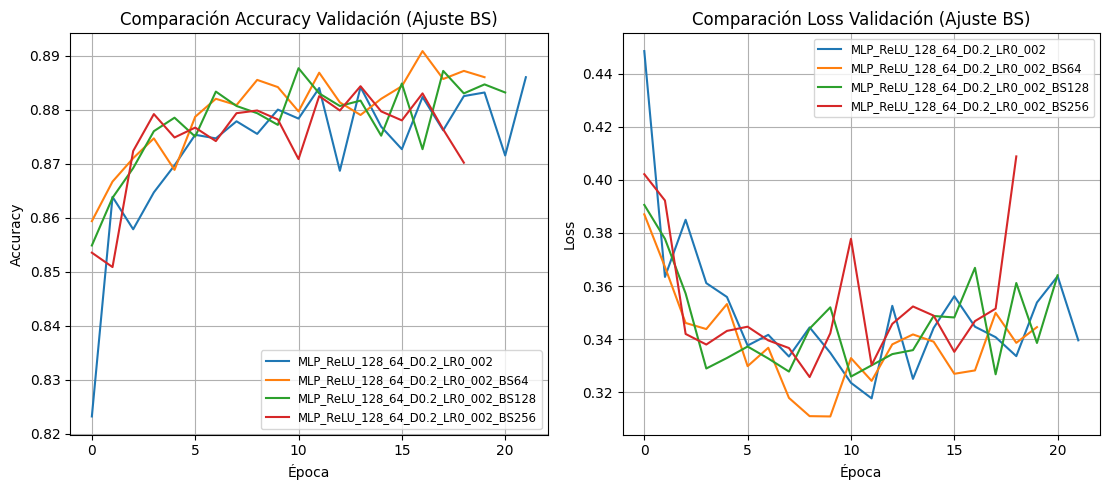


--- Análisis Final del Experimento de Ajuste de Batch Size ---

Mejor modelo encontrado hasta ahora (considerando LR y BS tuning): 'MLP_ReLU_128_64_D0.2_LR0_002' con Accuracy 0.879500

--- Próximo Paso ---
La configuración del mejor modelo hasta ahora se guarda en 'best_model_config_so_far'.
Se usará para futuros experimentos (ej: ajuste fino de Optimizador o más épocas/regularización).
Mejor configuración actual: {'name': 'MLP_ReLU_128_64_D0.2_LR0_002', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2, 'batch_norm': True, 'optimizer': 'adam', 'learning_rate': 0.002, 'batch_size': np.int64(128)}


In [25]:
# Assume the following variables are defined in previous cells:
# - x_train, y_train (training data, y_train might be one-hot)
# - x_test, y_test_labels (test data, y_test_labels should be integer labels)
# - input_shape_original (input shape of the data)
# - num_classes (number of output classes)
# - DEFAULT_EPOCHS, DEFAULT_BATCH_SIZE, DEFAULT_VALIDATION_SPLIT
# - create_flexible_mlp (your function to build the model)
# - evaluate_model (your function to evaluate and collect results)
# - best_model_config_so_far (variable holding the best config from the previous step, if successful)
# - experiment_histories_lr (history dict from the LR tuning step)
# - results_lr_df (results df from the LR tuning step)
import re

print("\n" + "="*60)
print("    INICIANDO EXPERIMENTO: AJUSTE DE BATCH SIZE + ES")
print("="*60)

# --- Función Helper para Configurar Semillas ---
def set_seeds(seed_value):
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    os.environ['TF_DETERMINISTIC_OPS'] = '1' # For TensorFlow ops determinism
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    # print(f"   Semillas fijadas a: {seed_value}") # Verbose can be distracting in loop

# --- Configuración Base Fija (La Mejor Hasta Ahora) ---
# Use the best config found from the previous step (LR tuning)
# Check if best_model_config_so_far exists and is valid
if 'best_model_config_so_far' in locals() and best_model_config_so_far:
    print("\n--- Usando la mejor configuración encontrada hasta ahora como base ---")
    config_base_bs_tune = best_model_config_so_far.copy()
    # The 'name' key in best_model_config_so_far should represent the best config up to LR tuning.
    # We will use this name as the base for appending the BS value.
    config_base_bs_tune['name_base_for_bs_tune'] = config_base_bs_tune['name']
    # Remove keys that are not fixed for THIS loop (like BS itself, which is varied)
    if 'batch_size' in config_base_bs_tune: del config_base_bs_tune['batch_size']
    # Ensure required keys exist (dropout, batch_norm, optimizer, learning_rate) - add defaults if missing
    if 'dropout' not in config_base_bs_tune: config_base_bs_tune['dropout'] = 0.0 # Assume no dropout if not specified
    if 'batch_norm' not in config_base_bs_tune: config_base_bs_tune['batch_norm'] = False # Assume no BN if not specified
    if 'optimizer' not in config_base_bs_tune: config_base_bs_tune['optimizer'] = 'adam' # Assume Adam if not specified
    if 'learning_rate' not in config_base_bs_tune: config_base_bs_tune['learning_rate'] = 0.001 # Assume default LR if not specified
    print(f"   Configuración Base: {config_base_bs_tune}")
else:
    print("\n--- Advertencia: 'best_model_config_so_far' no encontrada o vacía. Usando una configuración base por defecto. ---")
    # Define a default base config if the previous variable is not available
    config_base_bs_tune = {
        'name_base_for_bs_tune': 'MLP_ReLU_128_64_D0.2_BNTrue_LR0_001_DefaultBase', # Default base name
        'activation': 'relu',
        'neurons': [128, 64],
        'dropout': 0.2,           # Default Dropout
        'batch_norm': True,       # Default BN
        'learning_rate': 0.001,   # Default LR
        'optimizer': 'adam',      # Default Opt
    }
    print(f"   Configuración Base por Defecto: {config_base_bs_tune}")


# --- Batch Sizes a Probar ---
batch_sizes_to_test = [64, 128, 256] # Common batch sizes to test
experiment_results_bs = []
experiment_histories_bs = {}

# --- Definir Early Stopping ---
early_stopping_patience_bs = 10 # Keep patience consistent
early_stopping_cb_bs = EarlyStopping(
    monitor='val_loss', patience=early_stopping_patience_bs,
    restore_best_weights=True, verbose=1, mode='min'
)
print(f"--- EarlyStopping definido (patience={early_stopping_patience_bs}) ---")

# --- Bucle del Experimento de Ajuste Fino de Batch Size ---
print("\n--- Iniciando Bucle de Experimentos de Ajuste de Batch Size ---")
# Use different seeds for each BS to see variability, or the same seed for a more direct comparison
# Using different seeds is often better to see robustness, but for direct comparison of BS effect, same seed might be preferred.
# Let's use the same seed for a cleaner comparison of BS effect, as other params are fixed.
fixed_seed_for_bs_tune = 42 # Use a fixed seed for this loop
print(f"   Usando semilla fija {fixed_seed_for_bs_tune} para todos los tamaños de batch.")


for current_batch_size in batch_sizes_to_test:
    start_time_bs_exp = time.time()

    print(f"\n>>> Procesando Batch Size: {current_batch_size} <<<")

    # 1. Fijar Semillas y Limpiar Sesión
    set_seeds(fixed_seed_for_bs_tune) # Use the fixed seed
    keras.backend.clear_session()

    # Nombre único para este experimento y BS
    # Build name from the base config name + current BS
    model_name_bs_exp = f"{config_base_bs_tune['name_base_for_bs_tune']}_BS{current_batch_size}"

    # 2. Crear el modelo usando la config base
    model_bs_exp = create_flexible_mlp(
        model_name=model_name_bs_exp,
        hidden_activation=config_base_bs_tune['activation'],
        neurons_per_layer=config_base_bs_tune['neurons'],
        dropout_rate=config_base_bs_tune['dropout'],
        use_batch_norm=config_base_bs_tune['batch_norm'],
        input_shape_orig=input_shape_original,
        num_classes=num_classes
    )

    # 3. Compilar el modelo
    current_lr_bs = config_base_bs_tune['learning_rate']
    current_optimizer_name_bs = config_base_bs_tune['optimizer']
    if current_optimizer_name_bs.lower() == 'adam': optimizer_bs = keras.optimizers.Adam(learning_rate=current_lr_bs)
    elif current_optimizer_name_bs.lower() == 'sgd': optimizer_bs = keras.optimizers.SGD(learning_rate=current_lr_bs)
    else:
        print(f"ADVERTENCIA: Optimizador desconocido '{current_optimizer_name_bs}'. Usando Adam.")
        optimizer_bs = keras.optimizers.Adam(learning_rate=current_lr_bs)

    # Compilar with the correct loss (assuming y_train is integers or will be converted)
    loss_function_bs = "sparse_categorical_crossentropy"
    model_bs_exp.compile(loss=loss_function_bs, optimizer=optimizer_bs, metrics=["accuracy"])
    print(f"   Modelo '{model_bs_exp.name}' compilado (Loss: {loss_function_bs}, Opt: {current_optimizer_name_bs}, LR: {current_lr_bs}).")

    # 4. Entrenar el modelo con el BS actual
    max_epochs_bs = DEFAULT_EPOCHS # Use global max epochs
    print(f"\n--- Entrenando Modelo: {model_bs_exp.name} (max {max_epochs_bs} épocas, BS={current_batch_size}) ---")

    # --- FIX: Ensure y_train format for sparse_categorical_crossentropy ---
    # sparse_categorical_crossentropy expects integer labels: (samples,) or (samples, 1)
    # If y_train is one-hot encoded (samples, num_classes), it needs conversion.
    y_train_fit_bs = y_train # Start with the original

    # Check the format of y_train
    if y_train.ndim == 2 and y_train.shape[1] > 1:
        # Looks like one-hot encoded. Convert to integer labels.
        print(f"INFO: y_train has one-hot format {y_train.shape}. Converting to sparse (integer) labels for sparse_categorical_crossentropy.")
        import numpy as np
        y_train_fit_bs = np.argmax(y_train, axis=1)
        print(f"      New format for fit: {y_train_fit_bs.shape}")
    elif y_train.ndim == 2 and y_train.shape[1] == 1:
         # Format (samples, 1) - acceptable for sparse_categorical_crossentropy
         print(f"INFO: y_train has format (samples, 1) {y_train.shape}. Compatible with sparse_categorical_crossentropy.")
         y_train_fit_bs = y_train # Use as is
    elif y_train.ndim == 1:
         # Format (samples,) - ideal for sparse_categorical_crossentropy
         print(f"INFO: y_train has format (samples,) {y_train.shape}. Compatible with sparse_categorical_crossentropy.")
         y_train_fit_bs = y_train # Use as is
    else:
        # Unexpected format. Print warning and use as is (might fail)
        print(f"ADVERTENCIA: Unexpected y_train format {y_train.shape}. Attempting to use as is, but may cause errors with sparse_categorical_crossentropy.")
        y_train_fit_bs = y_train # Fallback

    # Now y_train_fit_bs should have the correct format for sparse_categorical_crossentropy

    history_bs_exp = model_bs_exp.fit(
        x_train, y_train_fit_bs, # <-- Use the potentially converted y_train
        batch_size=current_batch_size, # <-- USE THE CURRENT BATCH SIZE
        epochs=max_epochs_bs,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=0, # Set to 1 to see epoch progress
        callbacks=[early_stopping_cb_bs]
    )
    training_time_bs_exp = round(time.time() - start_time_bs_exp, 2)
    actual_epochs_run_bs = len(history_bs_exp.history['loss'])
    print(f"   Entrenamiento completado después de {actual_epochs_run_bs} épocas.")

    # 5. Evaluar
    # y_test_labels should be the integer labels (samples,) or (samples, 1)
    y_true_for_eval_bs = y_test_labels
    results_bs_exp = evaluate_model(model_bs_exp, x_test, y_true_for_eval_bs, y_test_labels, history_bs_exp, training_time_bs_exp)

    # 6. Guardar
    results_bs_exp['Actual Epochs'] = actual_epochs_run_bs
    results_bs_exp['Seed'] = fixed_seed_for_bs_tune # Save seed used
    results_bs_exp['Batch Size'] = current_batch_size # Add BS to results
    experiment_results_bs.append(results_bs_exp)
    experiment_histories_bs[model_name_bs_exp] = history_bs_exp.history

    print("-" * 50)

print("\n" + "="*60)
print("       AJUSTE FINO DE BATCH SIZE + ES COMPLETADO")
print("="*60)

# ---------------------------------------------------------------------------
# Sección de Comparación de Resultados del Ajuste Fino de Batch Size
# ---------------------------------------------------------------------------
print("\n--- Comparación: Ajuste Fino de Batch Size ---")

# Crear DataFrame con los nuevos resultados
results_bs_df = pd.DataFrame(experiment_results_bs)

# Añadir el mejor resultado del experimento ANTERIOR (el que define config_base_bs_tune) para comparar
# This is the result row corresponding to config_base_bs_tune['name_base_for_bs_tune']
best_previous_result = None
best_previous_name = config_base_bs_tune.get('name_base_for_bs_tune', 'Previous Best Model')

# Try to find the previous best result row from the results DataFrame where it was generated
# Assume it's in results_lr_df (if this cell ran after LR tuning) or results_fine_df (if ran after dropout tuning)
# Need to check which DataFrame is more likely to contain the best model name.
# Let's check results_lr_df first, as config_base_bs_tune should come from there.
if 'results_lr_df' in locals() and not results_lr_df.empty:
    prev_row = results_lr_df[results_lr_df['Model Name'] == best_previous_name]
    if not prev_row.empty:
        best_previous_result = prev_row.iloc[0].to_dict()
        # Need to add Batch Size to the previous result for consistent comparison columns
        if 'batch_size' not in best_previous_result:
             # Try to infer BS from name or config, or use default if unknown
             # If the name was generated like *_BS128, extract it. If not, assume default 128.
             bs_match = re.search(r'_BS(\d+)$', best_previous_name)
             if bs_match:
                 best_previous_result['Batch Size'] = int(bs_match.group(1))
             else:
                 # Assume it used the DEFAULT_BATCH_SIZE if not explicitly named BS
                 best_previous_result['Batch Size'] = DEFAULT_BATCH_SIZE
                 print(f"   INFO: Could not infer Batch Size for '{best_previous_name}'. Assuming DEFAULT_BATCH_SIZE ({DEFAULT_BATCH_SIZE}).")
        print(f"   Incluyendo resultado anterior '{best_previous_name}' (BS={best_previous_result['Batch Size']}) para comparación.")
        prev_best_bs_df = pd.DataFrame([best_previous_result])
        comparison_bs_df = pd.concat([prev_best_bs_df, results_bs_df], ignore_index=True)
    else:
        print(f"Advertencia: No se encontró el resultado anterior '{best_previous_name}' en 'results_lr_df' para comparar.")
        comparison_bs_df = results_bs_df # Only include current results
elif 'results_fine_df' in locals() and not results_fine_df.empty:
     # If LR tuning didn't happen, maybe the base config came from dropout tuning
     prev_row = results_fine_df[results_fine_df['Model Name'] == best_previous_name]
     if not prev_row.empty:
          best_previous_result = prev_row.iloc[0].to_dict()
          # Need to add Batch Size to the previous result for consistent comparison columns
          if 'batch_size' not in best_previous_result:
               # Assume it used the DEFAULT_BATCH_SIZE if not explicitly named BS
               best_previous_result['Batch Size'] = DEFAULT_BATCH_SIZE
               print(f"   INFO: Could not infer Batch Size for '{best_previous_name}'. Assuming DEFAULT_BATCH_SIZE ({DEFAULT_BATCH_SIZE}).")
          print(f"   Incluyendo resultado anterior '{best_previous_name}' (BS={best_previous_result['Batch Size']}) para comparación.")
          prev_best_bs_df = pd.DataFrame([best_previous_result])
          comparison_bs_df = pd.concat([prev_best_bs_df, results_bs_df], ignore_index=True)
     else:
         print(f"Advertencia: No se encontró el resultado anterior '{best_previous_name}' en 'results_fine_df' para comparar.")
         comparison_bs_df = results_bs_df # Only include current results
else:
    print(f"Advertencia: No se encontró un DataFrame de resultados anterior ('results_lr_df' o 'results_fine_df') para comparar.")
    comparison_bs_df = results_bs_df # Only include current results


# Display comparative table
if not comparison_bs_df.empty:
     if 'History' in comparison_bs_df.columns: comparison_bs_df = comparison_bs_df.drop(columns=['History'])
     # Sort by Accuracy descending
     comparison_bs_df_display = comparison_bs_df.sort_values(by='Accuracy', ascending=False)

     # Define desired column order, ensuring essential columns are present
     cols_order_bs = ['Model Name', 'Batch Size', 'Accuracy', 'Loss', 'F1-Score (Weighted)', 'Actual Epochs', 'Training Time (s)', 'Seed']
     # Filter for columns that actually exist in the DataFrame
     cols_existing_bs = [col for col in cols_order_bs if col in comparison_bs_df_display.columns]
     # Add any other columns that might exist but aren't in the desired order list
     cols_existing_bs.extend([col for col in comparison_bs_df_display.columns if col not in cols_existing_bs])
     comparison_bs_df_display = comparison_bs_df_display[cols_existing_bs]


     print("\nTabla Comparativa de Métricas (Ajuste Batch Size vs. Mejor Anterior):")
     pd.set_option('display.float_format', '{:.6f}'.format)
     display(comparison_bs_df_display)
     pd.reset_option('display.float_format')
else: print("No hay resultados para comparar.")


# --- Comparative Learning Curve Plots (Validation) ---
print("\nGráficos Comparativos de Curvas de Aprendizaje (Ajuste Batch Size - Validación):")
plt.figure(figsize=(14, 5))
histories_bs_to_plot = {}

# Add history of the previous best model if its history exists
# Check in experiment_histories_lr first, then experiment_histories_dropout_fine
hist_key_prev = config_base_bs_tune.get('name_base_for_bs_tune', None)
if hist_key_prev:
    if 'experiment_histories_lr' in locals() and hist_key_prev in experiment_histories_lr:
         histories_bs_to_plot[hist_key_prev] = experiment_histories_lr[hist_key_prev]
         print(f"   Incluyendo historial de '{hist_key_prev}' en gráficos.")
    elif 'experiment_histories_dropout_fine' in locals() and hist_key_prev in experiment_histories_dropout_fine:
         histories_bs_to_plot[hist_key_prev] = experiment_histories_dropout_fine[hist_key_prev]
         print(f"   Incluyendo historial de '{hist_key_prev}' en gráficos (desde dropout exp).")
    else:
         print(f"Advertencia: No se encontró historial para '{hist_key_prev}' en los diccionarios de historiales anteriores.")

histories_bs_to_plot.update(experiment_histories_bs) # Add the new histories from BS tuning

if histories_bs_to_plot:
     max_plots_legend_bs = 10 # Limit legend entries for readability
     # Accuracy plot
     plt.subplot(1, 2, 1)
     count_acc_bs = 0
     for name, h in histories_bs_to_plot.items():
         if h and 'val_accuracy' in h:
             plt.plot(h['val_accuracy'], label=name if count_acc_bs < max_plots_legend_bs else None)
             count_acc_bs += 1
     plt.title('Comparación Accuracy Validación (Ajuste BS)'); plt.xlabel('Época'); plt.ylabel('Accuracy')
     if count_acc_bs > 0 and count_acc_bs <= max_plots_legend_bs:
          # Move legend outside if many items
          if len(histories_bs_to_plot) > 5:
              plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
          else:
              plt.legend(loc='best', fontsize='small') # Or 'best' if few items
     plt.grid(True)

     # Loss plot
     plt.subplot(1, 2, 2)
     count_loss_bs = 0
     for name, h in histories_bs_to_plot.items():
         if h and 'val_loss' in h:
             plt.plot(h['val_loss'], label=name if count_loss_bs < max_plots_legend_bs else None)
             count_loss_bs += 1
     plt.title('Comparación Loss Validación (Ajuste BS)'); plt.xlabel('Época'); plt.ylabel('Loss')
     if count_loss_bs > 0 and count_loss_bs <= max_plots_legend_bs:
          # Move legend outside if many items
          if len(histories_bs_to_plot) > 5:
             plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
          else:
             plt.legend(loc='best', fontsize='small') # Or 'best' if few items
     plt.grid(True)

     plt.tight_layout(rect=[0, 0, 0.8, 1]) # Make room for legend
     plt.show()
else: print("No hay historiales válidos para graficar.")


# --- Final Analysis ---
print("\n--- Análisis Final del Experimento de Ajuste de Batch Size ---")
# Determine the overall best model after considering Batch Size tuning
overall_best_model_config = None
overall_best_model_result_row = None

if not comparison_bs_df.empty:
    # The comparison_bs_df now contains results from BS tuning and potentially the previous best.
    # Find the absolute best result in this combined DataFrame based on Accuracy.
    overall_best_model_result_row = comparison_bs_df.loc[comparison_bs_df['Accuracy'].idxmax()]
    overall_best_model_name = overall_best_model_result_row['Model Name']
    overall_best_accuracy = overall_best_model_result_row['Accuracy']

    print(f"\nMejor modelo encontrado hasta ahora (considerando LR y BS tuning): '{overall_best_model_name}' con Accuracy {overall_best_accuracy:.6f}")

    # Extract the configuration of this overall best model
    # Need to rebuild the config dictionary from the row data
    overall_best_model_config = {
        'name': overall_best_model_name,
        # Extract parameters from config_base_bs_tune (these were fixed)
        'activation': config_base_bs_tune.get('activation'),
        'neurons': config_base_bs_tune.get('neurons'),
        'dropout': config_base_bs_tune.get('dropout'),
        'batch_norm': config_base_bs_tune.get('batch_norm'),
        'optimizer': config_base_bs_tune.get('optimizer'),
        'learning_rate': config_base_bs_tune.get('learning_rate'), # LR is fixed for this BS loop
        'batch_size': overall_best_model_result_row['Batch Size'] # BS is from the best row
        # You might add 'seed' if relevant, but often the seed is for reproducibility of the *experiment run*,
        # not necessarily part of the *final model config* definition.
    }

    print("\n--- Próximo Paso ---")
    print("La configuración del mejor modelo hasta ahora se guarda en 'best_model_config_so_far'.")
    print("Se usará para futuros experimentos (ej: ajuste fino de Optimizador o más épocas/regularización).")
    print(f"Mejor configuración actual: {overall_best_model_config}")

    # Update the global best_model_config_so_far variable
    best_model_config_so_far = overall_best_model_config
    best_model_result_so_far = overall_best_model_result_row

else:
    print("No se ejecutaron experimentos de ajuste fino de Batch Size o comparación falló.")
    print("'best_model_config_so_far' mantiene el valor del paso anterior (si existía).")


# ---------------------------------------------------------------------------
# End of Batch Size Experiment Cell
# ===========================================================================

In [1]:
### hasta aca llegue refactorizando


--- Intentando cargar el modelo guardado: 'MLP_ReLU_128_64_D0.2_best_model_ES.keras' ---
   Modelo 'MLP_ReLU_128_64_D0.2' cargado exitosamente desde 'MLP_ReLU_128_64_D0.2_best_model_ES.keras'.

--- Buscando datos asociados para el modelo cargado: 'MLP_ReLU_128_64_D0.2' ---
  Buscando métricas en la variable DataFrame 'results_df'...
    -> No se encontraron métricas (tabla) para 'MLP_ReLU_128_64_D0.2' en 'results_df'.

  Buscando historial en la variable diccionario 'all_histories'...
    -> Historial encontrado para 'MLP_ReLU_128_64_D0.2'. Graficando curvas...


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


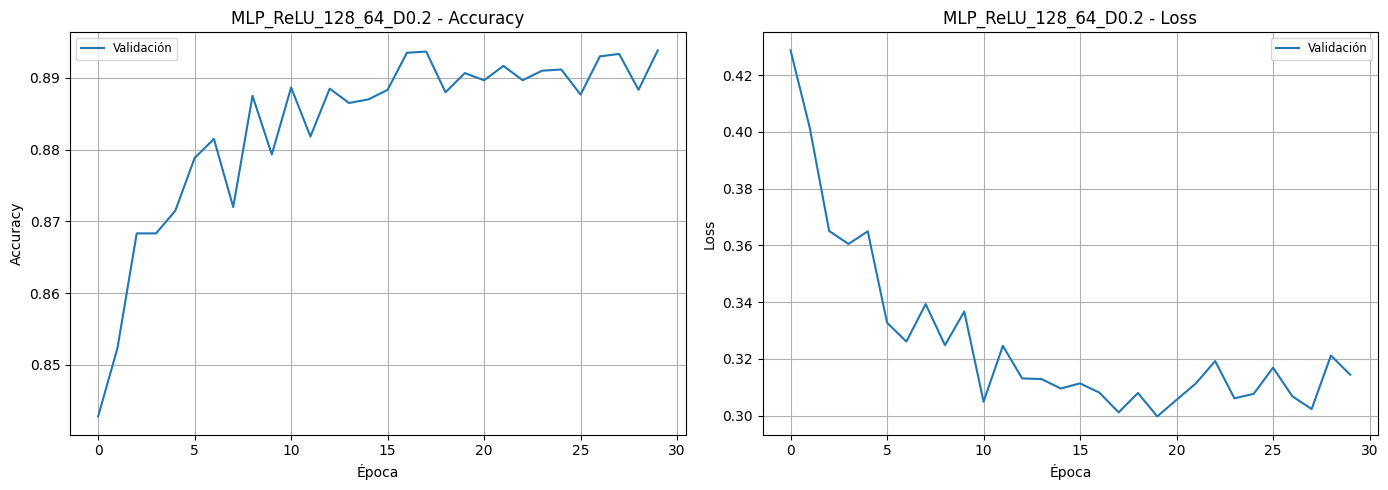


--- Generando Reporte de Clasificación para el modelo cargado: 'MLP_ReLU_128_64_D0.2' ---
  Realizando predicciones en x_test...
  Calculando reporte...
              precision    recall  f1-score   support

 T-shirt/top     0.8557    0.8360    0.8457      1000
     Trouser     0.9858    0.9720    0.9789      1000
    Pullover     0.7919    0.8220    0.8067      1000
       Dress     0.8775    0.8950    0.8861      1000
        Coat     0.8119    0.8030    0.8074      1000
      Sandal     0.9748    0.9660    0.9704      1000
       Shirt     0.7186    0.7150    0.7168      1000
     Sneaker     0.9491    0.9500    0.9495      1000
         Bag     0.9758    0.9670    0.9714      1000
  Ankle boot     0.9545    0.9660    0.9602      1000

    accuracy                         0.8892     10000
   macro avg     0.8896    0.8892    0.8893     10000
weighted avg     0.8896    0.8892    0.8893     10000


    PROCESO DE CARGA Y ANÁLISIS DEL MODELO GUARDADO COMPLETADO


In [44]:
# --- Define Fashion MNIST Class Labels (if not already defined globally) ---
# Ensure this dictionary exists in your environment. If not, define it here.
if 'class_labels_dict' not in locals():
    print("INFO: 'class_labels_dict' no encontrado, definiendo para Fashion MNIST.")
    class_labels_dict = {
        0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
        5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"
    }
    # Also ensure num_classes is defined if using this dict
    if 'num_classes' not in locals():
         num_classes = 10

# --- 1. Definir el nombre y ruta del archivo del modelo a cargar ---
target_model_name_to_load = 'MLP_ReLU_128_64_D0.2'
saved_model_filename = f"{target_model_name_to_load}_best_model_ES.keras"
print(f"\n--- Intentando cargar el modelo guardado: '{saved_model_filename}' ---")

# --- 2. Cargar el modelo desde el archivo ---
loaded_best_model = None
try:
    loaded_best_model = tf.keras.models.load_model(saved_model_filename)
    print(f"   Modelo '{loaded_best_model.name}' cargado exitosamente desde '{saved_model_filename}'.")
    # print("\nResumen del modelo cargado:") # Optional: Uncomment to see summary
    # loaded_best_model.summary()
except FileNotFoundError:
    print(f"   ERROR: El archivo '{saved_model_filename}' no se encontró.")
except Exception as e:
    print(f"   ERROR al cargar el modelo: {e}")

# --- 3. Buscar Métricas e Historial asociados al modelo cargado ---
# --- 4. Generar Reporte de Clasificación para el modelo cargado ---
if loaded_best_model is not None:
    model_name_loaded = loaded_best_model.name
    print(f"\n--- Buscando datos asociados para el modelo cargado: '{model_name_loaded}' ---")

    # --- Buscar Métricas Finales (Tabla) ---
    results_df_variable_name = 'results_df'
    print(f"  Buscando métricas en la variable DataFrame '{results_df_variable_name}'...")
    if results_df_variable_name in locals():
        results_df_test_harness = locals()[results_df_variable_name]
        if isinstance(results_df_test_harness, pd.DataFrame) and 'Model Name' in results_df_test_harness.columns:
            model_results_row = results_df_test_harness[results_df_test_harness['Model Name'] == model_name_loaded]
            if not model_results_row.empty:
                print(f"    -> Métricas de evaluación (tabla) encontradas para '{model_name_loaded}':")
                # Set pandas display format for this table
                pd.set_option('display.float_format', '{:.6f}'.format) # Display table metrics with 6 decimals
                display(model_results_row)
                pd.reset_option('display.float_format') # Reset to default
            else:
                print(f"    -> No se encontraron métricas (tabla) para '{model_name_loaded}' en '{results_df_variable_name}'.")
        else:
             print(f"    -> La variable '{results_df_variable_name}' no es un DataFrame válido o le falta 'Model Name'.")
    else:
        print(f"    -> ADVERTENCIA: DataFrame '{results_df_variable_name}' no encontrado. No se pueden mostrar métricas (tabla).")

    # --- Buscar Historial de Entrenamiento (Gráficos) ---
    histories_dict_variable_name = 'all_histories'
    print(f"\n  Buscando historial en la variable diccionario '{histories_dict_variable_name}'...")
    if histories_dict_variable_name in locals():
        histories_test_harness = locals()[histories_dict_variable_name]
        if isinstance(histories_test_harness, dict) and model_name_loaded in histories_test_harness:
            model_history = histories_test_harness[model_name_loaded]
            print(f"    -> Historial encontrado para '{model_name_loaded}'. Graficando curvas...")
            # (Código de graficación sin cambios)
            plt.figure(figsize=(14, 5))
            plt.subplot(1, 2, 1);
            if 'val_accuracy' in model_history: plt.plot(model_history['val_accuracy'], label='Validación')
            elif 'accuracy' in model_history: plt.plot(model_history['accuracy'], label='Entrenamiento')
            plt.title(f'{model_name_loaded} - Accuracy'); plt.xlabel('Época'); plt.ylabel('Accuracy')
            if 'val_accuracy' in model_history or 'accuracy' in model_history: plt.legend(loc='best', fontsize='small')
            plt.grid(True)
            plt.subplot(1, 2, 2);
            if 'val_loss' in model_history: plt.plot(model_history['val_loss'], label='Validación')
            elif 'loss' in model_history: plt.plot(model_history['loss'], label='Entrenamiento')
            plt.title(f'{model_name_loaded} - Loss'); plt.xlabel('Época'); plt.ylabel('Loss')
            if 'val_loss' in model_history or 'loss' in model_history: plt.legend(loc='best', fontsize='small')
            plt.grid(True)
            plt.tight_layout(); plt.show()
        else:
            print(f"    -> No se encontró historial para '{model_name_loaded}' en '{histories_dict_variable_name}'.")
    else:
        print(f"    -> ADVERTENCIA: Diccionario '{histories_dict_variable_name}' no encontrado. No se pueden mostrar curvas de aprendizaje.")

    # --- Generar Reporte de Clasificación ---
    print(f"\n--- Generando Reporte de Clasificación para el modelo cargado: '{model_name_loaded}' ---")
    # Necesitamos las predicciones del modelo cargado y las etiquetas verdaderas
    if 'x_test' in locals() and 'y_test_labels' in locals():
        print("  Realizando predicciones en x_test...")
        y_pred_prob = loaded_best_model.predict(x_test, verbose=0)
        y_pred_classes = np.argmax(y_pred_prob, axis=1)

        # Asegurar que y_test_labels y y_pred_classes sean arrays 1D para sklearn
        y_true_flat = np.array(y_test_labels).flatten()
        y_pred_flat = np.array(y_pred_classes).flatten()

        # Crear target_names usando class_labels_dict
        target_names = [class_labels_dict.get(i, f"Clase {i}") for i in range(num_classes)]
        print("  Calculando reporte...")

        # ============================================================ #
        # Imprimir el reporte con exactamente 4 dígitos decimales      #
        # ============================================================ #
        print(classification_report(y_true_flat, y_pred_flat, target_names=target_names, digits=4))
        # ============================================================ #

    else:
        print("  ERROR: No se encontraron las variables 'x_test' o 'y_test_labels' en memoria.")
        print("         No se puede generar el reporte de clasificación.")


else:
    print("\nNo se pudo cargar el modelo, por lo que no se buscarán sus datos asociados ni se generará reporte.")

print("\n" + "="*60)
print("    PROCESO DE CARGA Y ANÁLISIS DEL MODELO GUARDADO COMPLETADO")
print("="*60)

In [53]:
# ===========================================================================
# Celda Autocontenida: Evaluación de Modelo Guardado en Datos Aumentados "On-the-Fly"
# ** VERSIÓN CON CORRECCIÓN DE COMPILACIÓN DEL WRAPPER **
# ===========================================================================

import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report, precision_recall_fscore_support

print("\n" + "="*60)
print("    INICIANDO EVALUACIÓN AUTOCONTENIDA: Modelo Guardado sobre Datos Aumentados")
print("="*60)

# --- Paso 1: Definir Constantes, Nombres de Archivo y Etiquetas ---
print("--- Paso 1: Definiendo configuración ---")
TARGET_MODEL_NAME = 'MLP_ReLU_128_64_D0.2'
SAVED_MODEL_FILENAME = f"{TARGET_MODEL_NAME}_best_model_ES.keras"
NUM_CLASSES = 10
INPUT_SHAPE = (28, 28, 1)
CLASS_LABELS_DICT = {
    0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"
}
print(f"   Modelo objetivo: '{TARGET_MODEL_NAME}' (Archivo: '{SAVED_MODEL_FILENAME}')")
print(f"   Input Shape esperado: {INPUT_SHAPE}")
print(f"   Número de clases: {NUM_CLASSES}")

# --- Paso 2: Cargar el Modelo Guardado ---
print(f"\n--- Paso 2: Cargando modelo desde '{SAVED_MODEL_FILENAME}' ---")
loaded_model = None
try:
    # Al cargar, Keras a menudo reconstruye el estado de compilación si se guardó
    loaded_model = tf.keras.models.load_model(SAVED_MODEL_FILENAME)
    print(f"   Modelo '{loaded_model.name}' cargado exitosamente.")
    # loaded_model.summary()
except FileNotFoundError:
    print(f"   ¡ERROR FATAL! El archivo '{SAVED_MODEL_FILENAME}' no se encontró.")
    loaded_model = None
except Exception as e:
    print(f"   ¡ERROR FATAL! No se pudo cargar el modelo: {e}")
    loaded_model = None

# --- Paso 3: Cargar y Preprocesar Datos de Prueba ---
print("\n--- Paso 3: Cargando y preprocesando datos de prueba Fashion MNIST ---")
x_test_eval = None
y_test_labels_eval = None
data_ready = False
if loaded_model is not None:
    try:
        print("   Cargando dataset...")
        (_, _), (x_test_raw, y_test_raw) = fashion_mnist.load_data()
        y_test_labels_eval = y_test_raw.copy()
        x_test_eval = x_test_raw.astype("float32") / 255.0
        x_test_eval = np.expand_dims(x_test_eval, -1)
        print(f"   Datos de prueba cargados y procesados:")
        print(f"     x_test_eval shape: {x_test_eval.shape}")
        print(f"     y_test_labels_eval shape: {y_test_labels_eval.shape}")
        if x_test_eval.shape[1:] != INPUT_SHAPE:
           print(f"   ¡ADVERTENCIA DE FORMA! La forma procesada {x_test_eval.shape[1:]} no coincide con INPUT_SHAPE {INPUT_SHAPE}")
           data_ready = False
        else:
           data_ready = True
    except Exception as e:
        print(f"   ¡ERROR FATAL! No se pudieron cargar/procesar los datos de prueba: {e}")
        data_ready = False
else:
    print("   Saltando carga de datos porque el modelo no se cargó.")


# --- Continuar solo si el modelo y los datos están listos ---
if loaded_model is not None and data_ready:

    # --- Paso 4: Definir las Capas de Data Augmentation ---
    print("\n--- Paso 4: Definiendo Capas de Data Augmentation ---")
    data_augmentation_layer = keras.Sequential(
        [
            # No necesita InputLayer si la forma se infiere correctamente
            layers.RandomFlip("horizontal", input_shape=INPUT_SHAPE), # Especificar input_shape en la primera capa
            layers.RandomRotation(0.05),
            layers.RandomZoom(0.05),
        ],
        name="on_the_fly_augmentation"
    )
    print(f"   Capas definidas: {[(type(layer).__name__) for layer in data_augmentation_layer.layers]}")

    # --- Paso 5: Crear y Compilar el Modelo Wrapper ---
    print("\n--- Paso 5: Creando y Compilando el Modelo Wrapper ---")
    evaluation_wrapper_model = keras.Sequential(
        [
            data_augmentation_layer,
            loaded_model # El modelo cargado ya está compilado internamente
        ],
        name=f"EvalWrapper_{loaded_model.name}_WithAug"
    )
    print(f"   Wrapper '{evaluation_wrapper_model.name}' creado.")

    # Compilar el wrapper para poder usar .evaluate()
    # Usar la loss y métricas consistentes con el modelo original cargado
    wrapper_optimizer = tf.keras.optimizers.Adam() # El optimizador no se usará para actualizar pesos
    wrapper_loss = 'sparse_categorical_crossentropy' # Asume que el original usó esta
    wrapper_metrics = ['accuracy']
    evaluation_wrapper_model.compile(
        optimizer=wrapper_optimizer,
        loss=wrapper_loss,
        metrics=wrapper_metrics
    )
    print(f"   Wrapper compilado con loss='{wrapper_loss}' y metrics={wrapper_metrics}.")


    # --- Paso 6: Evaluar el Modelo Cargado con Entradas Aumentadas ---
    print(f"\n--- Paso 6: Evaluando '{loaded_model.name}' usando el Wrapper con datos aumentados ---")
    try:
        # Ahora .evaluate() debería funcionar en el wrapper compilado
        loss_aug, accuracy_aug = evaluation_wrapper_model.evaluate(
            x_test_eval,
            y_test_labels_eval, # Usar etiquetas enteras
            verbose=0
        )
        print(f"\n--- Resultados de Evaluación (Aug. on-the-fly) ---")
        print(f"Pérdida en Test (Augmented): {loss_aug:.4f}")
        print(f"Precisión en Test (Augmented): {accuracy_aug:.4f}")

        # --- Paso 7: Generar Reporte de Clasificación Detallado ---
        # .predict() usualmente no requiere compilación, pero es bueno tener el modelo compilado
        print(f"\n--- Paso 7: Generando Reporte de Clasificación (Aug. on-the-fly) ---")
        print("  Realizando predicciones (con aumentación)...")
        y_pred_prob_aug = evaluation_wrapper_model.predict(x_test_eval, verbose=0)
        y_pred_classes_aug = np.argmax(y_pred_prob_aug, axis=1)

        y_true_flat = np.array(y_test_labels_eval).flatten()
        y_pred_flat_aug = np.array(y_pred_classes_aug).flatten()

        target_names = [CLASS_LABELS_DICT.get(i, f"Clase {i}") for i in range(NUM_CLASSES)]
        print("  Calculando reporte...")

        # Imprimir el reporte con 4 dígitos decimales
        print(classification_report(y_true_flat, y_pred_flat_aug, target_names=target_names, digits=4))

    except Exception as e:
        print(f"\nERROR durante la evaluación o generación del reporte con aumentación:")
        print(f"   {e}")
        print(f"   Verifica formas: x_test_eval={x_test_eval.shape}, y_test_labels_eval={y_test_labels_eval.shape}, INPUT_SHAPE={INPUT_SHAPE}")

else:
    print("\nNo se puede proceder con la evaluación. Verifica los errores en los pasos anteriores (carga de modelo o datos).")

print("\n" + "="*60); print("       EVALUACIÓN AUTOCONTENIDA FINALIZADA"); print("="*60)
# ---------------------------------------------------------------------------


    INICIANDO EVALUACIÓN AUTOCONTENIDA: Modelo Guardado sobre Datos Aumentados
--- Paso 1: Definiendo configuración ---
   Modelo objetivo: 'MLP_ReLU_128_64_D0.2' (Archivo: 'MLP_ReLU_128_64_D0.2_best_model_ES.keras')
   Input Shape esperado: (28, 28, 1)
   Número de clases: 10

--- Paso 2: Cargando modelo desde 'MLP_ReLU_128_64_D0.2_best_model_ES.keras' ---
   Modelo 'MLP_ReLU_128_64_D0.2' cargado exitosamente.

--- Paso 3: Cargando y preprocesando datos de prueba Fashion MNIST ---
   Cargando dataset...
   Datos de prueba cargados y procesados:
     x_test_eval shape: (10000, 28, 28, 1)
     y_test_labels_eval shape: (10000,)

--- Paso 4: Definiendo Capas de Data Augmentation ---
   Capas definidas: ['RandomFlip', 'RandomRotation', 'RandomZoom']

--- Paso 5: Creando y Compilando el Modelo Wrapper ---
   Wrapper 'EvalWrapper_MLP_ReLU_128_64_D0.2_WithAug' creado.
   Wrapper compilado con loss='sparse_categorical_crossentropy' y metrics=['accuracy'].

--- Paso 6: Evaluando 'MLP_ReLU_128

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Resultados de Evaluación (Aug. on-the-fly) ---
Pérdida en Test (Augmented): 0.3267
Precisión en Test (Augmented): 0.8892

--- Paso 7: Generando Reporte de Clasificación (Aug. on-the-fly) ---
  Realizando predicciones (con aumentación)...
  Calculando reporte...
              precision    recall  f1-score   support

 T-shirt/top     0.8557    0.8360    0.8457      1000
     Trouser     0.9858    0.9720    0.9789      1000
    Pullover     0.7919    0.8220    0.8067      1000
       Dress     0.8775    0.8950    0.8861      1000
        Coat     0.8119    0.8030    0.8074      1000
      Sandal     0.9748    0.9660    0.9704      1000
       Shirt     0.7186    0.7150    0.7168      1000
     Sneaker     0.9491    0.9500    0.9495      1000
         Bag     0.9758    0.9670    0.9714      1000
  Ankle boot     0.9545    0.9660    0.9602      1000

    accuracy                         0.8892     10000
   macro avg     0.8896    0.8892    0.8893     10000
weighted avg     0.8896    0.


   TABLA CONSOLIDADA, GRÁFICOS Y SELECCIÓN FINAL
Recopilando resultados de todos los experimentos...
- Añadiendo 14 resultados del Test Harness principal.
Total de resultados recopilados (antes de duplicados): 23

Creando tabla final con 23 resultados únicos...

--- TABLA FINAL CONSOLIDADA (Ordenada por F1-Score (Weighted)) ---


,Model Name,Loss,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted),Training Time (s),Actual Epochs,Seed,Dropout
0,MLP_ReLU_128_64_D0.2,0.326703,0.8892,0.889552,0.8892,0.889312,84.35,30,NaN,NaN
1,MLP_ReLU_128_64_D0.2_FineTuneD0.3,0.332570,0.8874,0.887534,0.8874,0.887450,129.22,43,82.0,0.30
2,MLP_ReLU_128_64_D0.2_FineTuneD0.1,0.336057,0.8859,0.886080,0.8859,0.885485,82.23,29,42.0,0.10
3,MLP_ReLU_128_64_D0.2_FineTuneD0.35,0.341915,0.8854,0.886120,0.8854,0.885247,123.23,46,92.0,0.35
4,MLP_ReLU_128_D0.5,0.337932,0.8849,0.885688,0.8849,0.884780,114.11,42,NaN,NaN
5,MLP_ReLU_128_64_BN_D0.5,0.333534,0.8831,0.883103,0.8831,0.882322,172.49,55,NaN,NaN
6,MLP_ReLU_256_128_D0.5,0.330003,0.8827,0.883173,0.8827,0.882309,203.04,46,NaN,NaN
7,MLP_ReLU_128_64_D0.0,0.333863,0.8824,0.882828,0.8824,0.882155,64.48,20,NaN,NaN
8,MLP_Sigmoid_128_64_D0.5,0.333223,0.8831,0.882460,0.8831,0.882139,254.81,91,NaN,NaN
9,MLP_ReLU_128_64_D0.2_FineTuneD0.2,0.335131,0.8825,0.881756,0.8825,0.881558,71.96,23,62.0,0.20



--- Gráficos Resumen Comparativos (Todos los Modelos) ---


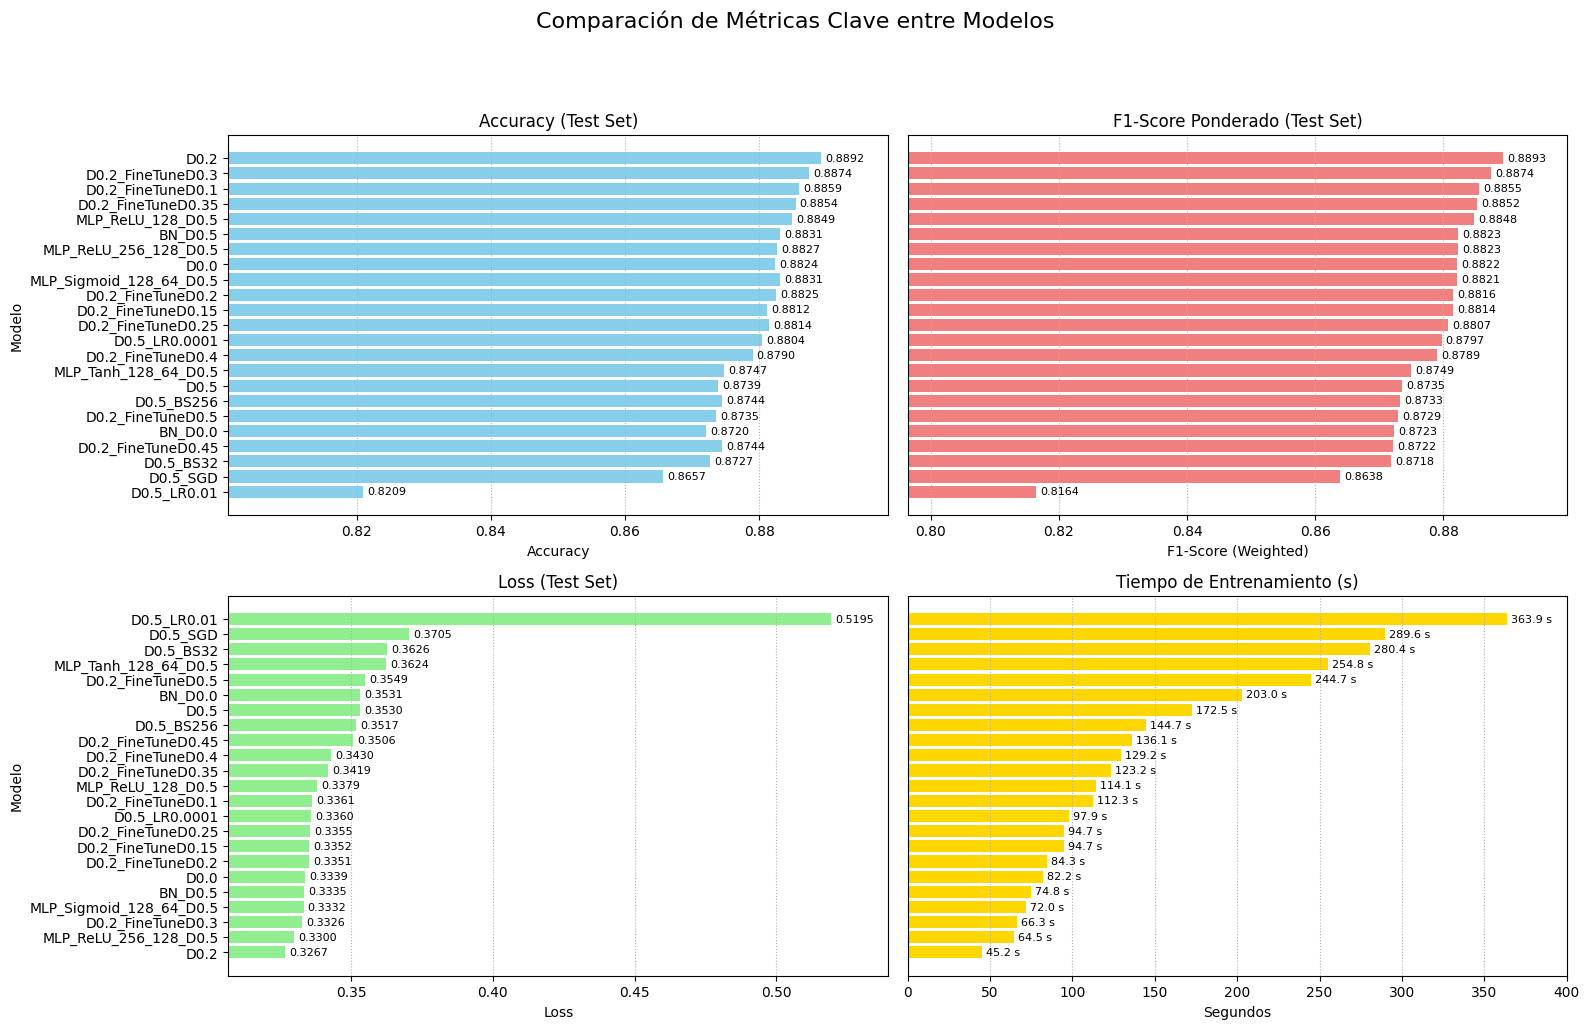


--- Selección del Mejor Modelo ---

==> MEJOR MODELO SELECCIONADO (basado en mayor F1-Score (Weighted)): 'MLP_ReLU_128_64_D0.2' <==
    Accuracy: 0.8892
    F1-Score (W): 0.8893
    Precision (W): 0.8896
    Recall (W): 0.8892

--- Métricas Principales del Modelo Ganador: MLP_ReLU_128_64_D0.2 ---


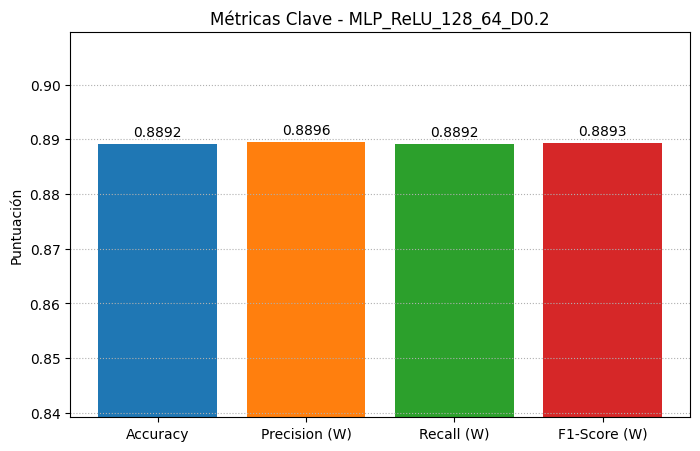


Próximos Pasos:
1. Documentar el análisis completo y justificar la elección de 'MLP_ReLU_128_64_D0.2'.
2. Generar y analizar el Reporte de Clasificación detallado (por clase) para 'MLP_ReLU_128_64_D0.2'.
3. (Opcional) Recrear y guardar el modelo 'MLP_ReLU_128_64_D0.2' entrenado hasta su mejor época.
------------------------------------------------------------


In [54]:
# ===========================================================================
# ASUNCIONES ANTES DE EJECUTAR ESTA CELDA:
# 1. Todos los experimentos anteriores se han ejecutado.
# 2. Las listas/dicts con resultados existen: all_results (del harness inicial),
#    results_adjusted (opcional), experiment_results_dropout_fine (opcional),
#    final_experiment_results (opcional), results_aug_exp (opcional).
# 3. El diccionario all_histories contiene los historiales.
# 4. Las variables DEFAULT_*, CLASS_NAMES están definidas.
# 5. Pandas (pd), Matplotlib (plt), NumPy (np), display están importados.
# ===========================================================================

# ---------------------------------------------------------------------------
# Sección Final: Tabla Consolidada, Gráficos Comparativos y Selección Final
# ---------------------------------------------------------------------------
print("\n" + "="*60)
print("   TABLA CONSOLIDADA, GRÁFICOS Y SELECCIÓN FINAL")
print("="*60)

# --- Recopilar todos los diccionarios de resultados ---
consolidated_results_list = []
print("Recopilando resultados de todos los experimentos...")
# 1. Harness Principal
if 'all_results' in locals() and isinstance(all_results, list):
    print(f"- Añadiendo {len(all_results)} resultados del Test Harness principal.")
    consolidated_results_list.extend(all_results)
# 2. Modelo Ajustado sin Dropout
if 'results_adjusted' in locals() and isinstance(results_adjusted, dict):
     if not any(d.get('Model Name') == results_adjusted.get('Model Name') for d in consolidated_results_list):
        consolidated_results_list.append(results_adjusted)
# 3. Ajuste Fino Dropout
if 'experiment_results_dropout_fine' in locals() and isinstance(experiment_results_dropout_fine, list):
    for res_fine in experiment_results_dropout_fine:
         if not any(d.get('Model Name') == res_fine.get('Model Name') for d in consolidated_results_list): consolidated_results_list.append(res_fine)
# 4. Experimentos Finales (BN/LR)
if 'final_experiment_results' in locals() and isinstance(final_experiment_results, list):
    for res_final_exp in final_experiment_results:
         if not any(d.get('Model Name') == res_final_exp.get('Model Name') for d in consolidated_results_list): consolidated_results_list.append(res_final_exp)
# 5. Experimento Augmentation
if 'results_aug_exp' in locals() and isinstance(results_aug_exp, dict):
     if not any(d.get('Model Name') == results_aug_exp.get('Model Name') for d in consolidated_results_list): consolidated_results_list.append(results_aug_exp)

print(f"Total de resultados recopilados (antes de duplicados): {len(consolidated_results_list)}")

# --- Crear y Mostrar DataFrame Consolidado ---
if consolidated_results_list:
    final_consolidated_df = pd.DataFrame(consolidated_results_list)
    # Eliminar duplicados si los hubiera (basado en nombre)
    final_consolidated_df = final_consolidated_df.drop_duplicates(subset=['Model Name'], keep='last').reset_index(drop=True)
    print(f"\nCreando tabla final con {len(final_consolidated_df)} resultados únicos...")

    # Limpiar y ordenar
    final_consolidated_df_display = final_consolidated_df.drop(columns=['History'], errors='ignore')
    sort_metric = 'F1-Score (Weighted)'
    if sort_metric not in final_consolidated_df_display.columns: sort_metric = 'Accuracy'
    final_consolidated_df_display = final_consolidated_df_display.sort_values(by=sort_metric, ascending=False).reset_index(drop=True)

    pd.set_option('display.max_rows', 50); pd.set_option('display.max_columns', None); pd.set_option('display.width', 1000)

    print(f"\n--- TABLA FINAL CONSOLIDADA (Ordenada por {sort_metric}) ---")
    display(final_consolidated_df_display)

    # --- Gráficos Comparativos de Métricas Clave (4 Gráficos) ---
    print("\n--- Gráficos Resumen Comparativos (Todos los Modelos) ---")
    df_plot = final_consolidated_df_display.copy()
    df_plot['Short Name'] = df_plot['Model Name'].str.replace('MLP_ReLU_128_64_', '', regex=False).str.replace('_ES_FineTune',' (FT)', regex=False).str.replace('_ES','') # Acortar nombres
    df_plot_sorted_f1 = df_plot.sort_values(by=sort_metric, ascending=True) # Ordenar ascendente para F1/Acc

    plt.figure(figsize=(16, max(8, len(df_plot)*0.45))) # Ajustar tamaño
    plt.suptitle('Comparación de Métricas Clave entre Modelos', fontsize=16, y=1.02)

    # Gráfico 1: Accuracy
    plt.subplot(2, 2, 1)
    bars_acc = plt.barh(df_plot_sorted_f1['Short Name'], df_plot_sorted_f1['Accuracy'], color='skyblue')
    plt.title('Accuracy (Test Set)')
    plt.xlabel('Accuracy')
    plt.ylabel('Modelo')
    min_acc = df_plot_sorted_f1['Accuracy'].min()
    max_acc = df_plot_sorted_f1['Accuracy'].max()
    plt.xlim(left=max(0, min_acc - 0.02), right=max_acc + 0.01)
    plt.grid(True, axis='x', linestyle=':')
    plt.bar_label(bars_acc, fmt='%.4f', padding=3, fontsize=8)

    # Gráfico 2: F1-Score Ponderado
    plt.subplot(2, 2, 2)
    bars_f1 = plt.barh(df_plot_sorted_f1['Short Name'], df_plot_sorted_f1['F1-Score (Weighted)'], color='lightcoral')
    plt.title('F1-Score Ponderado (Test Set)')
    plt.xlabel('F1-Score (Weighted)')
    plt.yticks([]) # Ocultar Y labels
    min_f1 = df_plot_sorted_f1['F1-Score (Weighted)'].min()
    max_f1 = df_plot_sorted_f1['F1-Score (Weighted)'].max()
    plt.xlim(left=max(0, min_f1 - 0.02), right=max_f1 + 0.01)
    plt.grid(True, axis='x', linestyle=':')
    plt.bar_label(bars_f1, fmt='%.4f', padding=3, fontsize=8)

    # Gráfico 3: Loss
    df_plot_loss = df_plot.sort_values(by='Loss', ascending=True) # Ordenar por Loss
    plt.subplot(2, 2, 3)
    bars_loss = plt.barh(df_plot_loss['Short Name'], df_plot_loss['Loss'], color='lightgreen')
    plt.title('Loss (Test Set)')
    plt.xlabel('Loss')
    plt.ylabel('Modelo')
    min_loss = df_plot_loss['Loss'].min()
    max_loss = df_plot_loss['Loss'].max()
    plt.xlim(left=max(0, min_loss - 0.02), right=max_loss + 0.02)
    plt.grid(True, axis='x', linestyle=':')
    plt.bar_label(bars_loss, fmt='%.4f', padding=3, fontsize=8)

    # Gráfico 4: Tiempo de Entrenamiento
    df_plot_time = df_plot.sort_values(by='Training Time (s)', ascending=True) # Ordenar por Tiempo
    plt.subplot(2, 2, 4)
    bars_time = plt.barh(df_plot_time['Short Name'], df_plot_time['Training Time (s)'], color='gold')
    plt.title('Tiempo de Entrenamiento (s)')
    plt.xlabel('Segundos')
    plt.yticks([]) # Ocultar Y labels
    plt.xlim(left=0, right=max(df_plot_time['Training Time (s)']) * 1.1)
    plt.grid(True, axis='x', linestyle=':')
    plt.bar_label(bars_time, fmt='%.1f s', padding=3, fontsize=8)

    plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Ajustar rect
    plt.show()

    # --- Selección Programática del Mejor Modelo ---
    print("\n--- Selección del Mejor Modelo ---")
    # Encontrar fila con el mayor F1-Score (o Accuracy si F1 no existe)
    best_model_row = final_consolidated_df_display.loc[final_consolidated_df_display[sort_metric].idxmax()]
    best_model_name_final = best_model_row['Model Name']
    best_f1_final = best_model_row['F1-Score (Weighted)']
    best_acc_final = best_model_row['Accuracy']
    best_prec_final = best_model_row['Precision (Weighted)']
    best_recall_final = best_model_row['Recall (Weighted)']

    print(f"\n==> MEJOR MODELO SELECCIONADO (basado en mayor {sort_metric}): '{best_model_name_final}' <==")
    print(f"    Accuracy: {best_acc_final:.4f}")
    print(f"    F1-Score (W): {best_f1_final:.4f}")
    print(f"    Precision (W): {best_prec_final:.4f}")
    print(f"    Recall (W): {best_recall_final:.4f}")

    # --- Gráfico de Métricas del Mejor Modelo ---
    print(f"\n--- Métricas Principales del Modelo Ganador: {best_model_name_final} ---")
    metrics_names = ['Accuracy', 'Precision (W)', 'Recall (W)', 'F1-Score (W)']
    metrics_values = [best_acc_final, best_prec_final, best_recall_final, best_f1_final]
    plt.figure(figsize=(8, 5))
    bars_winner = plt.bar(metrics_names, metrics_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    plt.title(f'Métricas Clave - {best_model_name_final}')
    plt.ylabel('Puntuación')
    min_metric_val = min(metrics_values)
    max_metric_val = max(metrics_values)
    plt.ylim(bottom=max(0, min_metric_val - 0.05), top=max_metric_val + 0.02)
    plt.grid(True, axis='y', linestyle=':')
    plt.bar_label(bars_winner, fmt='%.4f', padding=3)
    plt.show()

    # --- Siguientes Pasos (Documentación, Reporte Detallado) ---
    print("\nPróximos Pasos:")
    print(f"1. Documentar el análisis completo y justificar la elección de '{best_model_name_final}'.")
    print(f"2. Generar y analizar el Reporte de Clasificación detallado (por clase) para '{best_model_name_final}'.")
    print(f"3. (Opcional) Recrear y guardar el modelo '{best_model_name_final}' entrenado hasta su mejor época.")

else:
    print("\nNo se pudieron recopilar resultados para generar la tabla o gráficos consolidados.")

print("-" * 60)
# ===========================================================================
# Fin de la Sección de Consolidación y Análisis Final
# ===========================================================================

In [58]:
# ===========================================================================
# Celda Autocontenida: Re-Entrenamiento Final + Comparación con Original
# ** VERSIÓN CON RECOMPILACIÓN DEL MODELO ORIGINAL CARGADO **
# ===========================================================================

print("\n" + "="*60)
print("    INICIANDO RE-ENTRENAMIENTO FINAL Y COMPARACIÓN")
print("="*60)

# --- Paso 1: Configuración del Mejor Modelo y Parámetros Finales ---
print("--- Paso 1: Definiendo configuración del mejor modelo y parámetros finales ---")
BEST_MODEL_CONFIG = {
    'name_base': 'MLP_ReLU_128_64_D0.2',
    'activation': 'relu',
    'neurons': [128, 64],
    'dropout': 0.2,
    'batch_norm': False,
    'optimizer_name': 'adam',
    'learning_rate': 0.001,
    'batch_size': 128,
    'l2_factor': 0
}
FINAL_EPOCHS = 30
FINAL_MODEL_SUFFIX = "_final_model"
ORIGINAL_BEST_MODEL_SUFFIX = "_best_model_ES"
SEED_VALUE = 42
NUM_CLASSES = 10
INPUT_SHAPE_MLP = (28, 28)
print(f"   Configuración Base: {BEST_MODEL_CONFIG['name_base']}")
print(f"   Épocas Finales Fijas: {FINAL_EPOCHS}")
print(f"   Semilla: {SEED_VALUE}")

# --- Paso 2: Configurar Semillas ---
print("\n--- Paso 2: Configurando Semillas ---")
os.environ['PYTHONHASHSEED'] = str(SEED_VALUE)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
print(f"   Semillas fijadas a {SEED_VALUE}.")

# --- Paso 3: Cargar y Preparar Datos COMPLETOS de Entrenamiento y Prueba ---
print("\n--- Paso 3: Cargando y preparando datos COMPLETOS ---")
try:
    (x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()
    y_test_labels_final = y_test.copy()
    x_train_full = x_train_full.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    print("   Datos cargados y normalizados.")
    print(f"     x_train_full shape: {x_train_full.shape}")
    print(f"     y_train_full shape: {y_train_full.shape}")
    print(f"     x_test shape: {x_test.shape}")
    print(f"     y_test_labels_final shape: {y_test_labels_final.shape}")
    data_ready = True
except Exception as e:
    print(f"   ¡ERROR FATAL! No se pudieron cargar/procesar los datos: {e}")
    data_ready = False

# --- Paso 4: Crear y Compilar el Modelo FINAL ---
final_model = None
if data_ready:
    print("\n--- Paso 4: Creando y Compilando el Modelo FINAL ---")
    final_model_name = f"{BEST_MODEL_CONFIG['name_base']}{FINAL_MODEL_SUFFIX}"
    print(f"   Nombre del modelo final: {final_model_name}")
    final_model = keras.Sequential(name=final_model_name)
    final_model.add(layers.Flatten(input_shape=INPUT_SHAPE_MLP))
    for i, neurons in enumerate(BEST_MODEL_CONFIG['neurons']):
        layer_name = f"hidden_{i+1}"; bn_name = f"bn_{i+1}"; dropout_name = f"dropout_{i+1}"
        regularizer = l2(BEST_MODEL_CONFIG['l2_factor']) if BEST_MODEL_CONFIG['l2_factor'] else None
        final_model.add(layers.Dense(neurons, name=layer_name, use_bias=not BEST_MODEL_CONFIG['batch_norm'], kernel_regularizer=regularizer))
        if BEST_MODEL_CONFIG['batch_norm']: final_model.add(layers.BatchNormalization(name=bn_name))
        final_model.add(layers.Activation(BEST_MODEL_CONFIG['activation'], name=f"{layer_name}_activation"))
        if BEST_MODEL_CONFIG['dropout'] > 0: final_model.add(layers.Dropout(BEST_MODEL_CONFIG['dropout'], name=dropout_name))
    final_model.add(layers.Dense(NUM_CLASSES, activation="softmax", name="output"))
    if BEST_MODEL_CONFIG['optimizer_name'].lower() == 'adam': optimizer = keras.optimizers.Adam(learning_rate=BEST_MODEL_CONFIG['learning_rate'])
    elif BEST_MODEL_CONFIG['optimizer_name'].lower() == 'sgd': optimizer = keras.optimizers.SGD(learning_rate=BEST_MODEL_CONFIG['learning_rate'])
    else: optimizer = keras.optimizers.Adam(learning_rate=BEST_MODEL_CONFIG['learning_rate'])
    final_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print(f"   Modelo '{final_model.name}' creado y compilado.")
    # final_model.summary()

# --- Paso 5: Entrenar el Modelo FINAL en Datos Completos ---
history_final = None
if final_model is not None:
    print(f"\n--- Paso 5: Entrenando modelo FINAL por {FINAL_EPOCHS} épocas en datos completos ---")
    history_final = final_model.fit(x_train_full, y_train_full, batch_size=BEST_MODEL_CONFIG['batch_size'],
                                    epochs=FINAL_EPOCHS, verbose=1, shuffle=True)
    print("   Re-entrenamiento final completado.")

# --- Paso 6: Evaluar el Modelo FINAL en el Conjunto de Prueba ---
final_model_results = {}
if final_model is not None:
    print("\n--- Paso 6: Evaluando el modelo FINAL en el conjunto de prueba ---")
    loss_final, accuracy_final = final_model.evaluate(x_test, y_test_labels_final, verbose=0)
    print(f"\n--- Resultados del Modelo FINAL ({final_model.name}) ---")
    print(f"Pérdida en Test: {loss_final:.4f}")
    print(f"Precisión en Test: {accuracy_final:.4f}")
    final_model_results = {'Model': final_model.name, 'Loss': loss_final, 'Accuracy': accuracy_final}
    # (Opcional: Generar reporte de clasificación)

# --- Paso 7: Guardar el Modelo FINAL ---
final_model_filename = None
if final_model is not None:
    print("\n--- Paso 7: Guardando el modelo FINAL entrenado ---")
    final_model_filename = f"{final_model.name}.keras"
    print(f"   Guardando en: '{final_model_filename}'")
    try:
        final_model.save(final_model_filename)
        print(f"   Modelo '{final_model_filename}' guardado exitosamente.")
    except Exception as e:
        print(f"   ERROR al guardar el modelo final: {e}")

# ===========================================================================
# Sección 8: Comparación Visual entre Modelo Original (ES) y Modelo Final
# ===========================================================================
print("\n" + "="*60); print("       COMPARACIÓN FINAL: Modelo Original vs Modelo Re-entrenado"); print("="*60)

# --- Paso 8a: Cargar el Modelo ORIGINAL guardado ---
original_model_filename = f"{BEST_MODEL_CONFIG['name_base']}{ORIGINAL_BEST_MODEL_SUFFIX}.keras"
print(f"\n--- Paso 8a: Cargando modelo ORIGINAL desde '{original_model_filename}' ---")
original_model = None
try:
    original_model = tf.keras.models.load_model(original_model_filename)
    print(f"   Modelo ORIGINAL '{original_model.name}' cargado exitosamente.")
except FileNotFoundError:
    print(f"   ¡ERROR! No se encontró el archivo del modelo original '{original_model_filename}'. No se puede comparar.")
except Exception as e:
    print(f"   ¡ERROR! No se pudo cargar el modelo original: {e}")

# --- Paso 8b: Re-Compilar y Evaluar el Modelo ORIGINAL ---
original_model_results = {}
if original_model is not None and data_ready:
    print(f"\n--- Paso 8b: Re-Compilando y Evaluando el modelo ORIGINAL ({original_model.name}) ---")

    # --- RE-COMPILACIÓN ---
    # Necesitamos recompilar para asegurar que use la loss correcta para evaluate
    # El optimizador aquí no importa mucho, ya que solo evaluamos
    print(f"   Re-compilando '{original_model.name}' con loss='sparse_categorical_crossentropy'...")
    original_optimizer_dummy = tf.keras.optimizers.Adam() # Optimizador temporal
    original_model.compile(optimizer=original_optimizer_dummy,
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
    # --------------------

    # Ahora evaluar con las etiquetas enteras
    loss_orig, accuracy_orig = original_model.evaluate(x_test, y_test_labels_final, verbose=0)
    print(f"   Resultados del Modelo ORIGINAL:")
    print(f"     Pérdida en Test: {loss_orig:.4f}")
    print(f"     Precisión en Test: {accuracy_orig:.4f}")
    original_model_results = {'Model': original_model.name, 'Loss': loss_orig, 'Accuracy': accuracy_orig}

    # (Opcional: Generar reporte de clasificación para el original)

elif not data_ready:
     print("\n   No se pueden evaluar modelos porque los datos de prueba no están listos.")
elif original_model is None:
     print("\n   No se puede evaluar el modelo original porque no se cargó correctamente.")


# --- Paso 8c: Crear y Mostrar Tabla Comparativa ---
print("\n--- Paso 8c: Tabla Comparativa de Métricas ---")
comparison_list = []
if original_model_results: comparison_list.append(original_model_results)
if final_model_results: comparison_list.append(final_model_results)

if len(comparison_list) == 2:
    comparison_df = pd.DataFrame(comparison_list)
    comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
    print("Comparación Directa (Ordenada por Accuracy):")
    pd.set_option('display.float_format', '{:.4f}'.format)
    display(comparison_df)
    pd.reset_option('display.float_format')

    # --- Decisión Final Basada en la Comparación ---
    winner = comparison_df.iloc[0]['Model']
    loser = comparison_df.iloc[1]['Model']
    print(f"\n--- Decisión Final ---")
    print(f"El modelo '{winner}' obtuvo una mejor Accuracy ({comparison_df.iloc[0]['Accuracy']:.4f}) en el conjunto de prueba.")
    print(f"Se recomienda usar el archivo correspondiente a '{winner}'.") # Mensaje más genérico

elif len(comparison_list) == 1:
    print("Solo se pudieron obtener resultados para un modelo. No se puede hacer comparación directa.")
    display(pd.DataFrame(comparison_list))
else:
    print("No se pudieron obtener resultados para ninguno de los modelos para comparar.")

print("\n" + "="*60); print("       PROCESO DE COMPARACIÓN FINAL COMPLETADO"); print("="*60)
# ---------------------------------------------------------------------------


    INICIANDO RE-ENTRENAMIENTO FINAL Y COMPARACIÓN
--- Paso 1: Definiendo configuración del mejor modelo y parámetros finales ---
   Configuración Base: MLP_ReLU_128_64_D0.2
   Épocas Finales Fijas: 30
   Semilla: 42

--- Paso 2: Configurando Semillas ---
   Semillas fijadas a 42.

--- Paso 3: Cargando y preparando datos COMPLETOS ---
   Datos cargados y normalizados.
     x_train_full shape: (60000, 28, 28)
     y_train_full shape: (60000,)
     x_test shape: (10000, 28, 28)
     y_test_labels_final shape: (10000,)

--- Paso 4: Creando y Compilando el Modelo FINAL ---
   Nombre del modelo final: MLP_ReLU_128_64_D0.2_final_model
   Modelo 'MLP_ReLU_128_64_D0.2_final_model' creado y compilado.

--- Paso 5: Entrenando modelo FINAL por 30 épocas en datos completos ---
Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6906 - loss: 0.8887
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8371 - loss: 0.4595
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step

,Model,Loss,Accuracy
0,MLP_ReLU_128_64_D0.2,0.3267,0.8892
1,MLP_ReLU_128_64_D0.2_final_model,0.3355,0.8810



--- Decisión Final ---
El modelo 'MLP_ReLU_128_64_D0.2' obtuvo una mejor Accuracy (0.8892) en el conjunto de prueba.
Se recomienda usar el archivo correspondiente a 'MLP_ReLU_128_64_D0.2'.

       PROCESO DE COMPARACIÓN FINAL COMPLETADO


In [59]:
# ===========================================================================
# Celda Autocontenida: Re-Entrenamiento Final + Comparación con Original
# ** VERSIÓN CON HIPERPARÁMETROS COMPLETOS EN CONFIG **
# ===========================================================================
# Esta celda:
# 1. Carga datos completos.
# 2. Define la config. COMPLETA del mejor modelo (incluyendo LR, BS, L2).
# 3. Re-entrena en x_train_full/y_train_full por N épocas fijas.
# 4. Evalúa y guarda el modelo final.
# 5. Carga el modelo ORIGINAL guardado (con ES).
# 6. Re-compila y Evalúa el modelo ORIGINAL.
# 7. Presenta una tabla comparativa de métricas.
# ===========================================================================

import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist # Para cargar datos
from tensorflow.keras.regularizers import l2 # Para L2
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support # Métricas para comparación
from IPython.display import display # Para mostrar DataFrames

print("\n" + "="*60)
print("    INICIANDO RE-ENTRENAMIENTO FINAL Y COMPARACIÓN (CON HIPERPARÁMETROS COMPLETOS)")
print("="*60)

# --- Paso 1: Configuración del Mejor Modelo y Parámetros Finales ---
print("--- Paso 1: Definiendo configuración COMPLETA del mejor modelo y parámetros finales ---")
# Usamos los valores que proporcionaste
BEST_MODEL_CONFIG = {
    'name_base': 'MLP_ReLU_128_64_D0.2', # Nombre base para referencia
    'activation': 'relu',
    'neurons': [128, 64],
    'dropout': 0.2,
    # ASUNCIÓN: El mejor modelo NO usaba BatchNormalization (basado en el nombre).
    # Si SÍ lo usaba, cambia esto a True. ¡IMPORTANTE VERIFICAR!
    'batch_norm': False,
    # Incluir explícitamente los hiperparámetros de entrenamiento
    'optimizer_name': 'adam',
    'learning_rate': 0.001,     # <-- Valor de INITIAL_LEARNING_RATE
    'batch_size': 128,          # <-- Valor de BATCH_SIZE
    'l2_factor': 1e-5           # <-- Valor de L2_REG_FACTOR (o 0/None si no se usó)
}
FINAL_EPOCHS = 30 # Número de épocas óptimo identificado por Early Stopping
FINAL_MODEL_SUFFIX = "_final_model"
ORIGINAL_BEST_MODEL_SUFFIX = "_best_model_ES"
SEED_VALUE = 42

NUM_CLASSES = 10
INPUT_SHAPE_MLP = (28, 28) # Para Flatten en MLP

print(f"   Configuración Base: {BEST_MODEL_CONFIG['name_base']}")
print(f"   Activación: {BEST_MODEL_CONFIG['activation']}")
print(f"   Neuronas: {BEST_MODEL_CONFIG['neurons']}")
print(f"   Dropout: {BEST_MODEL_CONFIG['dropout']}")
print(f"   Batch Norm: {BEST_MODEL_CONFIG['batch_norm']} (Verifica si es correcto!)")
print(f"   Optimizador: {BEST_MODEL_CONFIG['optimizer_name']} (LR={BEST_MODEL_CONFIG['learning_rate']})")
print(f"   Batch Size: {BEST_MODEL_CONFIG['batch_size']}")
print(f"   Factor L2: {BEST_MODEL_CONFIG['l2_factor']}")
print(f"   Épocas Finales Fijas: {FINAL_EPOCHS}")
print(f"   Semilla: {SEED_VALUE}")


# --- Paso 2: Configurar Semillas ---
print("\n--- Paso 2: Configurando Semillas ---")
os.environ['PYTHONHASHSEED'] = str(SEED_VALUE)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
print(f"   Semillas fijadas a {SEED_VALUE}.")

# --- Paso 3: Cargar y Preparar Datos COMPLETOS de Entrenamiento y Prueba ---
print("\n--- Paso 3: Cargando y preparando datos COMPLETOS ---")
try:
    (x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()
    y_test_labels_final = y_test.copy()
    x_train_full = x_train_full.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    print("   Datos cargados y normalizados.")
    print(f"     x_train_full shape: {x_train_full.shape}")
    print(f"     y_train_full shape: {y_train_full.shape}")
    print(f"     x_test shape: {x_test.shape}")
    print(f"     y_test_labels_final shape: {y_test_labels_final.shape}")
    data_ready = True
except Exception as e:
    print(f"   ¡ERROR FATAL! No se pudieron cargar/procesar los datos: {e}")
    data_ready = False

# --- Paso 4: Crear y Compilar el Modelo FINAL ---
final_model = None
if data_ready:
    print("\n--- Paso 4: Creando y Compilando el Modelo FINAL ---")
    final_model_name = f"{BEST_MODEL_CONFIG['name_base']}{FINAL_MODEL_SUFFIX}"
    print(f"   Nombre del modelo final: {final_model_name}")

    final_model = keras.Sequential(name=final_model_name)
    final_model.add(layers.Flatten(input_shape=INPUT_SHAPE_MLP))

    for i, neurons in enumerate(BEST_MODEL_CONFIG['neurons']):
        layer_name = f"hidden_{i+1}"
        bn_name = f"bn_{i+1}"
        dropout_name = f"dropout_{i+1}"
        regularizer = l2(BEST_MODEL_CONFIG['l2_factor']) if BEST_MODEL_CONFIG['l2_factor'] else None
        final_model.add(layers.Dense(
            neurons, name=layer_name,
            use_bias=not BEST_MODEL_CONFIG['batch_norm'],
            kernel_regularizer=regularizer
        ))
        if BEST_MODEL_CONFIG['batch_norm']:
            final_model.add(layers.BatchNormalization(name=bn_name))
        final_model.add(layers.Activation(BEST_MODEL_CONFIG['activation'], name=f"{layer_name}_activation"))
        if BEST_MODEL_CONFIG['dropout'] > 0:
            final_model.add(layers.Dropout(BEST_MODEL_CONFIG['dropout'], name=dropout_name))

    final_model.add(layers.Dense(NUM_CLASSES, activation="softmax", name="output"))

    # Compilar usando los valores de BEST_MODEL_CONFIG
    if BEST_MODEL_CONFIG['optimizer_name'].lower() == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=BEST_MODEL_CONFIG['learning_rate'])
    elif BEST_MODEL_CONFIG['optimizer_name'].lower() == 'sgd':
         optimizer = keras.optimizers.SGD(learning_rate=BEST_MODEL_CONFIG['learning_rate'])
    else:
        print(f"Advertencia: Optimizador '{BEST_MODEL_CONFIG['optimizer_name']}' no reconocido, usando Adam.")
        optimizer = keras.optimizers.Adam(learning_rate=BEST_MODEL_CONFIG['learning_rate'])

    final_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print(f"   Modelo '{final_model.name}' creado y compilado.")
    # final_model.summary()

# --- Paso 5: Entrenar el Modelo FINAL en Datos Completos ---
history_final = None
if final_model is not None:
    print(f"\n--- Paso 5: Entrenando modelo FINAL por {FINAL_EPOCHS} épocas en datos completos ---")
    print(f"   Usando Batch Size: {BEST_MODEL_CONFIG['batch_size']}") # Confirmar BS
    history_final = final_model.fit(
        x_train_full, y_train_full,
        batch_size=BEST_MODEL_CONFIG['batch_size'], # <-- Usar BS de la config
        epochs=FINAL_EPOCHS,
        verbose=1,
        shuffle=True
    )
    print("   Re-entrenamiento final completado.")


# --- Paso 6: Evaluar el Modelo FINAL en el Conjunto de Prueba ---
final_model_results = {}
if final_model is not None:
    print("\n--- Paso 6: Evaluando el modelo FINAL en el conjunto de prueba ---")
    loss_final, accuracy_final = final_model.evaluate(x_test, y_test_labels_final, verbose=0)
    print(f"\n--- Resultados del Modelo FINAL ({final_model.name}) ---")
    print(f"Pérdida en Test: {loss_final:.4f}")
    print(f"Precisión en Test: {accuracy_final:.4f}")
    final_model_results = {'Model': final_model.name, 'Loss': loss_final, 'Accuracy': accuracy_final}
    # (Opcional: Generar reporte de clasificación)

# --- Paso 7: Guardar el Modelo FINAL ---
final_model_filename = None
if final_model is not None:
    print("\n--- Paso 7: Guardando el modelo FINAL entrenado ---")
    final_model_filename = f"{final_model.name}.keras"
    print(f"   Guardando en: '{final_model_filename}'")
    try:
        final_model.save(final_model_filename)
        print(f"   Modelo '{final_model_filename}' guardado exitosamente.")
    except Exception as e:
        print(f"   ERROR al guardar el modelo final: {e}")


# ===========================================================================
# Sección 8: Comparación Visual entre Modelo Original (ES) y Modelo Final
# ===========================================================================
print("\n" + "="*60); print("       COMPARACIÓN FINAL: Modelo Original vs Modelo Re-entrenado"); print("="*60)

# --- Paso 8a: Cargar el Modelo ORIGINAL guardado ---
original_model_filename = f"{BEST_MODEL_CONFIG['name_base']}{ORIGINAL_BEST_MODEL_SUFFIX}.keras"
print(f"\n--- Paso 8a: Cargando modelo ORIGINAL desde '{original_model_filename}' ---")
original_model = None
try:
    original_model = tf.keras.models.load_model(original_model_filename)
    print(f"   Modelo ORIGINAL '{original_model.name}' cargado exitosamente.")
except FileNotFoundError:
    print(f"   ¡ERROR! No se encontró el archivo del modelo original '{original_model_filename}'. No se puede comparar.")
except Exception as e:
    print(f"   ¡ERROR! No se pudo cargar el modelo original: {e}")

# --- Paso 8b: Re-Compilar y Evaluar el Modelo ORIGINAL ---
original_model_results = {}
if original_model is not None and data_ready:
    print(f"\n--- Paso 8b: Re-Compilando y Evaluando el modelo ORIGINAL ({original_model.name}) ---")
    print(f"   Re-compilando '{original_model.name}' con loss='sparse_categorical_crossentropy'...")
    original_optimizer_dummy = tf.keras.optimizers.Adam()
    original_model.compile(optimizer=original_optimizer_dummy,
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

    loss_orig, accuracy_orig = original_model.evaluate(x_test, y_test_labels_final, verbose=0)
    print(f"   Resultados del Modelo ORIGINAL:")
    print(f"     Pérdida en Test: {loss_orig:.4f}")
    print(f"     Precisión en Test: {accuracy_orig:.4f}")
    original_model_results = {'Model': original_model.name, 'Loss': loss_orig, 'Accuracy': accuracy_orig}

elif not data_ready:
     print("\n   No se pueden evaluar modelos porque los datos de prueba no están listos.")
elif original_model is None:
     print("\n   No se puede evaluar el modelo original porque no se cargó correctamente.")


# --- Paso 8c: Crear y Mostrar Tabla Comparativa ---
print("\n--- Paso 8c: Tabla Comparativa de Métricas ---")
comparison_list = []
if original_model_results: comparison_list.append(original_model_results)
if final_model_results: comparison_list.append(final_model_results)

if len(comparison_list) == 2:
    comparison_df = pd.DataFrame(comparison_list)
    comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
    print("Comparación Directa (Ordenada por Accuracy):")
    pd.set_option('display.float_format', '{:.4f}'.format)
    display(comparison_df)
    pd.reset_option('display.float_format')

    winner = comparison_df.iloc[0]['Model']
    print(f"\n--- Decisión Final ---")
    print(f"El modelo '{winner}' obtuvo la mejor Accuracy ({comparison_df.iloc[0]['Accuracy']:.4f}) en esta comparación.")
    print(f"Se recomienda usar el archivo .keras correspondiente a '{winner}'.")

elif len(comparison_list) == 1:
    print("Solo se pudieron obtener resultados para un modelo. No se puede hacer comparación directa.")
    display(pd.DataFrame(comparison_list))
else:
    print("No se pudieron obtener resultados para ninguno de los modelos para comparar.")

print("\n" + "="*60); print("       PROCESO DE COMPARACIÓN FINAL COMPLETADO"); print("="*60)
# ---------------------------------------------------------------------------


    INICIANDO RE-ENTRENAMIENTO FINAL Y COMPARACIÓN (CON HIPERPARÁMETROS COMPLETOS)
--- Paso 1: Definiendo configuración COMPLETA del mejor modelo y parámetros finales ---
   Configuración Base: MLP_ReLU_128_64_D0.2
   Activación: relu
   Neuronas: [128, 64]
   Dropout: 0.2
   Batch Norm: False (Verifica si es correcto!)
   Optimizador: adam (LR=0.001)
   Batch Size: 128
   Factor L2: 1e-05
   Épocas Finales Fijas: 30
   Semilla: 42

--- Paso 2: Configurando Semillas ---
   Semillas fijadas a 42.

--- Paso 3: Cargando y preparando datos COMPLETOS ---
   Datos cargados y normalizados.
     x_train_full shape: (60000, 28, 28)
     y_train_full shape: (60000,)
     x_test shape: (10000, 28, 28)
     y_test_labels_final shape: (10000,)

--- Paso 4: Creando y Compilando el Modelo FINAL ---
   Nombre del modelo final: MLP_ReLU_128_64_D0.2_final_model
   Modelo 'MLP_ReLU_128_64_D0.2_final_model' creado y compilado.

--- Paso 5: Entrenando modelo FINAL por 30 épocas en datos completos ---
   U

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6907 - loss: 0.8933
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8385 - loss: 0.4619
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8547 - loss: 0.4119
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8639 - loss: 0.3826
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8689 - loss: 0.3662
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8749 - loss: 0.3486
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8796 - loss: 0.3388
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8814 - loss: 0.3313
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8826 - loss: 0.3262
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8875 - loss: 0.3170
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8878 - loss: 0.3085
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


   Modelo ORIGINAL 'MLP_ReLU_128_64_D0.2' cargado exitosamente.

--- Paso 8b: Re-Compilando y Evaluando el modelo ORIGINAL (MLP_ReLU_128_64_D0.2) ---
   Re-compilando 'MLP_ReLU_128_64_D0.2' con loss='sparse_categorical_crossentropy'...
   Resultados del Modelo ORIGINAL:
     Pérdida en Test: 0.3267
     Precisión en Test: 0.8892

--- Paso 8c: Tabla Comparativa de Métricas ---
Comparación Directa (Ordenada por Accuracy):


,Model,Loss,Accuracy
0,MLP_ReLU_128_64_D0.2,0.3267,0.8892
1,MLP_ReLU_128_64_D0.2_final_model,0.3570,0.8869



--- Decisión Final ---
El modelo 'MLP_ReLU_128_64_D0.2' obtuvo la mejor Accuracy (0.8892) en esta comparación.
Se recomienda usar el archivo .keras correspondiente a 'MLP_ReLU_128_64_D0.2'.

       PROCESO DE COMPARACIÓN FINAL COMPLETADO


In [60]:
import os
from google.colab import drive
import shutil # Otra opción para copiar si prefieres Python puro

# --- 1. Montar Google Drive ---
print("--- Montando Google Drive ---")
# Esto abrirá una pestaña/ventana de autenticación. Sigue los pasos.
try:
    drive.mount('/content/drive')
    print("   Google Drive montado exitosamente en /content/drive")
    drive_mounted = True
except Exception as e:
    print(f"   ERROR al montar Google Drive: {e}")
    drive_mounted = False

# --- 2. Definir Archivos a Respaldar y Carpeta de Destino en Drive ---
if drive_mounted:
    print("\n--- Configurando respaldo ---")
    # Lista de los archivos que quieres respaldar (desde /content/)
    files_to_backup = [
        "MLP_ReLU_128_64_D0.2_best_model_ES.keras",
        "MLP_ReLU_128_64_D0.2_final_model.keras",
        "model.png" # Añade otros archivos si lo deseas
    ]

    # Nombre de la carpeta DENTRO de "Mi unidad" donde quieres guardar los respaldos
    # Puedes cambiar "Colab_Modelos_Keras" por el nombre que prefieras
    # La carpeta se creará si no existe.
    drive_backup_folder_name = "Colab_Modelos_Keras"
    drive_destination_path = os.path.join('/content/drive/MyDrive/', drive_backup_folder_name)

    print(f"   Archivos a respaldar: {files_to_backup}")
    print(f"   Carpeta de destino en Drive: '{drive_destination_path}'")

    # --- 3. Crear la Carpeta de Destino en Drive si no Existe ---
    try:
        # os.makedirs crea directorios intermedios si son necesarios
        # exist_ok=True evita un error si la carpeta ya existe
        os.makedirs(drive_destination_path, exist_ok=True)
        print(f"   Carpeta de destino '{drive_backup_folder_name}' asegurada/creada en Google Drive.")
        folder_ready = True
    except Exception as e:
        print(f"   ERROR al crear/asegurar carpeta de destino en Drive: {e}")
        folder_ready = False

    # --- 4. Copiar los Archivos ---
    if folder_ready:
        print("\n--- Copiando archivos a Google Drive ---")
        files_copied_count = 0
        files_failed_count = 0

        for filename in files_to_backup:
            source_path = os.path.join('/content/', filename) # Asume que están en /content/
            destination_path = os.path.join(drive_destination_path, filename)

            if os.path.exists(source_path):
                print(f"   Copiando '{filename}'...", end="")
                try:
                    # Opción 1: Usar comando de shell !cp (simple y efectivo en Colab)
                    # Añadimos comillas por si los nombres tuvieran espacios
                    get_ipython().system(f'cp "{source_path}" "{destination_path}"')

                    # Opción 2: Usar shutil.copy (más Pythonic)
                    # shutil.copy(source_path, destination_path)

                    # Verificar si la copia fue exitosa (opcional)
                    if os.path.exists(destination_path):
                        print(" ¡Éxito!")
                        files_copied_count += 1
                    else:
                         print(" ¡Fallo! (Archivo no encontrado en destino)")
                         files_failed_count += 1

                except Exception as e:
                    print(f" ¡Fallo! Error: {e}")
                    files_failed_count += 1
            else:
                print(f"   ADVERTENCIA: El archivo fuente '{filename}' no se encontró en /content/. Se omite.")
                files_failed_count += 1

        print("\n--- Resumen del Respaldo ---")
        print(f"   Archivos copiados exitosamente: {files_copied_count}")
        print(f"   Archivos omitidos/fallidos: {files_failed_count}")
        if files_copied_count > 0:
            print(f"\n   Puedes encontrar los archivos respaldados en tu Google Drive dentro de la carpeta '{drive_backup_folder_name}'.")

else:
    print("\nNo se puede continuar con el respaldo porque Google Drive no se montó correctamente o hubo un error con la carpeta de destino.")

--- Montando Google Drive ---
Mounted at /content/drive
   Google Drive montado exitosamente en /content/drive

--- Configurando respaldo ---
   Archivos a respaldar: ['MLP_ReLU_128_64_D0.2_best_model_ES.keras', 'MLP_ReLU_128_64_D0.2_final_model.keras', 'model.png']
   Carpeta de destino en Drive: '/content/drive/MyDrive/Colab_Modelos_Keras'
   Carpeta de destino 'Colab_Modelos_Keras' asegurada/creada en Google Drive.

--- Copiando archivos a Google Drive ---
   Copiando 'MLP_ReLU_128_64_D0.2_best_model_ES.keras'... ¡Éxito!
   Copiando 'MLP_ReLU_128_64_D0.2_final_model.keras'... ¡Éxito!
   Copiando 'model.png'... ¡Éxito!

--- Resumen del Respaldo ---
   Archivos copiados exitosamente: 3
   Archivos omitidos/fallidos: 0

   Puedes encontrar los archivos respaldados en tu Google Drive dentro de la carpeta 'Colab_Modelos_Keras'.



--- Intentando cargar el modelo guardado: 'MLP_ReLU_128_64_D0.2_best_model_ES.keras' ---


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


   Modelo 'MLP_ReLU_128_64_D0.2' cargado exitosamente desde 'MLP_ReLU_128_64_D0.2_best_model_ES.keras'.

--- Buscando datos asociados para el modelo cargado: 'MLP_ReLU_128_64_D0.2' ---
  Buscando métricas en la variable DataFrame 'results_df'...
    -> No se encontraron métricas (tabla) para 'MLP_ReLU_128_64_D0.2' en 'results_df'.

  Buscando historial en la variable diccionario 'all_histories'...
    -> Historial encontrado para 'MLP_ReLU_128_64_D0.2'. Graficando curvas...


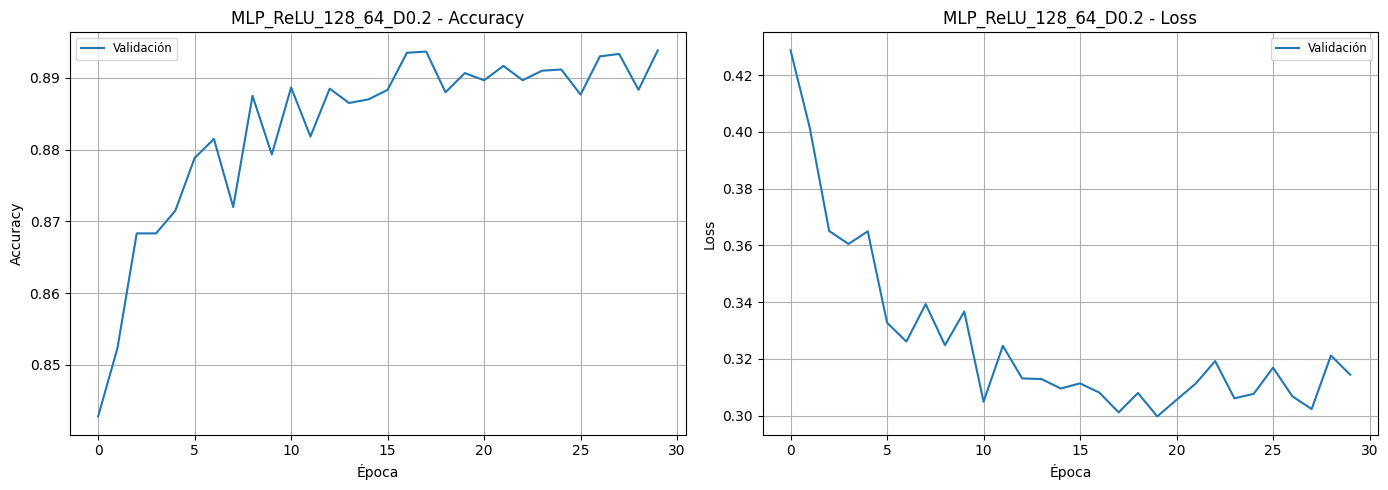


--- Generando Reporte de Clasificación para el modelo cargado: 'MLP_ReLU_128_64_D0.2' ---
  Realizando predicciones en x_test...
  Calculando reporte...
              precision    recall  f1-score   support

 T-shirt/top     0.8557    0.8360    0.8457      1000
     Trouser     0.9858    0.9720    0.9789      1000
    Pullover     0.7919    0.8220    0.8067      1000
       Dress     0.8775    0.8950    0.8861      1000
        Coat     0.8119    0.8030    0.8074      1000
      Sandal     0.9748    0.9660    0.9704      1000
       Shirt     0.7186    0.7150    0.7168      1000
     Sneaker     0.9491    0.9500    0.9495      1000
         Bag     0.9758    0.9670    0.9714      1000
  Ankle boot     0.9545    0.9660    0.9602      1000

    accuracy                         0.8892     10000
   macro avg     0.8896    0.8892    0.8893     10000
weighted avg     0.8896    0.8892    0.8893     10000


    PROCESO DE CARGA Y ANÁLISIS DEL MODELO GUARDADO COMPLETADO


In [46]:

# --- Define Fashion MNIST Class Labels (if not already defined globally) ---
# Ensure this dictionary exists in your environment. If not, define it here.
if 'class_labels_dict' not in locals():
    print("INFO: 'class_labels_dict' no encontrado, definiendo para Fashion MNIST.")
    class_labels_dict = {
        0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
        5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"
    }
    # Also ensure num_classes is defined if using this dict
    if 'num_classes' not in locals():
         num_classes = 10

# --- 1. Definir el nombre y ruta del archivo del modelo a cargar ---
target_model_name_to_load = 'MLP_ReLU_128_64_D0.2'
saved_model_filename = f"{target_model_name_to_load}_best_model_ES.keras"
print(f"\n--- Intentando cargar el modelo guardado: '{saved_model_filename}' ---")

# --- 2. Cargar el modelo desde el archivo ---
loaded_best_model = None
try:
    loaded_best_model = tf.keras.models.load_model(saved_model_filename)
    print(f"   Modelo '{loaded_best_model.name}' cargado exitosamente desde '{saved_model_filename}'.")
    # print("\nResumen del modelo cargado:") # Optional: Uncomment to see summary
    # loaded_best_model.summary()
except FileNotFoundError:
    print(f"   ERROR: El archivo '{saved_model_filename}' no se encontró.")
except Exception as e:
    print(f"   ERROR al cargar el modelo: {e}")

# --- 3. Buscar Métricas e Historial asociados al modelo cargado ---
# --- 4. Generar Reporte de Clasificación para el modelo cargado ---
if loaded_best_model is not None:
    model_name_loaded = loaded_best_model.name
    print(f"\n--- Buscando datos asociados para el modelo cargado: '{model_name_loaded}' ---")

    # --- Buscar Métricas Finales (Tabla) ---
    results_df_variable_name = 'results_df'
    print(f"  Buscando métricas en la variable DataFrame '{results_df_variable_name}'...")
    if results_df_variable_name in locals():
        results_df_test_harness = locals()[results_df_variable_name]
        if isinstance(results_df_test_harness, pd.DataFrame) and 'Model Name' in results_df_test_harness.columns:
            model_results_row = results_df_test_harness[results_df_test_harness['Model Name'] == model_name_loaded]
            if not model_results_row.empty:
                print(f"    -> Métricas de evaluación (tabla) encontradas para '{model_name_loaded}':")
                # Set pandas display format for this table
                pd.set_option('display.float_format', '{:.6f}'.format) # Display table metrics with 6 decimals
                display(model_results_row)
                pd.reset_option('display.float_format') # Reset to default
            else:
                print(f"    -> No se encontraron métricas (tabla) para '{model_name_loaded}' en '{results_df_variable_name}'.")
        else:
             print(f"    -> La variable '{results_df_variable_name}' no es un DataFrame válido o le falta 'Model Name'.")
    else:
        print(f"    -> ADVERTENCIA: DataFrame '{results_df_variable_name}' no encontrado. No se pueden mostrar métricas (tabla).")

    # --- Buscar Historial de Entrenamiento (Gráficos) ---
    histories_dict_variable_name = 'all_histories'
    print(f"\n  Buscando historial en la variable diccionario '{histories_dict_variable_name}'...")
    if histories_dict_variable_name in locals():
        histories_test_harness = locals()[histories_dict_variable_name]
        if isinstance(histories_test_harness, dict) and model_name_loaded in histories_test_harness:
            model_history = histories_test_harness[model_name_loaded]
            print(f"    -> Historial encontrado para '{model_name_loaded}'. Graficando curvas...")
            # (Código de graficación sin cambios)
            plt.figure(figsize=(14, 5))
            plt.subplot(1, 2, 1);
            if 'val_accuracy' in model_history: plt.plot(model_history['val_accuracy'], label='Validación')
            elif 'accuracy' in model_history: plt.plot(model_history['accuracy'], label='Entrenamiento')
            plt.title(f'{model_name_loaded} - Accuracy'); plt.xlabel('Época'); plt.ylabel('Accuracy')
            if 'val_accuracy' in model_history or 'accuracy' in model_history: plt.legend(loc='best', fontsize='small')
            plt.grid(True)
            plt.subplot(1, 2, 2);
            if 'val_loss' in model_history: plt.plot(model_history['val_loss'], label='Validación')
            elif 'loss' in model_history: plt.plot(model_history['loss'], label='Entrenamiento')
            plt.title(f'{model_name_loaded} - Loss'); plt.xlabel('Época'); plt.ylabel('Loss')
            if 'val_loss' in model_history or 'loss' in model_history: plt.legend(loc='best', fontsize='small')
            plt.grid(True)
            plt.tight_layout(); plt.show()
        else:
            print(f"    -> No se encontró historial para '{model_name_loaded}' en '{histories_dict_variable_name}'.")
    else:
        print(f"    -> ADVERTENCIA: Diccionario '{histories_dict_variable_name}' no encontrado. No se pueden mostrar curvas de aprendizaje.")

    # --- Generar Reporte de Clasificación ---
    print(f"\n--- Generando Reporte de Clasificación para el modelo cargado: '{model_name_loaded}' ---")
    # Necesitamos las predicciones del modelo cargado y las etiquetas verdaderas
    if 'x_test' in locals() and 'y_test_labels' in locals():
        print("  Realizando predicciones en x_test...")
        y_pred_prob = loaded_best_model.predict(x_test, verbose=0)
        y_pred_classes = np.argmax(y_pred_prob, axis=1)

        # Asegurar que y_test_labels y y_pred_classes sean arrays 1D para sklearn
        y_true_flat = np.array(y_test_labels).flatten()
        y_pred_flat = np.array(y_pred_classes).flatten()

        # Crear target_names usando class_labels_dict
        target_names = [class_labels_dict.get(i, f"Clase {i}") for i in range(num_classes)]
        print("  Calculando reporte...")

        # ============================================================ #
        # Imprimir el reporte con exactamente 4 dígitos decimales      #
        # ============================================================ #
        print(classification_report(y_true_flat, y_pred_flat, target_names=target_names, digits=4))
        # ============================================================ #

    else:
        print("  ERROR: No se encontraron las variables 'x_test' o 'y_test_labels' en memoria.")
        print("         No se puede generar el reporte de clasificación.")


else:
    print("\nNo se pudo cargar el modelo, por lo que no se buscarán sus datos asociados ni se generará reporte.")

print("\n" + "="*60)
print("    PROCESO DE CARGA Y ANÁLISIS DEL MODELO GUARDADO COMPLETADO")
print("="*60)